<h1>Personalized Cancer Diagnosis </h1>

## 1. Business Problem

### 1.1. Description

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

### 1.2. Source/Useful Links

Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

### 1.3. Real-world/Business objectives and constraints.

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

## 2. Machine Learning Problem Formulation

### 2.1. Data

#### 2.1.1. Data Overview

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

#### 2.1.2. Example Data Point

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

### 2.2. Mapping the real-world problem to an ML problem

#### 2.2.1. Type of Machine Learning Problem

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

#### 2.2.2. Performance Metric

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


#### 2.2.3. Machine Learing Objectives and Constraints

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

### 2.3. Train, CV and Test Datasets

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

## 3. Exploratory Data Analysis 

### 3.1 Reading data

In [1]:
import numpy as np
import scipy as ss
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
raw_data_1 = pd.read_csv("training_variants")
raw_data_2 = pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

In [3]:
# information of the data

raw_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 4 columns):
ID           3321 non-null int64
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(2)
memory usage: 103.9+ KB


In [4]:
raw_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 2 columns):
ID      3321 non-null int64
TEXT    3316 non-null object
dtypes: int64(1), object(1)
memory usage: 52.0+ KB


In [5]:
raw_data_1.head()

ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

In [6]:
raw_data_2.head()

ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

In [7]:
# Number of data points in the data set

print("variants dataset data points")
print("="*100)
print(raw_data_1.shape)
print("Text dataset data points")
print("="*100)
print(raw_data_2.shape)

variants dataset data points
(3321, 4)
Text dataset data points
(3321, 2)


In [8]:
# Merging variants and text dataframe based on ID number

data = pd.merge(raw_data_1,raw_data_2,on="ID",how="left")

In [9]:
data.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  Cyclin-dependent kinases (CDKs) regulate a var...  
1   Abstract Background  Non-small cell lung canc...  
2   Abstract Background  Non-small cell lung canc...  
3  Recent evidence has demonstrated that acquired...  
4  Oncogenic mutations in the monomeric Casitas B...

In [10]:
print(data.shape)

(3321, 5)


In [11]:
# Checking and Dropping duplicates 

data =data.drop_duplicates(["ID"],keep="first")

In [12]:
print(data.shape)

(3321, 5)


### 3.2 Text Preprocessing

In [13]:
# References
# https://medium.com/@jorlugaqui/how-to-strip-html-tags-from-a-string-in-python-7cb81a2bbf44
# https://stackoverflow.com/a/40823105/4084039
# https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490
# https://stackoverflow.com/questions/18082130/python-regex-to-remove-all-words-which-contains-number/18082370#18082370
# https://stackoverflow.com/questions/5843518/remove-all-special-characters-punctuation-and-spaces-from-string/5843547#5843547
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://gist.github.com/sebleier/554280
# stemming tutorial: https://www.geeksforgeeks.org/python-stemming-words-with-nltk/
# Lemmatisation tutorial: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
# NLTK Stemming package list: https://www.nltk.org/api/nltk.stem.html

from nltk.stem.snowball import EnglishStemmer
from nltk.corpus import stopwords
import re
from tqdm import tqdm
stemmer=EnglishStemmer()

In [14]:
raw_text_data=data.TEXT.values

In [15]:
stopwords=set(stopwords.words('english'))

In [16]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
import math

In [18]:
preprocessed_text_data=[]
index=0

for i in tqdm(raw_text_data): 
    try:
# removing of HTML tags
        a=re.sub("<.*?>"," ",i)
# removing url
        b=re.sub(r"http\S+"," ",a)
# expanding contractions
        c=decontracted(b)
# removing Special characters
        e=re.sub('[^A-Za-z0-9]+', ' ',c)
# removing stopwords
        k=[]
        for w in e.split():
            if w.lower() not in stopwords:
                s=(stemmer.stem(w.lower())).encode('utf8')
                k.append(s)
        preprocessed_text_data.append(b' '.join(k).decode())
        
    except TypeError:
        
        print("There is no TEXT in the row = ",index)
        preprocessed_text_data.append(math.nan)
        
    index +=1

 33%|███▎      | 1109/3321 [02:11<04:36,  8.01it/s]

There is no TEXT in the row =  1109


 38%|███▊      | 1277/3321 [02:32<03:31,  9.68it/s]

There is no TEXT in the row =  1277


 42%|████▏     | 1410/3321 [02:52<02:43, 11.66it/s]

There is no TEXT in the row =  1407


 49%|████▉     | 1641/3321 [03:28<02:51,  9.81it/s]

There is no TEXT in the row =  1639


 83%|████████▎ | 2757/3321 [05:56<01:16,  7.36it/s]

There is no TEXT in the row =  2755


100%|██████████| 3321/3321 [07:07<00:00,  7.77it/s]


In [19]:
len(preprocessed_text_data)

3321

In [20]:
# updating preproceesed data

data.TEXT = preprocessed_text_data

In [21]:
data.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin depend kinas cdks regul varieti fundame...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evid demonstr acquir uniparent disomi a...  
4  oncogen mutat monomer casita b lineag lymphoma...

In [22]:
data.shape

(3321, 5)

In [23]:
# Checking Whether NaN values present or not

if data.isnull().values.any() == False:
    print("There are no NaN values present")
else:
    print("There are NaN values present")

There are NaN values present


In [24]:
# NaN values

data[data.isnull().any(axis=1)]

ID    Gene             Variation  Class TEXT
1109  1109   FANCA                S1088F      1  NaN
1277  1277  ARID5B  Truncating Mutations      1  NaN
1407  1407   FGFR3                 K508M      6  NaN
1639  1639    FLT1         Amplification      6  NaN
2755  2755    BRAF                 G596C      7  NaN

In [25]:
# Filling the NaN values

data.loc[data.TEXT.isnull(),"TEXT"] = data["Gene"]+" "+data["Variation"]

In [26]:
# After Filling

data[data.ID == 2755 ]

ID  Gene Variation  Class        TEXT
2755  2755  BRAF     G596C      7  BRAF G596C

In [27]:
# Checking Whether NaN values present or not

if data.isnull().values.any() == False:
    print("There are no NaN values present")
else:
    print("There are NaN values present")

There are no NaN values present


### 3.3 Data Splitting

In [28]:
# References
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

In [29]:
final_data=data

In [30]:
final_data.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin depend kinas cdks regul varieti fundame...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evid demonstr acquir uniparent disomi a...  
4  oncogen mutat monomer casita b lineag lymphoma...

In [31]:
y = data.Class.values

In [32]:
y.shape

(3321,)

In [33]:
x = final_data

In [34]:
x.shape

(3321, 5)

In [35]:
# Splitting

x_1,x_test,y_1,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=40)
x_train,x_cv,y_train,y_cv=train_test_split(x_1,y_1,stratify=y_1,test_size=0.2,random_state=40)

In [36]:
print(" Train data Size")
print(x_train.shape,y_train.shape)
print("cv data size")
print(x_cv.shape,y_cv.shape)
print("Test data size")
print(x_test.shape,y_test.shape)

 Train data Size
(2124, 5) (2124,)
cv data size
(532, 5) (532,)
Test data size
(665, 5) (665,)


### 3.4 Class Label Distribution

In [37]:
y_main = x.Class.value_counts()
y_train_class = x_train.Class.value_counts()
y_cv_class = x_cv.Class.value_counts()
y_test_class = x_test.Class.value_counts()

In [38]:
def class_distribution(**para):

    index=[]
    percentage=[]
    for i,j in zip(para["values"],para["index"]):
    
        a = int(i)/int(para["shape"])
        index.append(j)
        percentage.append(a)
        
    for i,j in zip(index,percentage):
        
        print("Class {} distribution percentage is {}".format(i,round(j,2)))
        
    return index,percentage

In [39]:
# References
# https://medium.com/python-pandemonium/data-visualization-in-python-bar-graph-in-matplotlib-f1738602e9c4

def class_distribution_plot(**para):
    
    plt.close()
    plt.bar(para["classes"],para["percentage"],color='rgbkymc')
    plt.xlabel("Class names")
    plt.ylabel("Percentage")
    plt.title("class label Distribution percentage of"+" "+para["name"])
    plt.show()

In [40]:
# Overall data class distribution

classes,percentage = class_distribution(values=y_main.values,index=y_main.index,shape=x.shape[0])

Class 7 distribution percentage is 0.29
Class 4 distribution percentage is 0.21
Class 1 distribution percentage is 0.17
Class 2 distribution percentage is 0.14
Class 6 distribution percentage is 0.08
Class 5 distribution percentage is 0.07
Class 3 distribution percentage is 0.03
Class 9 distribution percentage is 0.01
Class 8 distribution percentage is 0.01


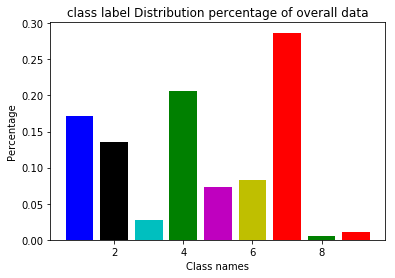

In [41]:
# Plotting 

class_distribution_plot(classes=classes,percentage=percentage,name="overall data")

In [42]:
# Train data class distribution

classes,percentage =class_distribution(values=y_train_class.values,index=y_train_class.index,shape=x_train.shape[0])

Class 7 distribution percentage is 0.29
Class 4 distribution percentage is 0.21
Class 1 distribution percentage is 0.17
Class 2 distribution percentage is 0.14
Class 6 distribution percentage is 0.08
Class 5 distribution percentage is 0.07
Class 3 distribution percentage is 0.03
Class 9 distribution percentage is 0.01
Class 8 distribution percentage is 0.01


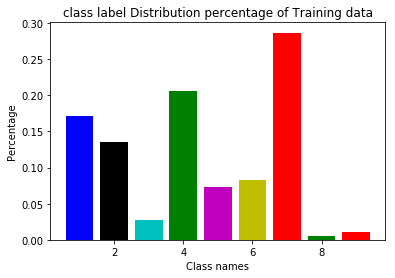

In [43]:
class_distribution_plot(classes=classes,percentage=percentage,name="Training data")

In [44]:
# cv data class distribution

classes,percentage = class_distribution(values=y_cv_class.values,index=y_cv_class.index,shape=x_cv.shape[0])

Class 7 distribution percentage is 0.29
Class 4 distribution percentage is 0.21
Class 1 distribution percentage is 0.17
Class 2 distribution percentage is 0.14
Class 6 distribution percentage is 0.08
Class 5 distribution percentage is 0.07
Class 3 distribution percentage is 0.03
Class 9 distribution percentage is 0.01
Class 8 distribution percentage is 0.01


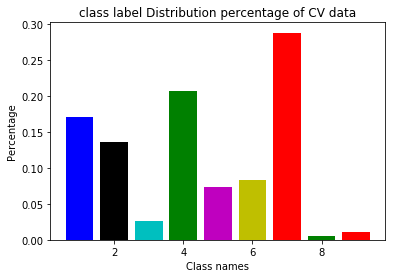

In [45]:
class_distribution_plot(classes=classes,percentage=percentage,name="CV data")

In [46]:
# Test data class distribution

classes,percentage = class_distribution(values=y_test_class.values,index=y_test_class.index,shape=x_test.shape[0])

Class 7 distribution percentage is 0.29
Class 4 distribution percentage is 0.21
Class 1 distribution percentage is 0.17
Class 2 distribution percentage is 0.14
Class 6 distribution percentage is 0.08
Class 5 distribution percentage is 0.07
Class 3 distribution percentage is 0.03
Class 9 distribution percentage is 0.01
Class 8 distribution percentage is 0.01


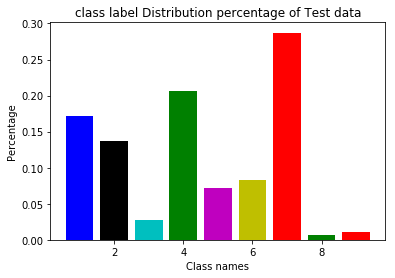

In [47]:
class_distribution_plot(classes=classes,percentage=percentage,name="Test data")

### 3.5 Random Model

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [48]:
# References
# https://stackoverflow.com/a/18662466/4084039
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html

# Training data

len_train = x_train.shape[0]
y_train_pred = np.zeros((len_train,9))
for i in range(len_train):
    a = np.random.rand(1,9)
    y_train_pred[i] = ((a/sum(sum(a)))[0])
    
# CV data

len_cv = x_cv.shape[0]
y_cv_pred = np.zeros((len_cv,9))
for i in range(len_cv):
    a = np.random.rand(1,9)
    y_cv_pred[i] = ((a/sum(sum(a)))[0])
    
# Test data

len_test = x_test.shape[0]
y_test_pred = np.zeros((len_test,9))
for i in range(len_test):
    a = np.random.rand(1,9)
    y_test_pred[i] = ((a/sum(sum(a)))[0])

In [93]:
# log-loss 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

from sklearn.metrics import log_loss

In [50]:
train_loss = log_loss(y_train,y_train_pred)
cv_loss = log_loss(y_cv,y_cv_pred)
test_loss = log_loss (y_test,y_test_pred)

In [51]:
print("Training loss of Random Model")
print("="*100)
print(train_loss)

print("cv loss of Random Model")
print("="*100)
print(cv_loss)

print("Test loss of Random Model")
print("="*100)
print(test_loss)

Training loss of Random Model
2.4644139213344083
cv loss of Random Model
2.454258134414812
Test loss of Random Model
2.4892220930226867


In [94]:
# Confusion Matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://stackoverflow.com/questions/47264597/confusion-matrix-from-probabilities
# https://www.geeksforgeeks.org/numpy-sum-in-python/

from sklearn.metrics import confusion_matrix    

In [95]:
def cm_matrix(**para):
    
    # train data
    labels=[1,2,3,4,5,6,7,8,9]
    a = np.argmax(para["train_pred"],axis=1)
    c_train = confusion_matrix(para["train_true"],a+1)
    
    # test data
    
    b = np.argmax(para["test_pred"],axis=1)
    c_test = confusion_matrix(para["test_true"],b+1)
    
    plt.close()
    plt.figure(1,figsize=(12,12))
    plt.subplot(211)
    sns.heatmap(c_train,annot=True,fmt='.2f',xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix of Train Data")
    plt.subplot(212)
    sns.heatmap(c_test,annot=True,fmt='.2f',xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix of Test Data")
    plt.show()
    
    return c_train,c_test

In [96]:
# https://en.wikipedia.org/wiki/Precision_and_recall

def precision_matrix(**para):
    
    # train
    labels=[1,2,3,4,5,6,7,8,9]
    train = para["train"]
    pr_train =(train/train.sum(axis=0))
    
    # test
    
    test = para["test"]
    pr_test =(test/test.sum(axis=0))
    
    plt.close()
    plt.figure(1,figsize=(12,12))
    plt.subplot(211)
    sns.heatmap(pr_train,annot=True,fmt='.2f',xticklabels=labels, yticklabels=labels)
    plt.title("Precision matrix of Train Data")
    plt.subplot(212)
    sns.heatmap(pr_test,annot=True,fmt='.2f',xticklabels=labels, yticklabels=labels)
    plt.title("Precision matrix of Test Data")
    plt.show()

In [97]:
def recall_matrix(**para):
    
    # train
    labels=[1,2,3,4,5,6,7,8,9]
    train = para["train"]
    re_train =(((train.T)/(train.sum(axis=1))).T)
    
    # test
    
    test = para["test"]
    re_test =(((test.T)/(test.sum(axis=1))).T)
    
    plt.close()
    plt.figure(1,figsize=(12,12))
    plt.subplot(211)
    sns.heatmap(re_train,annot=True,fmt='.2f',xticklabels=labels, yticklabels=labels)
    plt.title("Recall matrix of Train Data")
    plt.subplot(212)
    sns.heatmap(re_test,annot=True,fmt='.2f',xticklabels=labels, yticklabels=labels)
    plt.title("Recall matrix of Test Data")
    plt.show()

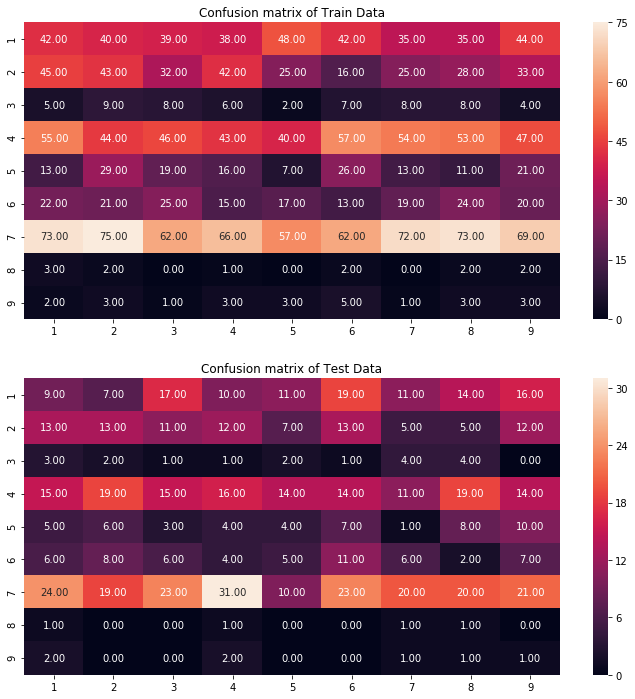

In [57]:
# Plotting Confusion matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=y_train_pred,test_true=y_test,test_pred=y_test_pred)

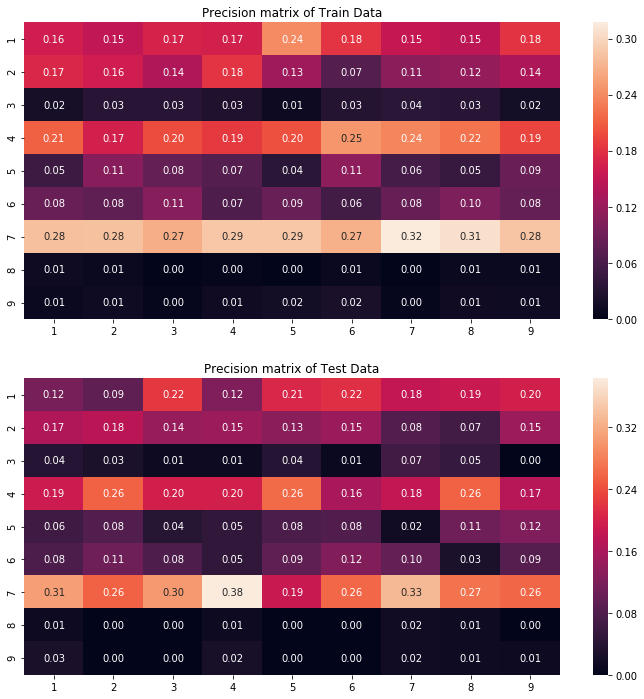

In [58]:
# plotting Precision Matrix

precision_matrix(train=train_cm,test=test_cm)

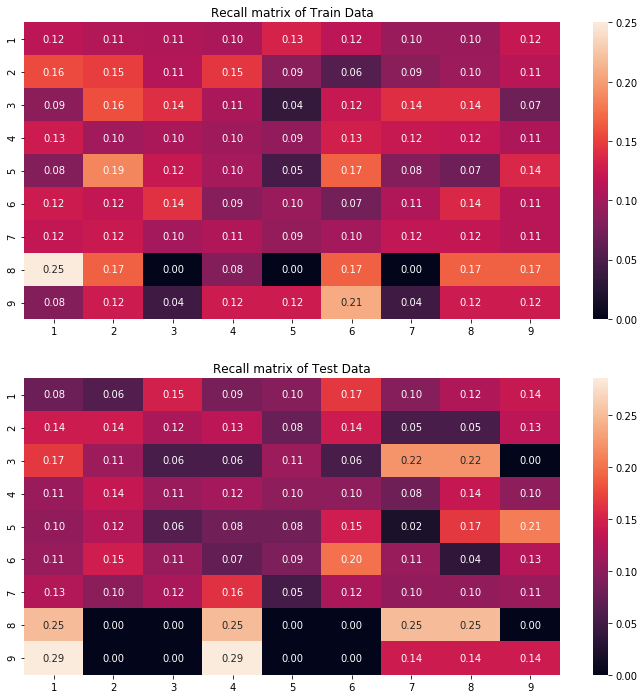

In [59]:
# plotting recall matrix

recall_matrix(train=train_cm,test=test_cm)

### 3.6 Univariate Analysis

* The univariate analysis on features are done by using simple linear model (Logistic Model)

* The Gene and variation features are converted to a vector by using

    * Response Coding 
    * One-hot encoding

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

#### 3.6.1 Response coding and One-hot on Gene Feature

In [64]:
# unique gene's in training data

unique_gene = x_train.Gene.value_counts()

In [65]:
print(unique_gene.shape[0])

231


In [66]:
unique_gene.head()

BRCA1    181
TP53     103
EGFR      93
BRCA2     80
PTEN      78
Name: Gene, dtype: int64

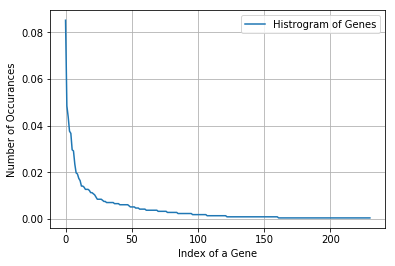

In [67]:
# PDF of unique gene features in train data

s = sum(unique_gene.values);
h = unique_gene.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

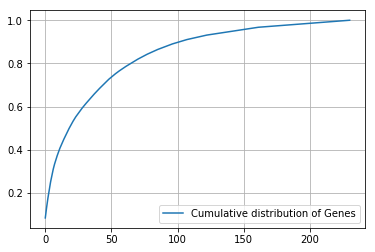

In [68]:
# CDF of unique gene features in train data

c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

In [69]:
# probability vector of a gene in train data

prob_vec=dict()

for gene in tqdm(unique_gene.index):
    
    for label in range(1,10):
        
        prob_vec.setdefault(gene,[])
        a = x_train.loc[x_train.Gene == gene]
        b = a.loc[a.Class == label]
        c = b.Gene.value_counts()
        
        try:
            d = int(c.values)
            prob_vec[gene].append(d)
        
        except TypeError:
            
            prob_vec[gene].append(0)

100%|██████████| 231/231 [00:09<00:00, 24.48it/s]


In [70]:
# response vector

def response_vector(**para):
    
    data = para["data"]
    
    length = data.shape[0]
    
    points = data.values
    
    vector = np.zeros((length,9))
    
    alpha = para["alpha"]
    
    for i,j in zip(points,range(length)) :
        
        prob_vector = para["prob_vec"]
        
        if i in prob_vector:
        
            a = np.asarray(prob_vector[i])
        
            b = (a+(10*alpha)) / (sum(a)+(90*alpha))
        
            vector[j] = b
        
        else:
            
            vector[j] = np.array([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
    
    return vector

In [71]:
# train vector

train_vec_gene = response_vector(data=x_train.Gene,prob_vec=prob_vec,alpha=1)

In [72]:
train_vec_gene.shape

(2124, 9)

In [73]:
# cv vector 

cv_vec_gene = response_vector(data=x_cv.Gene,prob_vec=prob_vec,alpha=1)

In [74]:
# test vector

test_vec_gene = response_vector(data=x_test.Gene,prob_vec=prob_vec,alpha=1)

In [75]:
print("-"*40+"Gene Feature vector Response Coding"+"-"*40)
print(" ")
print("train vector shape")
print("="*100)
print(train_vec_gene.shape)
print("cv vector shape")
print("="*100)
print(cv_vec_gene.shape)
print("test vector shape")
print("="*100)
print(test_vec_gene.shape)

----------------------------------------Gene Feature vector Response Coding----------------------------------------
 
train vector shape
(2124, 9)
cv vector shape
(532, 9)
test vector shape
(665, 9)


In [76]:
# One-Hot encoding on gene feature 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

from sklearn.feature_extraction.text import CountVectorizer

In [77]:
model_gene1 =CountVectorizer()
train_vec_gene_ohe = model_gene1.fit_transform(x_train.Gene)
cv_vec_gene_ohe = model_gene1.transform(x_cv.Gene)
test_vec_gene_ohe = model_gene1.transform(x_test.Gene)

In [78]:
print("-"*30+"Gene Feature vector one hot encoding"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_vec_gene_ohe.shape)
print("cv vector shape")
print("="*100)
print(cv_vec_gene_ohe.shape)
print("test vector shape")
print("="*100)
print(test_vec_gene_ohe.shape)

------------------------------Gene Feature vector one hot encoding------------------------------
 
train vector shape
(2124, 230)
cv vector shape
(532, 230)
test vector shape
(665, 230)


#### 3.6.2 Response conding and one-hot encoding on variation feature

In [79]:
# unique variations in training data

unique_variation = x_train.Variation.value_counts()

In [80]:
unique_variation.head()

Truncating Mutations    67
Deletion                42
Amplification           42
Fusions                 24
Overexpression           5
Name: Variation, dtype: int64

In [81]:
unique_variation.shape[0]

1922

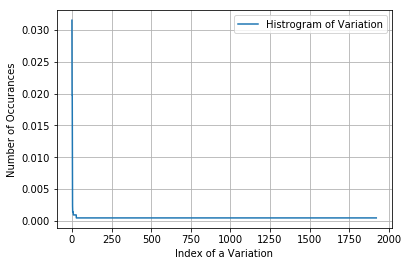

In [82]:
# PDF of unique Variation features in train data

s = sum(unique_variation.values);
h = unique_variation.values/s;
plt.plot(h, label="Histrogram of Variation")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

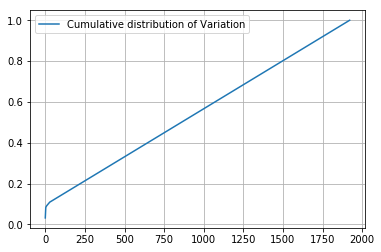

In [83]:
# CDF of unique Variation features in train data

c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Variation')
plt.grid()
plt.legend()
plt.show()

In [84]:
# probability vector of a gene in train data

prob_vec_var=dict()

for var in tqdm(unique_variation.index):
    
    for label in range(1,10):
        
        prob_vec_var.setdefault(var,[])
        a = x_train.loc[x_train.Variation == var]
        b = a.loc[a.Class == label]
        c = b.Variation.value_counts()
        
        try:
            d = int(c.values)
            prob_vec_var[var].append(d)
        
        except TypeError:
            
            prob_vec_var[var].append(0)

100%|██████████| 1922/1922 [01:25<00:00, 24.13it/s]


In [85]:
# train vector

train_vec_var = response_vector(data=x_train.Variation,prob_vec=prob_vec_var,alpha=1)

In [86]:
train_vec_var.shape

(2124, 9)

In [87]:
# cv vector 

cv_vec_var = response_vector(data=x_cv.Variation,prob_vec=prob_vec_var,alpha=1)

In [88]:
# test vector

test_vec_var = response_vector(data=x_test.Variation,prob_vec=prob_vec_var,alpha=1)

In [89]:
print("-"*30+"Variation Feature vector Response Coding"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_vec_var.shape)
print("cv vector shape")
print("="*100)
print(cv_vec_var.shape)
print("test vector shape")
print("="*100)
print(test_vec_var.shape)

------------------------------Variation Feature vector Response Coding------------------------------
 
train vector shape
(2124, 9)
cv vector shape
(532, 9)
test vector shape
(665, 9)


In [90]:
# One-Hot encoding

model_var1 =CountVectorizer()
train_vec_var_ohe = model_var1.fit_transform(x_train.Variation)
cv_vec_var_ohe = model_var1.transform(x_cv.Variation)
test_vec_var_ohe = model_var1.transform(x_test.Variation)

In [91]:
print("-"*30+"Variation Feature vector one hot encoding"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_vec_var_ohe.shape)
print("cv vector shape")
print("="*100)
print(cv_vec_var_ohe.shape)
print("test vector shape")
print("="*100)
print(test_vec_var_ohe.shape)

------------------------------Variation Feature vector one hot encoding------------------------------
 
train vector shape
(2124, 1961)
cv vector shape
(532, 1961)
test vector shape
(665, 1961)


#### 3.6.3 Logistic Model on gene feature

In [92]:
# References
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV

from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

In [200]:
alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

In [201]:
log_alpha=[]
for i in alpha:
    log_alpha.append(math.log10(i))
log_alpha

[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]

In [202]:
train_loss = []
cv_loss = []

for i in tqdm(alpha):
    
    # Fitting the model
    model = SGDClassifier(loss="log",penalty="l2",alpha=i,random_state=42)
    model.fit(train_vec_gene_ohe,y_train)
    clf = CalibratedClassifierCV (model,method="sigmoid")
    clf.fit(train_vec_gene_ohe,y_train)
    # Predicting training data
    train_proba = clf.predict_proba(train_vec_gene_ohe)
    train_ll= log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    # Predicting cv data
    cv_proba = clf.predict_proba(cv_vec_gene_ohe)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 9/9 [00:02<00:00,  3.30it/s]


In [203]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 0.0001 ---> trainl loss = 1.045 and test loss = 1.217
alpha = 0.001 ---> trainl loss = 1.109 and test loss = 1.231
alpha = 0.01 ---> trainl loss = 1.271 and test loss = 1.336
alpha = 0.1 ---> trainl loss = 1.416 and test loss = 1.434
alpha = 1 ---> trainl loss = 1.463 and test loss = 1.468
alpha = 10 ---> trainl loss = 1.47 and test loss = 1.473
alpha = 100 ---> trainl loss = 1.47 and test loss = 1.473
alpha = 1000 ---> trainl loss = 1.47 and test loss = 1.473
alpha = 10000 ---> trainl loss = 1.5 and test loss = 1.506
best aplha ---> 0.0001


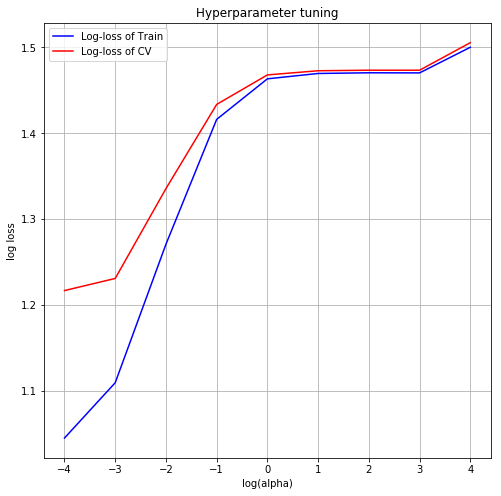

In [204]:
# plotting the Log-Loss

plt.close()
plt.close()
fig = plt.figure(1,figsize=(8,8))
plt.plot(log_alpha,train_loss,"b",label="Log-loss of Train")
plt.plot(log_alpha,cv_loss,"r",label="Log-loss of CV ")
plt.xlabel("log(alpha)")
plt.ylabel("log loss")
plt.title("Hyperparameter tuning")
plt.grid()
plt.legend()
plt.show()

In [205]:
# test data

# Fitting the model
model = SGDClassifier(loss="log",penalty="l2",alpha=0.0001,random_state=42)
model.fit(train_vec_gene_ohe,y_train)
clf = CalibratedClassifierCV (model,method="sigmoid")
clf.fit(train_vec_gene_ohe,y_train)
# Predicting training data
train_proba = clf.predict_proba(train_vec_gene_ohe)
train_ll= log_loss(y_train,train_proba)
# Predicting cv data
cv_proba = clf.predict_proba(cv_vec_gene_ohe)
cv_ll = log_loss(y_cv,cv_proba)
# predicting test data
test_proba = clf.predict_proba(test_vec_gene_ohe)
test_ll = log_loss(y_test,test_proba)

In [206]:
print("Train_loss")
print("="*100)
print(train_ll)
print("CV_loss")
print("="*100)
print(cv_ll)
print("Test_loss")
print("="*100)
print(test_ll)

Train_loss
1.0449004598846507
CV_loss
1.216716373003989
Test_loss
1.213472647157127


#### 3.6.4 Logistic Model on Variation feature

In [207]:
alpha = [10 ** x for x in range(-5, 1)]

train_loss = []
cv_loss = []

for i in tqdm(alpha):
    
    # Fitting the model
    model = SGDClassifier(loss="log",penalty="l2",alpha=i,random_state=42)
    model.fit(train_vec_var_ohe,y_train)
    clf = CalibratedClassifierCV (model,method="sigmoid")
    clf.fit(train_vec_var_ohe,y_train)
    # Predicting training data
    train_proba = clf.predict_proba(train_vec_var_ohe)
    train_ll= log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    # Predicting cv data
    cv_proba = clf.predict_proba(cv_vec_var_ohe)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 6/6 [00:01<00:00,  4.53it/s]


In [208]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 1e-05 ---> trainl loss = 0.85 and test loss = 1.717
alpha = 0.0001 ---> trainl loss = 0.801 and test loss = 1.704
alpha = 0.001 ---> trainl loss = 1.21 and test loss = 1.711
alpha = 0.01 ---> trainl loss = 1.558 and test loss = 1.723
alpha = 0.1 ---> trainl loss = 1.668 and test loss = 1.739
alpha = 1 ---> trainl loss = 1.678 and test loss = 1.742
best aplha ---> 0.0001


In [209]:
log_alpha=[]
for i in alpha:
    log_alpha.append(math.log10(i))
log_alpha

[-5.0, -4.0, -3.0, -2.0, -1.0, 0.0]

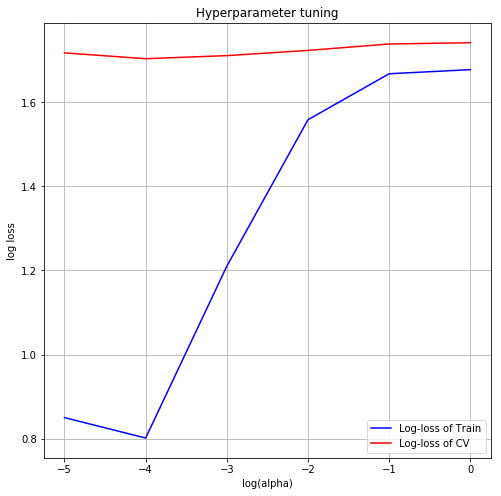

In [210]:
# plotting the Log-Loss

plt.close()
plt.close()
fig = plt.figure(1,figsize=(8,8))
plt.plot(log_alpha,train_loss,"b",label="Log-loss of Train")
plt.plot(log_alpha,cv_loss,"r",label="Log-loss of CV ")
plt.xlabel("log(alpha)")
plt.ylabel("log loss")
plt.title("Hyperparameter tuning")
plt.grid()
plt.legend()
plt.show()

In [211]:
# test data

# Fitting the model
model = SGDClassifier(loss="log",penalty="l2",alpha=0.0001,random_state=42)
model.fit(train_vec_var_ohe,y_train)
clf = CalibratedClassifierCV (model,method="sigmoid")
clf.fit(train_vec_var_ohe,y_train)
# Predicting training data
train_proba = clf.predict_proba(train_vec_var_ohe)
train_ll= log_loss(y_train,train_proba)
# Predicting cv data
cv_proba = clf.predict_proba(cv_vec_var_ohe)
cv_ll = log_loss(y_cv,cv_proba)
# predicting test data
test_proba = clf.predict_proba(test_vec_var_ohe)
test_ll = log_loss(y_test,test_proba)

In [212]:
print("Train_loss")
print("="*100)
print(train_ll)
print("CV_loss")
print("="*100)
print(cv_ll)
print("Test_loss")
print("="*100)
print(test_ll)

Train_loss
0.801436814728932
CV_loss
1.7036241644270218
Test_loss
1.6758672953954525


#### 3.6.5 One-Hot encoding and response coding on text feature

In [99]:
# One-Hot encoding

model_text1 =CountVectorizer(min_df=3)
train_vec_text_ohe = model_text1.fit_transform(x_train.TEXT)
cv_vec_text_ohe = model_text1.transform(x_cv.TEXT)
test_vec_text_ohe = model_text1.transform(x_test.TEXT)

In [100]:
from sklearn.preprocessing import normalize

In [101]:
# Normalizing

train_vec_text_ohe = normalize(train_vec_text_ohe,axis=0)
cv_vec_text_ohe = normalize(cv_vec_text_ohe,axis=0)
test_vec_text_ohe = normalize(test_vec_text_ohe,axis=0)

In [102]:
print("-"*30+"Text Feature vector one hot encoding"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_vec_text_ohe.shape)
print("cv vector shape")
print("="*100)
print(cv_vec_text_ohe.shape)
print("test vector shape")
print("="*100)
print(test_vec_text_ohe.shape)

------------------------------Text Feature vector one hot encoding------------------------------
 
train vector shape
(2124, 39462)
cv vector shape
(532, 39462)
test vector shape
(665, 39462)


In [57]:
# https://stackoverflow.com/questions/17767084/defaultdict-is-not-defined

from collections import defaultdict

In [58]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word

def extract_dictionary_paddle(cls_text):
    
    dictionary = defaultdict(int)
    
    for index, row in cls_text.iterrows():
        
        for word in row['TEXT'].split():
            dictionary[word] +=1
            
    return dictionary

In [59]:
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    
    for i in range(0,9):
        
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
            
    return text_feature_responseCoding

In [53]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data

text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(x_train['TEXT'])

# getting all the feature names (words)

train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector

train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured

text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 39462


In [60]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class

for i in range(1,10):
    
    cls_text = x_train[x_train['Class']==i]
    
    # build a word dict based on the words in that class
    
    dict_list.append(extract_dictionary_paddle(cls_text))
    
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(x_train)


confuse_array = []

for i in train_text_features:
    
    ratios = []
    max_val = -1
    
    for j in range(0,9):
        
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [61]:
#response coding of text features

train_text_feature_responseCoding  = get_text_responsecoding(x_train)
test_text_feature_responseCoding  = get_text_responsecoding(x_test)
cv_text_feature_responseCoding  = get_text_responsecoding(x_cv)

In [62]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  

train_vec_text = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_vec_text = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_vec_text = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [63]:
print("-"*30+"Text Feature vector Response Coding"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_vec_text.shape)
print("cv vector shape")
print("="*100)
print(cv_vec_text.shape)
print("test vector shape")
print("="*100)
print(test_vec_text.shape)

------------------------------Text Feature vector Response Coding------------------------------
 
train vector shape
(2124, 9)
cv vector shape
(532, 9)
test vector shape
(665, 9)


#### 3.6.6 Logistic Model on Text feature

In [217]:
train_loss = []
cv_loss = []

for i in tqdm(alpha):
    
    # Fitting the model
    model = SGDClassifier(loss="log",penalty="l2",alpha=i,random_state=42)
    model.fit(train_vec_text_ohe,y_train)
    clf = CalibratedClassifierCV (model,method="sigmoid")
    clf.fit(train_vec_text_ohe,y_train)
    # Predicting training data
    train_proba = clf.predict_proba(train_vec_text_ohe)
    train_ll= log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    # Predicting cv data
    cv_proba = clf.predict_proba(cv_vec_text_ohe)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 6/6 [00:17<00:00,  2.92s/it]


In [218]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 1e-05 ---> trainl loss = 1.159 and test loss = 1.373
alpha = 0.0001 ---> trainl loss = 1.075 and test loss = 1.312
alpha = 0.001 ---> trainl loss = 0.738 and test loss = 1.158
alpha = 0.01 ---> trainl loss = 0.902 and test loss = 1.238
alpha = 0.1 ---> trainl loss = 1.381 and test loss = 1.452
alpha = 1 ---> trainl loss = 1.601 and test loss = 1.624
best aplha ---> 0.001


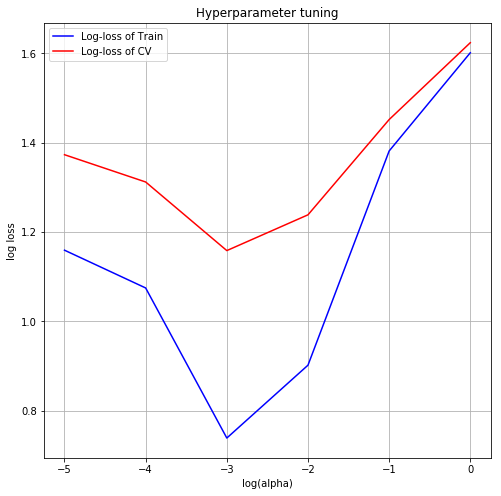

In [219]:
# plotting the Log-Loss

plt.close()
plt.close()
fig = plt.figure(1,figsize=(8,8))
plt.plot(log_alpha,train_loss,"b",label="Log-loss of Train")
plt.plot(log_alpha,cv_loss,"r",label="Log-loss of CV ")
plt.xlabel("log(alpha)")
plt.ylabel("log loss")
plt.title("Hyperparameter tuning")
plt.grid()
plt.legend()
plt.show()

In [220]:
# test data

# Fitting the model
model = SGDClassifier(loss="log",penalty="l2",alpha=0.001,random_state=42)
model.fit(train_vec_text_ohe,y_train)
clf = CalibratedClassifierCV (model,method="sigmoid")
clf.fit(train_vec_text_ohe,y_train)
# Predicting training data
train_proba = clf.predict_proba(train_vec_text_ohe)
train_ll= log_loss(y_train,train_proba)
# Predicting cv data
cv_proba = clf.predict_proba(cv_vec_text_ohe)
cv_ll = log_loss(y_cv,cv_proba)
# predicting test data
test_proba = clf.predict_proba(test_vec_text_ohe)
test_ll = log_loss(y_test,test_proba)

In [221]:
print("Train_loss")
print("="*100)
print(train_ll)
print("CV_loss")
print("="*100)
print(cv_ll)
print("Test_loss")
print("="*100)
print(test_ll)

Train_loss
0.7383349391700282
CV_loss
1.1582349394930032
Test_loss
1.1393591512837347


#### 3.6.7 Univariate analysis Observations:

In [565]:
# References
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

In [567]:
x = PrettyTable()
x.field_names = ["Model","Feature","Train-loss","cv-loss","Test-loss","Observation"]
x.add_row(["Random","Nil",2.4644,2.4542,2.4892,"Worst Model"])
x.add_row(["Logistic Regression","Gene",1.0449,1.2167,1.2134,"Good feature"])
x.add_row(["Logistic Regression","Variation",0.8019,1.7036,1.6758,"Good but Not sure"])
x.add_row(["Logistic Regression","Text",1.7383,1.1582,1.1393,"Good Feature"])
print(x)

+---------------------+-----------+------------+---------+-----------+-------------------+
|        Model        |  Feature  | Train-loss | cv-loss | Test-loss |    Observation    |
+---------------------+-----------+------------+---------+-----------+-------------------+
|        Random       |    Nil    |   2.4644   |  2.4542 |   2.4892  |    Worst Model    |
| Logistic Regression |    Gene   |   1.0449   |  1.2167 |   1.2134  |    Good feature   |
| Logistic Regression | Variation |   0.8019   |  1.7036 |   1.6758  | Good but Not sure |
| Logistic Regression |    Text   |   1.7383   |  1.1582 |   1.1393  |    Good Feature   |
+---------------------+-----------+------------+---------+-----------+-------------------+


## 4. Machine Learning Model:

### 4.1 Featurization:

#### 4.1.1 BoW Vectorizer:

In [513]:
train_1 = ss.sparse.hstack([train_vec_gene_ohe,train_vec_var_ohe])
train_bow = ss.sparse.hstack([train_1,train_vec_text_ohe])

cv_1 = ss.sparse.hstack([cv_vec_gene_ohe,cv_vec_var_ohe])
cv_bow = ss.sparse.hstack([cv_1,cv_vec_text_ohe])

test_1 = ss.sparse.hstack([test_vec_gene_ohe,test_vec_var_ohe])
test_bow = ss.sparse.hstack([test_1,test_vec_text_ohe])

In [514]:
print("-"*30+"BoW vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_bow.shape)
print("cv vector shape")
print("="*100)
print(cv_bow.shape)
print("test vector shape")
print("="*100)
print(test_bow.shape)

------------------------------BoW vector------------------------------
 
train vector shape
(2124, 41653)
cv vector shape
(532, 41653)
test vector shape
(665, 41653)


#### 4.1.2 Tfidf Vectorizer:

In [515]:
# References 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

from sklearn.feature_extraction.text import TfidfVectorizer

In [516]:
# Gene Feature

model_gene = TfidfVectorizer()
train_gene_tfidf = model_gene.fit_transform(x_train.Gene)
cv_gene_tfidf = model_gene.transform(x_cv.Gene)
test_gene_tfidf = model_gene.transform(x_test.Gene)

In [517]:
print("-"*30+"Gene Feature Tfidf vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_gene_tfidf.shape)
print("cv vector shape")
print("="*100)
print(cv_gene_tfidf.shape)
print("test vector shape")
print("="*100)
print(test_gene_tfidf.shape)

------------------------------Gene Feature Tfidf vector------------------------------
 
train vector shape
(2124, 230)
cv vector shape
(532, 230)
test vector shape
(665, 230)


In [518]:
# Variation Feature 

model_var = TfidfVectorizer()
train_var_tfidf = model_var.fit_transform(x_train.Variation)
cv_var_tfidf = model_var.transform(x_cv.Variation)
test_var_tfidf = model_var.transform(x_test.Variation)

In [519]:
print("-"*30+"Variation Feature Tfidf vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_var_tfidf.shape)
print("cv vector shape")
print("="*100)
print(cv_var_tfidf.shape)
print("test vector shape")
print("="*100)
print(test_var_tfidf.shape)

------------------------------Variation Feature Tfidf vector------------------------------
 
train vector shape
(2124, 1961)
cv vector shape
(532, 1961)
test vector shape
(665, 1961)


In [520]:
# Text Feature 

model_text = TfidfVectorizer(min_df=3)
train_text_tfidf = model_text.fit_transform(x_train.TEXT)
cv_text_tfidf = model_text.transform(x_cv.TEXT)
test_text_tfidf = model_text.transform(x_test.TEXT)

In [521]:
# Normalizing

train_text_tfidf = normalize(train_text_tfidf,axis=0)
cv_text_tfidf = normalize(cv_text_tfidf,axis=0)
test_text_tfidf = normalize(test_text_tfidf,axis=0)

In [522]:
print("-"*30+"Text Feature Tfidf vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_text_tfidf.shape)
print("cv vector shape")
print("="*100)
print(cv_text_tfidf.shape)
print("test vector shape")
print("="*100)
print(test_text_tfidf.shape)

------------------------------Text Feature Tfidf vector------------------------------
 
train vector shape
(2124, 39462)
cv vector shape
(532, 39462)
test vector shape
(665, 39462)


In [523]:
# Stacking 

# training data

train_1 = ss.sparse.hstack([train_gene_tfidf,train_var_tfidf])
train_tfidf = ss.sparse.hstack([train_1,train_text_tfidf])

# Cv data

cv_1 = ss.sparse.hstack([cv_gene_tfidf,cv_var_tfidf])
cv_tfidf = ss.sparse.hstack([cv_1,cv_text_tfidf])

# Test data

test_1 = ss.sparse.hstack([test_gene_tfidf,test_var_tfidf])
test_tfidf = ss.sparse.hstack([test_1,test_text_tfidf])


In [524]:
print("-"*30+"Tfidf vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_tfidf.shape)
print("cv vector shape")
print("="*100)
print(cv_tfidf.shape)
print("test vector shape")
print("="*100)
print(test_tfidf.shape)

------------------------------Tfidf vector------------------------------
 
train vector shape
(2124, 41653)
cv vector shape
(532, 41653)
test vector shape
(665, 41653)


## 5. One hot encoding(BoW) vectors on ML models

### 5.1Naive bayes Model

In [115]:
# References
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# https://stackoverflow.com/questions/37716699/how-to-hstack-several-sparse-matrices-feature-matrices

from sklearn.naive_bayes import MultinomialNB

In [116]:
alpha =[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]

In [117]:
log_alpha=[]
for i in alpha:
    log_alpha.append(math.log10(i))
log_alpha

[-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

In [118]:
train_loss=[]
cv_loss = []

for i in tqdm(alpha):
    
    model = MultinomialNB(alpha=i)
    model.fit(train_bow,y_train)
    clf = CalibratedClassifierCV(model,method="sigmoid")
    clf.fit(train_bow,y_train)
    
    # training data prediction
    
    train_proba = clf.predict_proba(train_bow)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    # Cv data prediction
    
    cv_proba = clf.predict_proba(cv_bow)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 11/11 [00:20<00:00,  1.85s/it]


In [119]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 1e-05 ---> trainl loss = 0.838 and test loss = 1.281
alpha = 0.0001 ---> trainl loss = 0.862 and test loss = 1.284
alpha = 0.001 ---> trainl loss = 0.881 and test loss = 1.276
alpha = 0.01 ---> trainl loss = 0.91 and test loss = 1.28
alpha = 0.1 ---> trainl loss = 0.903 and test loss = 1.272
alpha = 1 ---> trainl loss = 0.919 and test loss = 1.276
alpha = 10 ---> trainl loss = 1.043 and test loss = 1.338
alpha = 100 ---> trainl loss = 1.022 and test loss = 1.326
alpha = 1000 ---> trainl loss = 0.994 and test loss = 1.274
alpha = 10000 ---> trainl loss = 0.991 and test loss = 1.268
alpha = 100000 ---> trainl loss = 0.993 and test loss = 1.267
best aplha ---> 100000


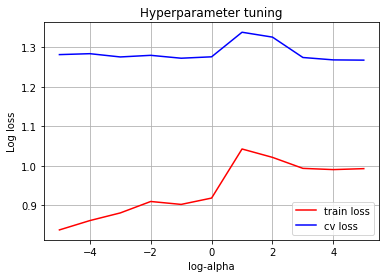

In [120]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.legend()
plt.grid()
plt.show()

##### Observation:

The best hyperparameter is alpha=1

In [121]:
# Applying best hyperparameter

model = MultinomialNB(alpha=1)
model.fit(train_bow,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_bow,y_train)
    
# training data prediction
    
train_proba = clf.predict_proba(train_bow)
train_ll = log_loss(y_train,train_proba)

# cv data

cv_proba = clf.predict_proba(cv_bow)
cv_ll = log_loss(y_cv,cv_proba)
    
# test data prediction
    
test_proba = clf.predict_proba(test_bow)
test_ll = log_loss(y_test,test_proba)

In [122]:
print("train log-loss")
print("="*100)
print(train_ll)
print("cv log-loss")
print("="*100)
print(cv_ll)
print("test log-loss")
print("="*100)
print(test_ll)

train log-loss
0.9185527117948986
cv log-loss
1.27589160294615
test log-loss
1.2650005886018212


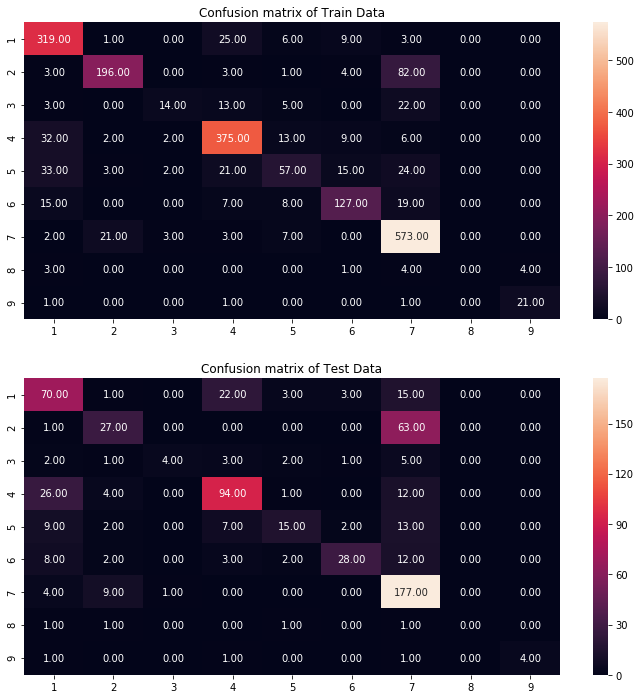

In [123]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

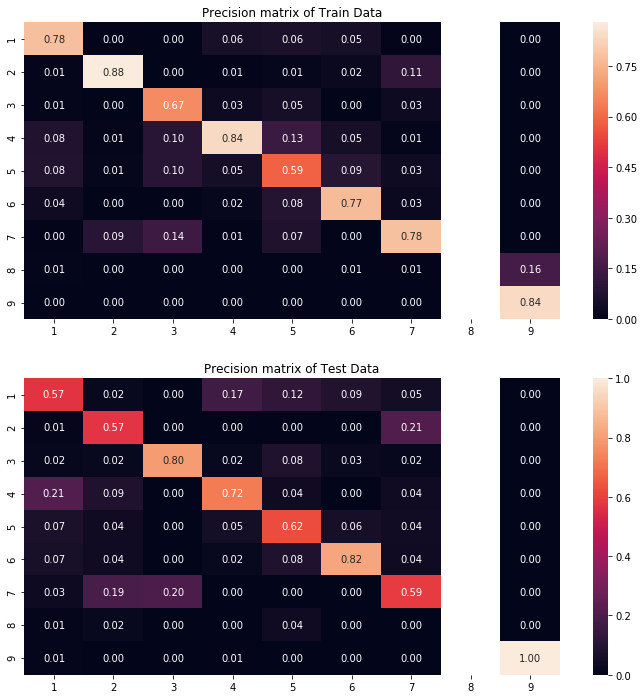

In [124]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

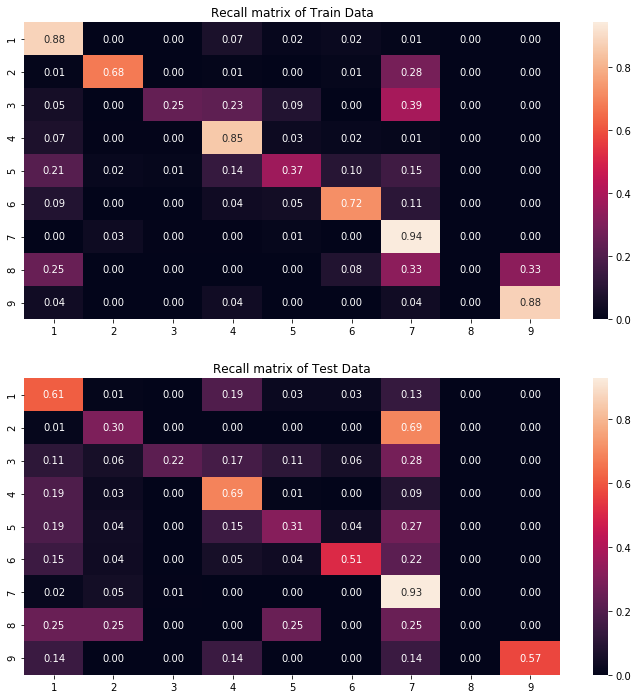

In [125]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

#### Feature Importance

In [126]:
classes = model.classes_

In [127]:
classes

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [128]:
fi = model.feature_log_prob_

In [129]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 172867.19it/s]


In [130]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.3699248120300752


In [131]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0


for i in range(9):
    
    label =np.argsort(fi[i])[::-1][:10]
    
    print("-"*30+"Class {} important features".format(i+1)+"-"*30)
    
    for j in range(10):
        
        if label[j] < 230:
            
            print("Gene feature = {}".format(model_gene1.get_feature_names()[label[j]]))
            
            gene_count +=1
            
        elif label[j] >= 230 and label[j] < 1961+230:
            
            print("Variation feature = {}".format(model_var1.get_feature_names()[label[j] - 230]))
            
            var_count +=1
            
        else:
            
            print("Text feature = {}".format(model_text1.get_feature_names()[label[j] - (1961+230)]))
            
            text_count +=1

------------------------------Class 1 important features------------------------------
Variation feature = truncating
Variation feature = mutations
Gene feature = tp53
Gene feature = brca1
Variation feature = deletion
Gene feature = ercc2
Gene feature = tsc2
Gene feature = vhl
Gene feature = ptprt
Gene feature = smad4
------------------------------Class 2 important features------------------------------
Gene feature = egfr
Gene feature = kit
Variation feature = fusion
Variation feature = fusions
Gene feature = braf
Variation feature = amplification
Gene feature = abl1
Gene feature = hras
Gene feature = erbb2
Gene feature = ros1
------------------------------Class 3 important features------------------------------
Gene feature = mtor
Gene feature = brca1
Gene feature = pdgfra
Gene feature = tsc1
Gene feature = alk
Gene feature = flt3
Gene feature = akt1
Gene feature = pten
Gene feature = erbb4
Gene feature = tmprss2
------------------------------Class 4 important features---------------

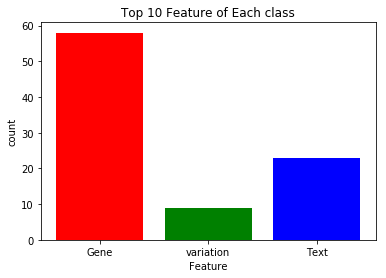

In [132]:
# How many times Each class top 10 features present,Count is belongs to which feature has present most times in top 10 features of Each class.

plt.close()
plt.bar(["Gene","variation","Text"],[gene_count,var_count,text_count],color='rgb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 10 Feature of Each class")
plt.show()

### 5.2 Logistic Regression (without class balancing):

In [133]:
train_loss=[]
cv_loss =[]

for i in tqdm(alpha):
    
    model = SGDClassifier(alpha=i,loss="log",penalty="l2",n_jobs=-1,random_state=42)
    model.fit(train_bow,y_train)
    clf = CalibratedClassifierCV(model,method="sigmoid")
    clf.fit(train_bow,y_train)
    
    train_proba = clf.predict_proba(train_bow)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    cv_proba = clf.predict_proba(cv_bow)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 11/11 [00:40<00:00,  3.73s/it]


In [134]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 1e-05 ---> trainl loss = 0.99 and test loss = 1.339
alpha = 0.0001 ---> trainl loss = 0.885 and test loss = 1.27
alpha = 0.001 ---> trainl loss = 0.587 and test loss = 1.087
alpha = 0.01 ---> trainl loss = 0.755 and test loss = 1.182
alpha = 0.1 ---> trainl loss = 1.202 and test loss = 1.32
alpha = 1 ---> trainl loss = 1.473 and test loss = 1.525
alpha = 10 ---> trainl loss = 1.515 and test loss = 1.559
alpha = 100 ---> trainl loss = 1.52 and test loss = 1.563
alpha = 1000 ---> trainl loss = 1.521 and test loss = 1.563
alpha = 10000 ---> trainl loss = 1.521 and test loss = 1.572
alpha = 100000 ---> trainl loss = 1.54 and test loss = 1.614
best aplha ---> 0.001


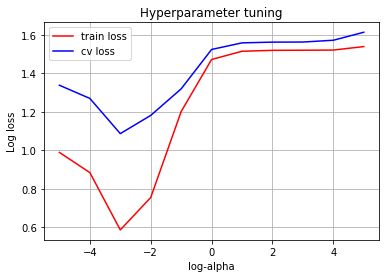

In [135]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.legend()
plt.grid()
plt.show()

##### Observation:

The best hyperparameter alpha = 0.001

In [136]:
# Best Hyperparameter

model = SGDClassifier(alpha=0.001,loss="log",penalty="l2",n_jobs=-1,random_state=42)
model.fit(train_bow,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_bow,y_train)
    
train_proba = clf.predict_proba(train_bow)
train_ll = log_loss(y_train,train_proba)
    
cv_proba = clf.predict_proba(cv_bow)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_bow)
test_ll = log_loss(y_test,test_proba)

In [137]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.5867743513078185
------------------------------cv loss------------------------------
1.0872626062905217
------------------------------test loss------------------------------
1.0713881268505634


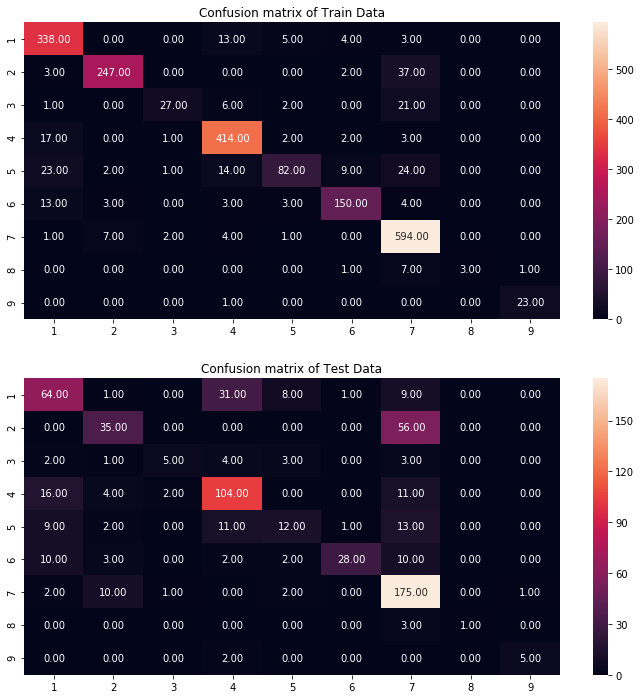

In [138]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

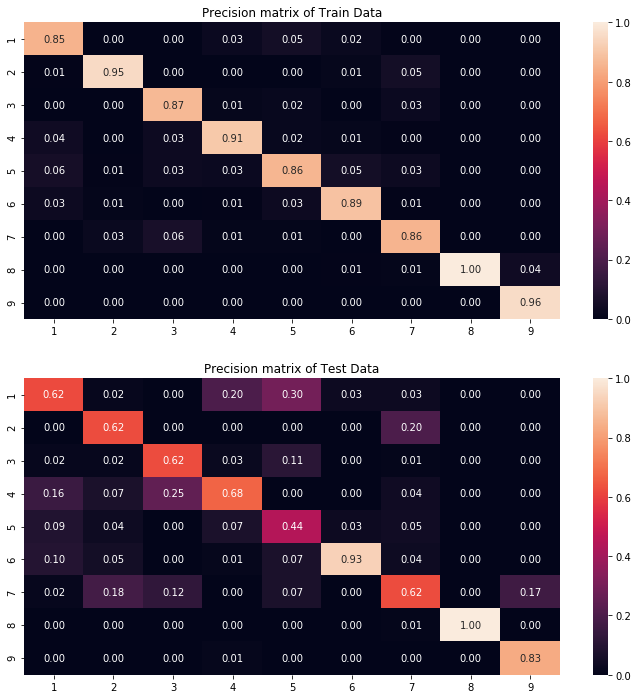

In [139]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

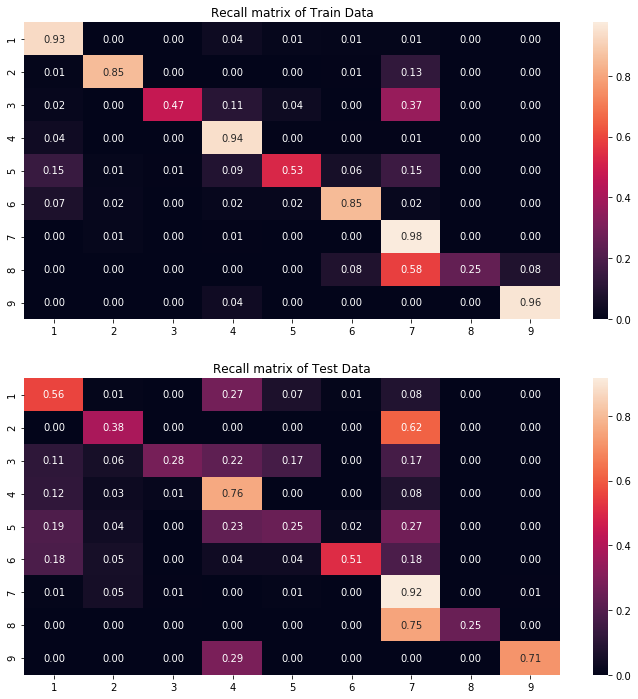

In [140]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

####  Feature Importance

In [141]:
classes = model.classes_

In [142]:
classes

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [143]:
fi = model.coef_

In [144]:
fi.shape

(9, 41653)

In [145]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 87874.11it/s]


In [146]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.3548872180451128


In [147]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0


for i in range(9):
    
    label =np.argsort(fi[i])[::-1][:10]
    
    print("-"*30+"Class {} important features".format(i+1)+"-"*30)
    
    for j in range(10):
        
        if label[j] < 230:
            
            print("Gene feature = {}".format(model_gene1.get_feature_names()[label[j]]))
            
            gene_count +=1
            
        elif label[j] >= 230 and label[j] < 1961+230:
            
            print("Variation feature = {}".format(model_var1.get_feature_names()[label[j] - 230]))
            
            var_count +=1
            
        else:
            
            print("Text feature = {}".format(model_text1.get_feature_names()[label[j] - (1961+230)]))
            
            text_count +=1

------------------------------Class 1 important features------------------------------
Variation feature = truncating
Variation feature = mutations
Variation feature = deletion
Gene feature = smad2
Gene feature = tp53
Gene feature = ercc2
Gene feature = brca1
Variation feature = h1686r
Gene feature = smad4
Variation feature = r659l
------------------------------Class 2 important features------------------------------
Variation feature = fusions
Gene feature = kit
Gene feature = hras
Variation feature = amplification
Gene feature = abl1
Gene feature = ros1
Gene feature = egfr
Gene feature = ccnd3
Variation feature = q79r
Gene feature = smo
------------------------------Class 3 important features------------------------------
Variation feature = v369g
Variation feature = a121v
Variation feature = i18v
Variation feature = g334r
Variation feature = r462i
Variation feature = s1651f
Variation feature = h570r
Variation feature = q59e
Variation feature = i834v
Variation feature = v534e
-------

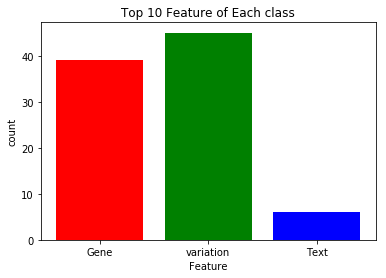

In [148]:
# How many times Each class top 10 features present,Count is belongs to which feature has present most times in top 10 features of Each class.

plt.close()
plt.bar(["Gene","variation","Text"],[gene_count,var_count,text_count],color='rgb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 10 Feature of Each class")
plt.show()

### 5.3  Logistic Regression (with class balancing):

In [271]:
train_loss=[]
cv_loss =[]

for i in tqdm(alpha):
    
    model = SGDClassifier(alpha=i,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
    model.fit(train_bow,y_train)
    clf = CalibratedClassifierCV(model,method="sigmoid")
    clf.fit(train_bow,y_train)
    
    train_proba = clf.predict_proba(train_bow)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    cv_proba = clf.predict_proba(cv_bow)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 11/11 [00:34<00:00,  3.14s/it]


In [272]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 1e-05 ---> trainl loss = 1.016 and test loss = 1.364
alpha = 0.0001 ---> trainl loss = 0.89 and test loss = 1.235
alpha = 0.001 ---> trainl loss = 0.592 and test loss = 1.049
alpha = 0.01 ---> trainl loss = 0.771 and test loss = 1.132
alpha = 0.1 ---> trainl loss = 1.323 and test loss = 1.424
alpha = 1 ---> trainl loss = 1.571 and test loss = 1.625
alpha = 10 ---> trainl loss = 1.602 and test loss = 1.653
alpha = 100 ---> trainl loss = 1.605 and test loss = 1.656
alpha = 1000 ---> trainl loss = 1.606 and test loss = 1.656
alpha = 10000 ---> trainl loss = 1.606 and test loss = 1.656
alpha = 100000 ---> trainl loss = 1.636 and test loss = 1.671
best aplha ---> 0.001


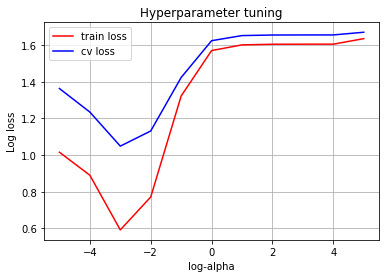

In [273]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.grid()
plt.legend()
plt.show()

##### Observation:

The best hyperparameter alpha = 0.001

In [274]:
# Best Hyperparameter

model = SGDClassifier(alpha=0.001,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
model.fit(train_bow,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_bow,y_train)
    
train_proba = clf.predict_proba(train_bow)
train_ll = log_loss(y_train,train_proba)
    
cv_proba = clf.predict_proba(cv_bow)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_bow)
test_ll = log_loss(y_test,test_proba)

In [275]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.5916301206011941
------------------------------cv loss------------------------------
1.049054984098807
------------------------------test loss------------------------------
1.0433249203482733


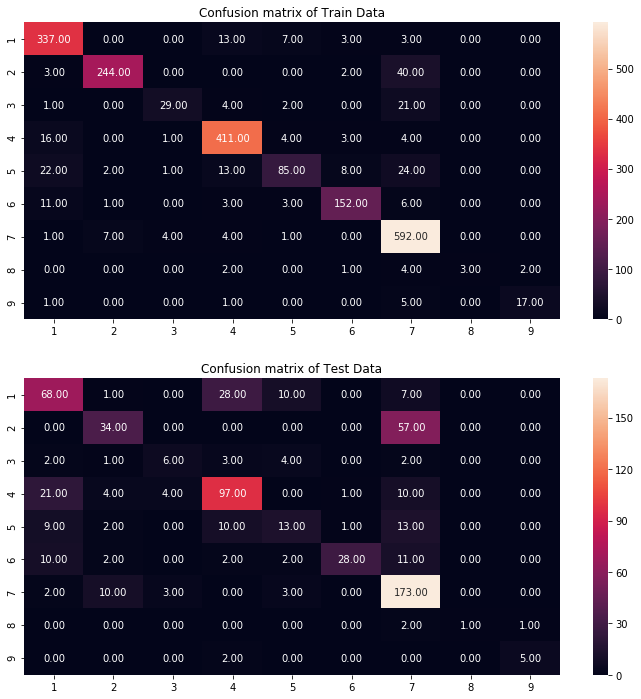

In [276]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

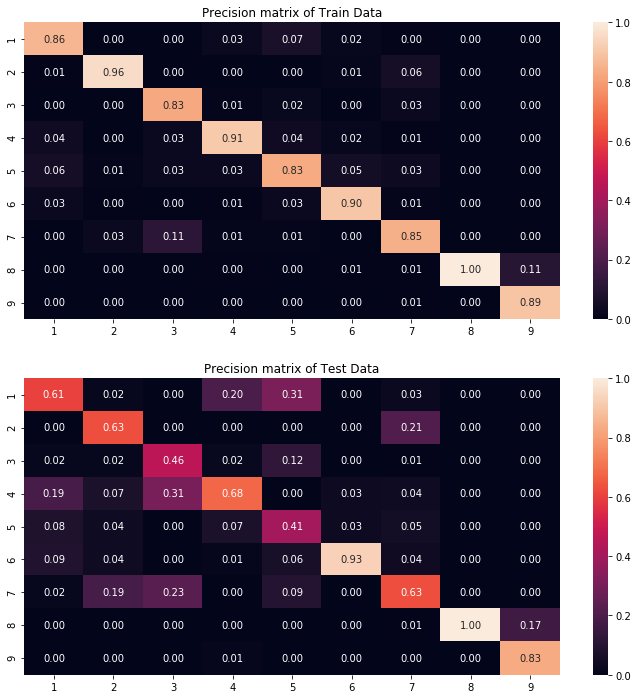

In [277]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

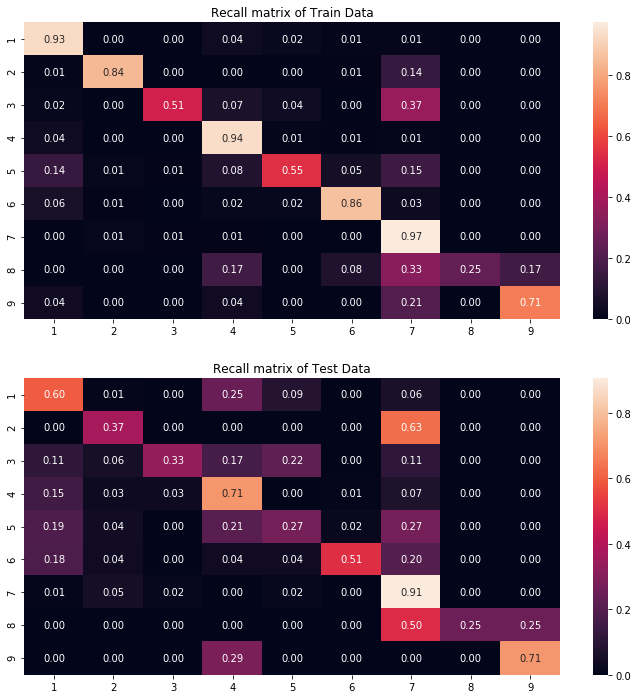

In [278]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

####  Feature Importance

In [279]:
classes = model.classes_

In [280]:
classes

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [281]:
fi = model.coef_

In [282]:
fi.shape

(9, 41653)

In [283]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 149780.48it/s]


In [284]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.3609022556390977


In [285]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0


for i in range(9):
    
    label =np.argsort(fi[i])[::-1][:10]
    
    print("-"*30+"Class {} important features".format(i+1)+"-"*30)
    
    for j in range(10):
        
        if label[j] < 230:
            
            print("Gene feature = {}".format(model_gene1.get_feature_names()[label[j]]))
            
            gene_count +=1
            
        elif label[j] >= 230 and label[j] < 1961+230:
            
            print("Variation feature = {}".format(model_var1.get_feature_names()[label[j] - 230]))
            
            var_count +=1
            
        else:
            
            print("Text feature = {}".format(model_text1.get_feature_names()[label[j] - (1961+230)]))
            
            text_count +=1

------------------------------Class 1 important features------------------------------
Variation feature = truncating
Variation feature = mutations
Variation feature = deletion
Gene feature = smad2
Gene feature = tp53
Gene feature = ercc2
Gene feature = cdh1
Gene feature = smad4
Variation feature = h1686r
Gene feature = ptprd
------------------------------Class 2 important features------------------------------
Variation feature = fusions
Gene feature = kit
Gene feature = hras
Variation feature = amplification
Gene feature = abl1
Gene feature = ros1
Gene feature = egfr
Variation feature = g13v
Gene feature = ccnd3
Gene feature = smo
------------------------------Class 3 important features------------------------------
Variation feature = v369g
Variation feature = a121v
Variation feature = g334r
Variation feature = i18v
Variation feature = a19v
Variation feature = q59e
Variation feature = i834v
Variation feature = s1651f
Variation feature = r462i
Variation feature = h570r
--------------

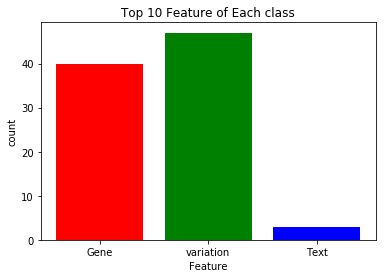

In [286]:
# How many times Each class top 10 features present,Count is belongs to which feature has present most times in top 10 features of Each class.

plt.close()
plt.bar(["Gene","variation","Text"],[gene_count,var_count,text_count],color='rgb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 10 Feature of Each class")
plt.show()

### 5.4 Linear SVM (without class balancing):

In [287]:
train_loss=[]
cv_loss =[]

for i in tqdm(alpha):
    
    model = SGDClassifier(alpha=i,loss="hinge",penalty="l2",n_jobs=-1,random_state=42)
    model.fit(train_bow,y_train)
    clf = CalibratedClassifierCV(model,method="sigmoid")
    clf.fit(train_bow,y_train)
    
    train_proba = clf.predict_proba(train_bow)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    cv_proba = clf.predict_proba(cv_bow)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 11/11 [00:31<00:00,  3.13s/it]


In [288]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 1e-05 ---> trainl loss = 0.947 and test loss = 1.307
alpha = 0.0001 ---> trainl loss = 0.915 and test loss = 1.283
alpha = 0.001 ---> trainl loss = 0.738 and test loss = 1.195
alpha = 0.01 ---> trainl loss = 0.726 and test loss = 1.127
alpha = 0.1 ---> trainl loss = 1.122 and test loss = 1.264
alpha = 1 ---> trainl loss = 1.517 and test loss = 1.561
alpha = 10 ---> trainl loss = 1.521 and test loss = 1.563
alpha = 100 ---> trainl loss = 1.521 and test loss = 1.563
alpha = 1000 ---> trainl loss = 1.521 and test loss = 1.563
alpha = 10000 ---> trainl loss = 1.521 and test loss = 1.567
alpha = 100000 ---> trainl loss = 1.524 and test loss = 1.572
best aplha ---> 0.01


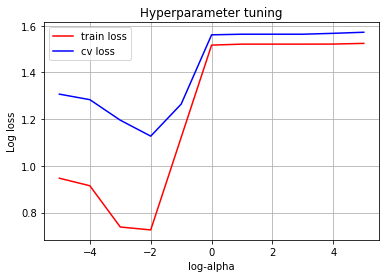

In [289]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.grid()
plt.legend()
plt.show()

##### Observation:

The best hyperparameter alpha = 0.01

In [290]:
# Best Hyperparameter

model = SGDClassifier(alpha=0.01,loss="hinge",penalty="l2",n_jobs=-1,random_state=42)
model.fit(train_bow,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_bow,y_train)
    
train_proba = clf.predict_proba(train_bow)
train_ll = log_loss(y_train,train_proba)
    
cv_proba = clf.predict_proba(cv_bow)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_bow)
test_ll = log_loss(y_test,test_proba)

In [291]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.7256218912876001
------------------------------cv loss------------------------------
1.1270537456816099
------------------------------test loss------------------------------
1.118801945262541


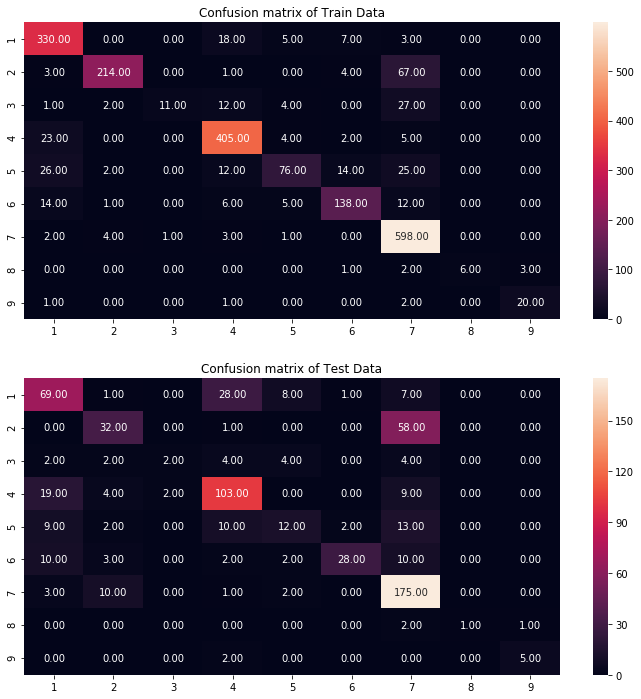

In [292]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

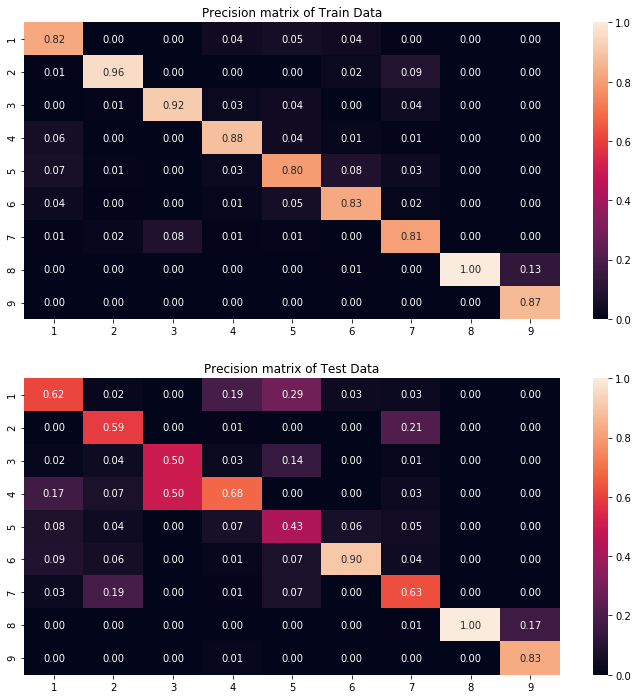

In [293]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

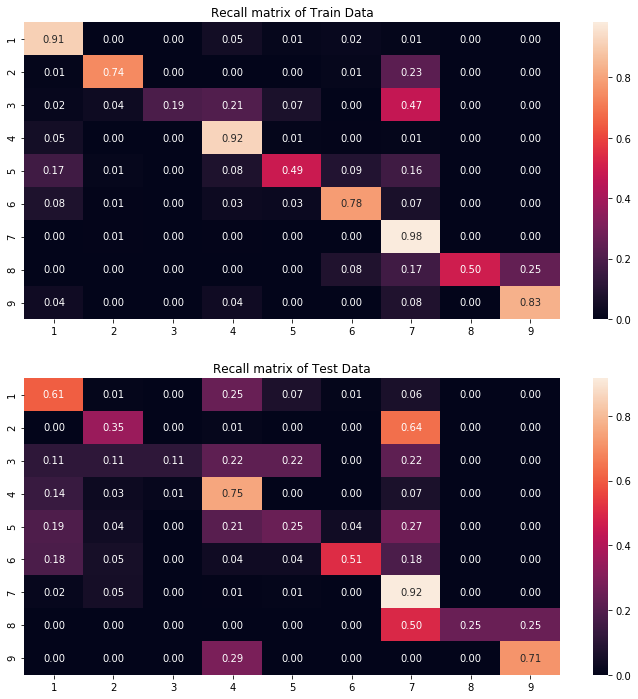

In [294]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

####  Feature Importance

In [295]:
classes = model.classes_

In [296]:
classes

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [297]:
fi = model.coef_

In [298]:
fi.shape

(9, 41653)

In [299]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 99735.83it/s]


In [300]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.35789473684210527


In [301]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0


for i in range(9):
    
    label =np.argsort(fi[i])[::-1][:10]
    
    print("-"*30+"Class {} important features".format(i+1)+"-"*30)
    
    for j in range(10):
        
        if label[j] < 230:
            
            print("Gene feature = {}".format(model_gene1.get_feature_names()[label[j]]))
            
            gene_count +=1
            
        elif label[j] >= 230 and label[j] < 1961+230:
            
            print("Variation feature = {}".format(model_var1.get_feature_names()[label[j] - 230]))
            
            var_count +=1
            
        else:
            
            print("Text feature = {}".format(model_text1.get_feature_names()[label[j] - (1961+230)]))
            
            text_count +=1

------------------------------Class 1 important features------------------------------
Variation feature = truncating
Variation feature = mutations
Variation feature = deletion
Gene feature = ercc2
Gene feature = tp53
Gene feature = smad2
Gene feature = foxa1
Gene feature = ptprt
Gene feature = cdh1
Text feature = cse
------------------------------Class 2 important features------------------------------
Variation feature = fusions
Gene feature = abl1
Gene feature = hras
Gene feature = ros1
Variation feature = amplification
Gene feature = kit
Gene feature = epas1
Variation feature = pdgfrb
Gene feature = smo
Gene feature = ret
------------------------------Class 3 important features------------------------------
Gene feature = tmprss2
Text feature = bph
Text feature = nonaggress
Text feature = orchiectomi
Text feature = kallikrein
Text feature = nes1
Text feature = giri
Text feature = scaveng
Text feature = 005656
Text feature = ranger
------------------------------Class 4 important fea

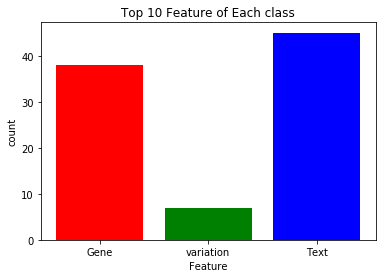

In [302]:
# How many times Each class top 10 features present,Count is belongs to which feature has present most times in top 10 features of Each class.

plt.close()
plt.bar(["Gene","variation","Text"],[gene_count,var_count,text_count],color='rgb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 10 Feature of Each class")
plt.show()

### 5.5 Linear SVM (with class balancing):

In [303]:
train_loss=[]
cv_loss =[]

for i in tqdm(alpha):
    
    model = SGDClassifier(alpha=i,loss="hinge",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
    model.fit(train_bow,y_train)
    clf = CalibratedClassifierCV(model,method="sigmoid")
    clf.fit(train_bow,y_train)
    
    train_proba = clf.predict_proba(train_bow)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    cv_proba = clf.predict_proba(cv_bow)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 11/11 [00:30<00:00,  3.06s/it]


In [304]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 1e-05 ---> trainl loss = 1.032 and test loss = 1.392
alpha = 0.0001 ---> trainl loss = 0.966 and test loss = 1.349
alpha = 0.001 ---> trainl loss = 0.774 and test loss = 1.21
alpha = 0.01 ---> trainl loss = 0.777 and test loss = 1.136
alpha = 0.1 ---> trainl loss = 1.249 and test loss = 1.365
alpha = 1 ---> trainl loss = 1.601 and test loss = 1.652
alpha = 10 ---> trainl loss = 1.606 and test loss = 1.656
alpha = 100 ---> trainl loss = 1.606 and test loss = 1.656
alpha = 1000 ---> trainl loss = 1.606 and test loss = 1.656
alpha = 10000 ---> trainl loss = 1.606 and test loss = 1.656
alpha = 100000 ---> trainl loss = 1.613 and test loss = 1.652
best aplha ---> 0.01


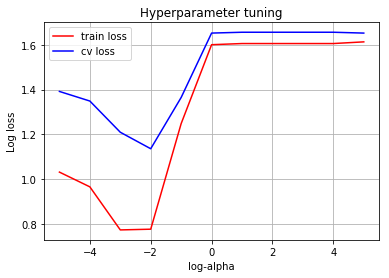

In [305]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.grid()
plt.legend()
plt.show()

##### Observation:

The best hyperparameter alpha = 0.01

In [306]:
# Best Hyperparameter

model = SGDClassifier(alpha=0.01,loss="hinge",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
model.fit(train_bow,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_bow,y_train)
    
train_proba = clf.predict_proba(train_bow)
train_ll = log_loss(y_train,train_proba)
    
cv_proba = clf.predict_proba(cv_bow)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_bow)
test_ll = log_loss(y_test,test_proba)

In [307]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.7773230865473515
------------------------------cv loss------------------------------
1.136328612561244
------------------------------test loss------------------------------
1.1279153571916647


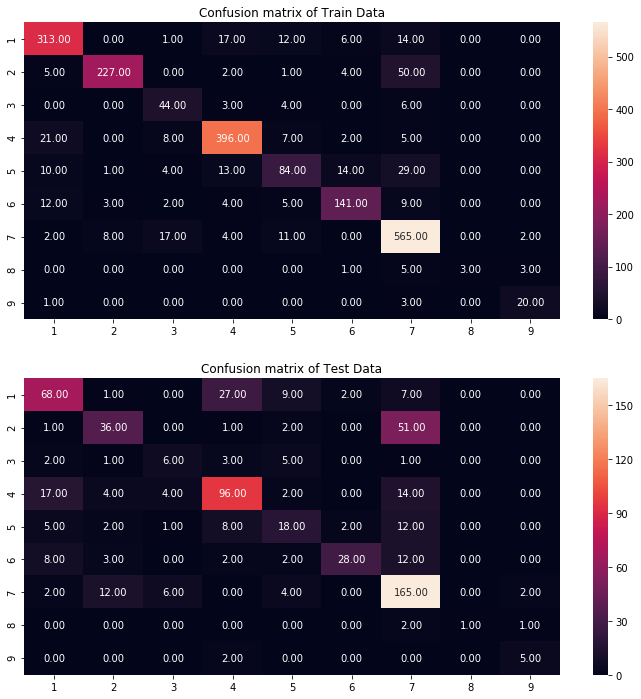

In [308]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

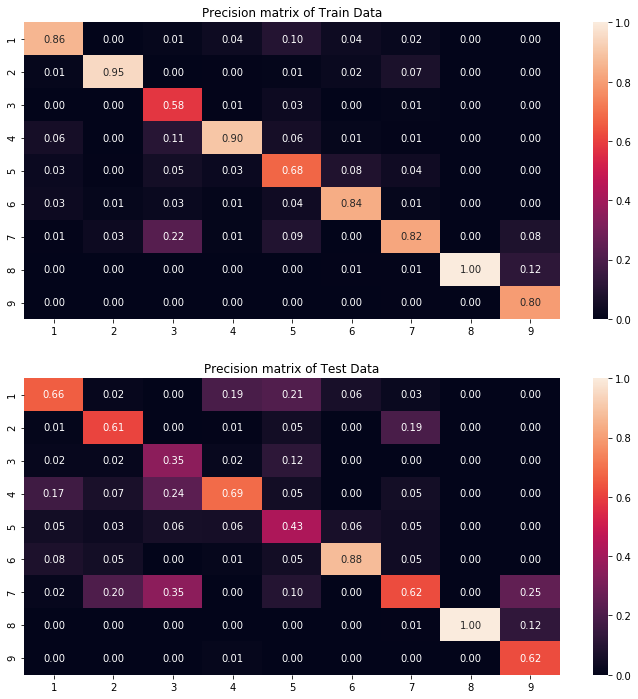

In [309]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

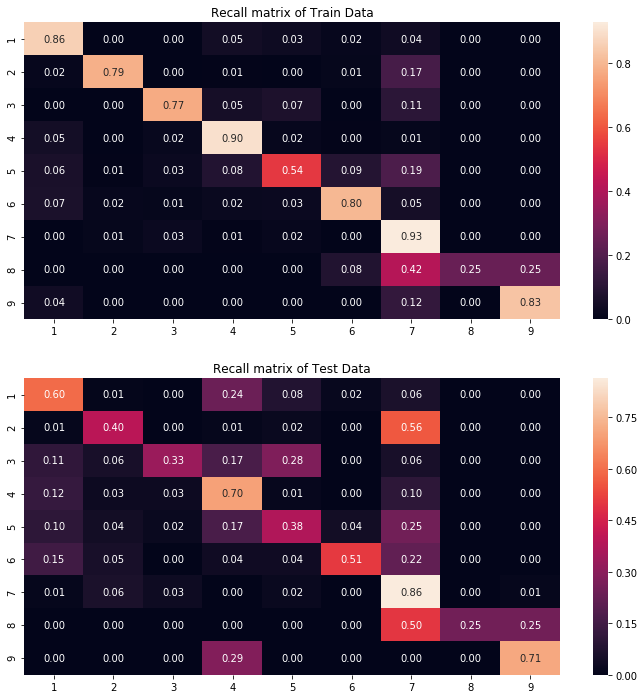

In [310]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

####  Feature Importance

In [311]:
classes = model.classes_

In [312]:
classes

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [313]:
fi = model.coef_

In [314]:
fi.shape

(9, 41653)

In [315]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 176364.98it/s]


In [316]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.36390977443609024


In [317]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0


for i in range(9):
    
    label =np.argsort(fi[i])[::-1][:10]
    
    print("-"*30+"Class {} important features".format(i+1)+"-"*30)
    
    for j in range(10):
        
        if label[j] < 230:
            
            print("Gene feature = {}".format(model_gene1.get_feature_names()[label[j]]))
            
            gene_count +=1
            
        elif label[j] >= 230 and label[j] < 1961+230:
            
            print("Variation feature = {}".format(model_var1.get_feature_names()[label[j] - 230]))
            
            var_count +=1
            
        else:
            
            print("Text feature = {}".format(model_text1.get_feature_names()[label[j] - (1961+230)]))
            
            text_count +=1

------------------------------Class 1 important features------------------------------
Variation feature = truncating
Variation feature = mutations
Variation feature = deletion
Gene feature = ercc2
Gene feature = smad2
Gene feature = cdh1
Gene feature = foxa1
Text feature = neutravidin
Text feature = sk18
Text feature = homophil
------------------------------Class 2 important features------------------------------
Variation feature = fusions
Gene feature = abl1
Gene feature = hras
Gene feature = ros1
Variation feature = amplification
Gene feature = epas1
Variation feature = pdgfrb
Text feature = interindividu
Text feature = gimema
Text feature = f317l
------------------------------Class 3 important features------------------------------
Gene feature = mtor
Gene feature = tsc1
Variation feature = s186y
Variation feature = c628y
Variation feature = s1651f
Variation feature = r462i
Variation feature = k830r
Variation feature = a121v
Variation feature = s562l
Variation feature = s153r
----

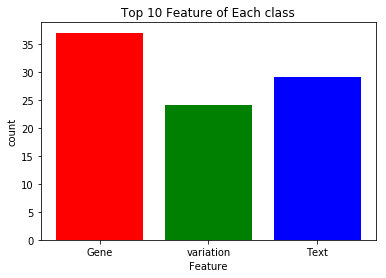

In [318]:
# How many times Each class top 10 features present,Count is belongs to which feature has present most times in top 10 features of Each class.

plt.close()
plt.bar(["Gene","variation","Text"],[gene_count,var_count,text_count],color='rgb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 10 Feature of Each class")
plt.show()

### 5.6 Random Forest Model

In [149]:
# References
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_random_search/

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


In [321]:
# Random forest Model 
tree = [100,200,500,1000,2000]
depth  =[5,6,8,10]

train_loss =[]
cv_loss =[]

for i in tqdm(depth):
    
    for j in tree:
        
        model = RandomForestClassifier(max_depth=i,n_estimators=j,random_state=42,n_jobs=-1)
        model.fit(train_bow,y_train)
        clf = CalibratedClassifierCV(model,method="sigmoid")
        clf.fit(train_bow,y_train)
        
        train_proba = clf.predict_proba(train_bow)
        train_ll = log_loss(y_train,train_proba)
        train_loss.append(train_ll)
        
        cv_proba = clf.predict_proba(cv_bow)
        cv_ll = log_loss(y_cv,cv_proba)
        cv_loss.append(cv_ll)

100%|██████████| 4/4 [20:47<00:00, 317.25s/it]


In [322]:
best_alpha = np.argmin(cv_loss)

In [335]:
for u in depth:
    for i,j,k in zip(train_loss,cv_loss,tree):
        print("depth= {},n_estimaters = {} ---> trainl loss = {} and test loss = {}".format(u,k,round(i,5),round(j,5)))

depth= 5,n_estimaters = 100 ---> trainl loss = 1.03412 and test loss = 1.2484
depth= 5,n_estimaters = 200 ---> trainl loss = 1.01958 and test loss = 1.23868
depth= 5,n_estimaters = 500 ---> trainl loss = 1.01038 and test loss = 1.22936
depth= 5,n_estimaters = 1000 ---> trainl loss = 1.00507 and test loss = 1.22546
depth= 5,n_estimaters = 2000 ---> trainl loss = 1.00143 and test loss = 1.22486
depth= 6,n_estimaters = 100 ---> trainl loss = 1.03412 and test loss = 1.2484
depth= 6,n_estimaters = 200 ---> trainl loss = 1.01958 and test loss = 1.23868
depth= 6,n_estimaters = 500 ---> trainl loss = 1.01038 and test loss = 1.22936
depth= 6,n_estimaters = 1000 ---> trainl loss = 1.00507 and test loss = 1.22546
depth= 6,n_estimaters = 2000 ---> trainl loss = 1.00143 and test loss = 1.22486
depth= 8,n_estimaters = 100 ---> trainl loss = 1.03412 and test loss = 1.2484
depth= 8,n_estimaters = 200 ---> trainl loss = 1.01958 and test loss = 1.23868
depth= 8,n_estimaters = 500 ---> trainl loss = 1.01

In [336]:
model = RandomForestClassifier(max_depth=10,n_estimators=2000,random_state=12,n_jobs=-1)
model.fit(train_bow,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_bow,y_train)
        
train_proba = clf.predict_proba(train_bow)
train_ll = log_loss(y_train,train_proba)

cv_proba = clf.predict_proba(cv_bow)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_bow)
test_ll = log_loss(y_test,test_proba)

In [337]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.6929621438730625
------------------------------cv loss------------------------------
1.1696181367067338
------------------------------test loss------------------------------
1.1904514232170065


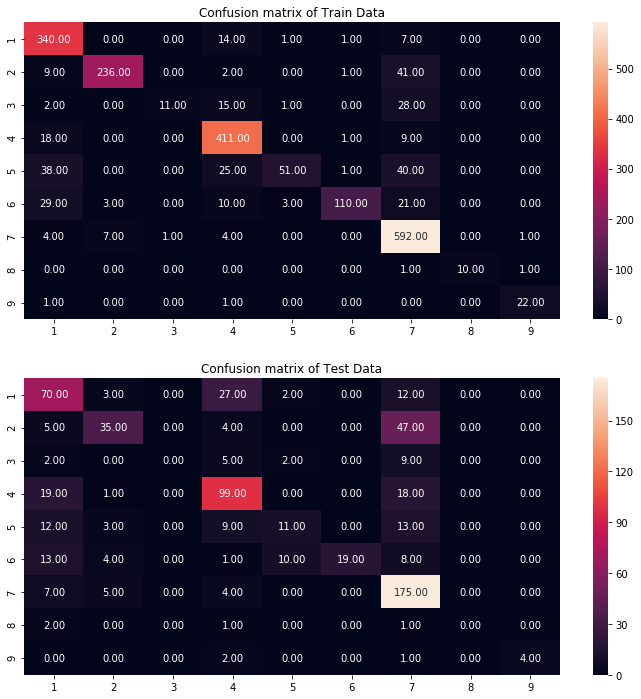

In [338]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

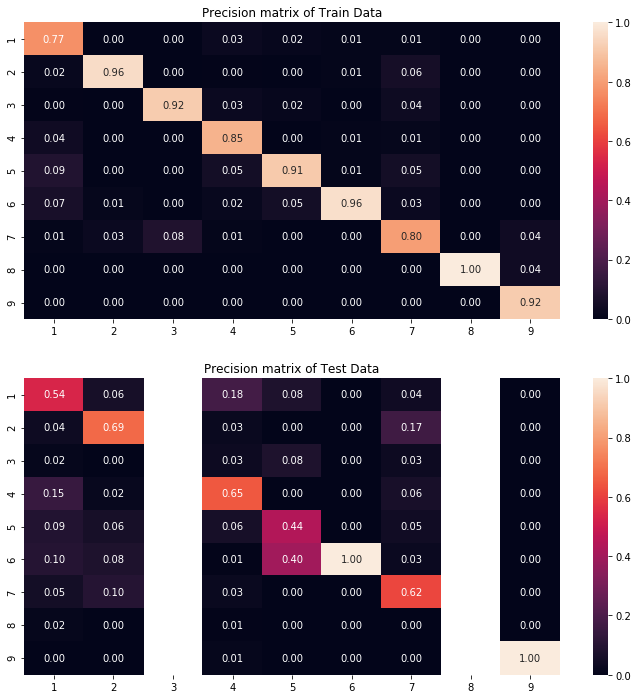

In [339]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

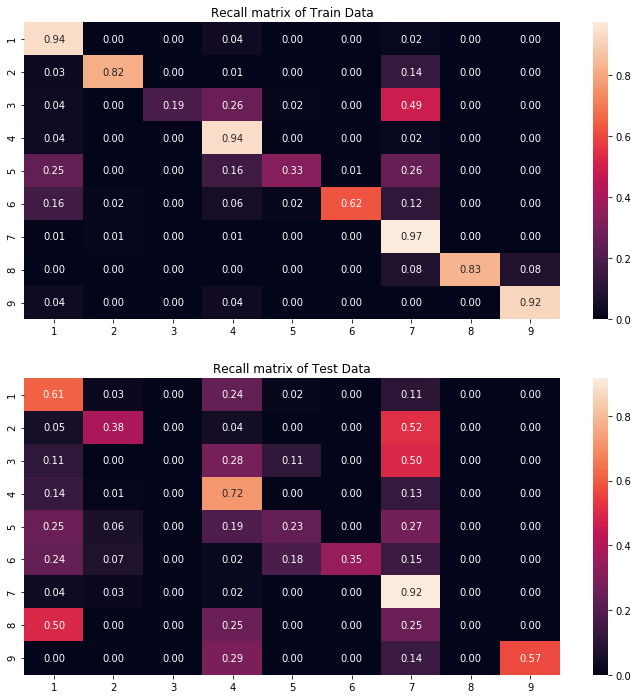

In [340]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

####  Feature Importance

In [341]:
fi =model.feature_importances_

In [342]:
fi.shape

(41653,)

In [343]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 84747.57it/s]


In [344]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.37894736842105264


In [345]:
label =np.argsort(fi)[::-1][:20]

In [346]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0

print("-"*30+"Top 20 Features"+"-"*30)
    
for j in range(20):
        
    if label[j] < 230:
            
        print("Gene feature = {}".format(model_gene1.get_feature_names()[label[j]]))
            
        gene_count +=1
            
    elif label[j] >= 230 and label[j] < 1961+230:
            
        print("Variation feature = {}".format(model_var1.get_feature_names()[label[j] - 230]))
            
        var_count +=1
            
    else:
            
        print("Text feature = {}".format(model_text1.get_feature_names()[label[j] - (1961+230)]))
            
        text_count +=1

------------------------------Top 20 Features------------------------------
Text feature = kinas
Text feature = tyrosin
Text feature = suppressor
Text feature = missens
Text feature = inhibitor
Text feature = function
Text feature = nonsens
Text feature = oncogen
Text feature = phosphoryl
Text feature = receptor
Text feature = erk
Text feature = therapi
Text feature = brca1
Variation feature = truncating
Text feature = inactiv
Text feature = protein
Variation feature = mutations
Text feature = ba
Text feature = treatment
Text feature = signal


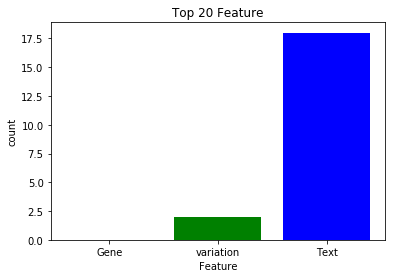

In [347]:
# How many times Each class top 20 features present,Count is belongs to which feature has present most times in top 20 features of Each class.

plt.close()
plt.bar(["Gene","variation","Text"],[gene_count,var_count,text_count],color='rgb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 20 Feature")
plt.show()

### 5.7 Stacking Classifier 

In [525]:
# References
# http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

In [526]:
from mlxtend.classifier import StackingClassifier

In [529]:
# Naive Bayes

m1 = MultinomialNB(alpha=1)
m1.fit(train_bow,y_train)
clf1 = CalibratedClassifierCV (m1,method="sigmoid")
clf1.fit(train_bow,y_train)

# Logistic Regression

m2 = SGDClassifier(alpha=0.001,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
m2.fit(train_bow,y_train)
clf2 = CalibratedClassifierCV(m2,method="sigmoid")
clf2.fit(train_bow,y_train)

# Linear SVM

m3 = SGDClassifier(alpha=0.01,loss="hinge",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
m3.fit(train_bow,y_train)
clf3 = CalibratedClassifierCV(m3,method="sigmoid")
clf3.fit(train_bow,y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
            cv='warn', method='sigmoid')

In [540]:
# Meta classifier (Logistic regression)

alpha =[0.0001,0.001,0.01,0.1,1,10,100,1000]

In [541]:
log_alpha=[]
for i in alpha:
    log_alpha.append(math.log10(i))
log_alpha

[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0]

In [542]:
train_loss = []
cv_loss =[]

for i in tqdm(alpha):
    
    lr = SGDClassifier(alpha=i,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
    clr = CalibratedClassifierCV(lr,method="sigmoid")
    sclf = StackingClassifier(classifiers=[clf1,clf2,clf3],meta_classifier=clr,use_probas=True)
    sclf.fit(train_bow,y_train)
    
    # predict_train
    
    train_proba = sclf.predict_proba(train_bow)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    # Cv data prediction
    
    cv_proba = sclf.predict_proba(cv_bow)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 8/8 [01:15<00:00,  9.50s/it]


In [543]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 0.0001 ---> trainl loss = 0.297 and test loss = 1.25
alpha = 0.001 ---> trainl loss = 0.354 and test loss = 1.215
alpha = 0.01 ---> trainl loss = 0.401 and test loss = 1.206
alpha = 0.1 ---> trainl loss = 0.419 and test loss = 1.204
alpha = 1 ---> trainl loss = 0.471 and test loss = 1.288
alpha = 10 ---> trainl loss = 0.648 and test loss = 1.366
alpha = 100 ---> trainl loss = 0.707 and test loss = 1.356
alpha = 1000 ---> trainl loss = 0.722 and test loss = 1.352
best aplha ---> 0.1


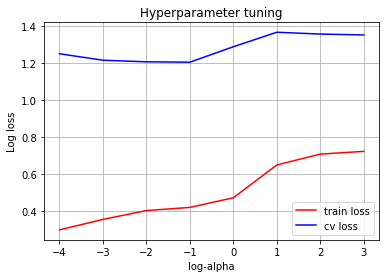

In [544]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.legend()
plt.grid()
plt.show()

In [545]:
lr = SGDClassifier(alpha=0.1,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
clr = CalibratedClassifierCV(lr,method="sigmoid")
sclf = StackingClassifier(classifiers=[clf1,clf2,clf3],meta_classifier=clr,use_probas=True)
sclf.fit(train_bow,y_train)
    
# predict_train
    
train_proba = sclf.predict_proba(train_bow)
train_ll = log_loss(y_train,train_proba)

# Cv data prediction
    
cv_proba = sclf.predict_proba(cv_bow)
cv_ll = log_loss(y_cv,cv_proba)

# test data

test_proba = sclf.predict_proba(test_bow)
test_ll = log_loss (y_test,test_proba)


In [546]:
print("train log-loss")
print("="*100)
print(train_ll)
print("cv log-loss")
print("="*100)
print(cv_ll)
print("test log-loss")
print("="*100)
print(test_ll)

train log-loss
0.418568583541171
cv log-loss
1.2043330140483275
test log-loss
1.2110137673786725


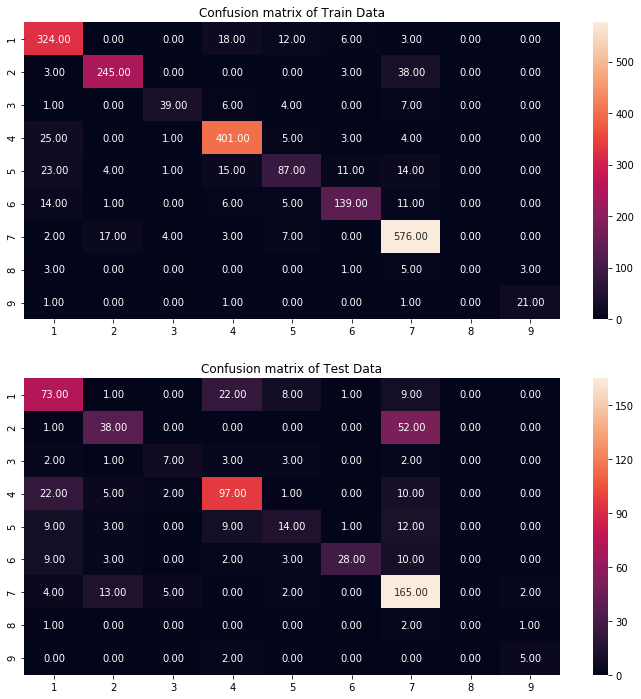

In [547]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

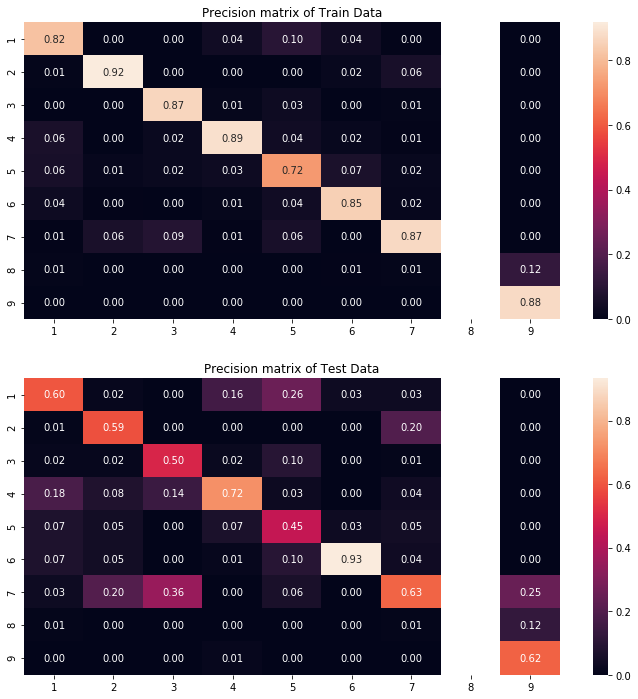

In [548]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

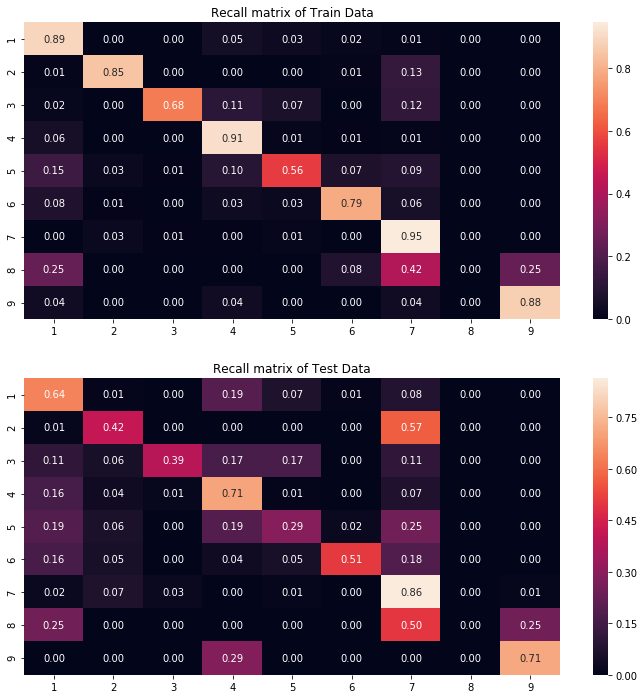

In [549]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

In [550]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 158730.49it/s]


In [551]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.35789473684210527


## 6. TFIDF Vectors on ML models

### 6.1 Naive bayes Model

In [150]:
alpha =[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]

In [151]:
log_alpha=[]
for i in alpha:
    log_alpha.append(math.log10(i))
log_alpha

[-5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]

In [152]:
train_loss=[]
cv_loss = []

for i in tqdm(alpha):
    
    model = MultinomialNB(alpha=i)
    model.fit(train_tfidf,y_train)
    clf = CalibratedClassifierCV(model,method="sigmoid")
    clf.fit(train_tfidf,y_train)
    
    # training data prediction
    
    train_proba = clf.predict_proba(train_tfidf)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    # Cv data prediction
    
    cv_proba = clf.predict_proba(cv_tfidf)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 11/11 [00:20<00:00,  1.88s/it]


In [153]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 1e-05 ---> trainl loss = 0.845 and test loss = 1.265
alpha = 0.0001 ---> trainl loss = 0.86 and test loss = 1.27
alpha = 0.001 ---> trainl loss = 0.876 and test loss = 1.261
alpha = 0.01 ---> trainl loss = 0.913 and test loss = 1.264
alpha = 0.1 ---> trainl loss = 0.912 and test loss = 1.271
alpha = 1 ---> trainl loss = 0.898 and test loss = 1.268
alpha = 10 ---> trainl loss = 0.994 and test loss = 1.279
alpha = 100 ---> trainl loss = 0.944 and test loss = 1.234
alpha = 1000 ---> trainl loss = 0.925 and test loss = 1.206
alpha = 10000 ---> trainl loss = 0.923 and test loss = 1.202
alpha = 100000 ---> trainl loss = 0.926 and test loss = 1.202
best aplha ---> 100000


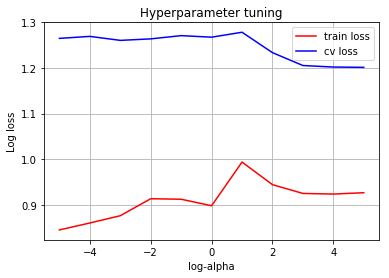

In [154]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.legend()
plt.grid()
plt.show()

##### Observation:

The best hyperparameter is alpha=100000

In [155]:
# Applying best hyperparameter

model = MultinomialNB(alpha=100000)
model.fit(train_tfidf,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_tfidf,y_train)
    
# training data prediction
    
train_proba = clf.predict_proba(train_tfidf)
train_ll = log_loss(y_train,train_proba)

# cv data

cv_proba = clf.predict_proba(cv_tfidf)
cv_ll = log_loss(y_cv,cv_proba)
    
# test data prediction
    
test_proba = clf.predict_proba(test_tfidf)
test_ll = log_loss(y_test,test_proba)

In [156]:
print("train log-loss")
print("="*100)
print(train_ll)
print("cv log-loss")
print("="*100)
print(cv_ll)
print("test log-loss")
print("="*100)
print(test_ll)

train log-loss
0.9264411208183181
cv log-loss
1.201552106614871
test log-loss
1.2154970349377516


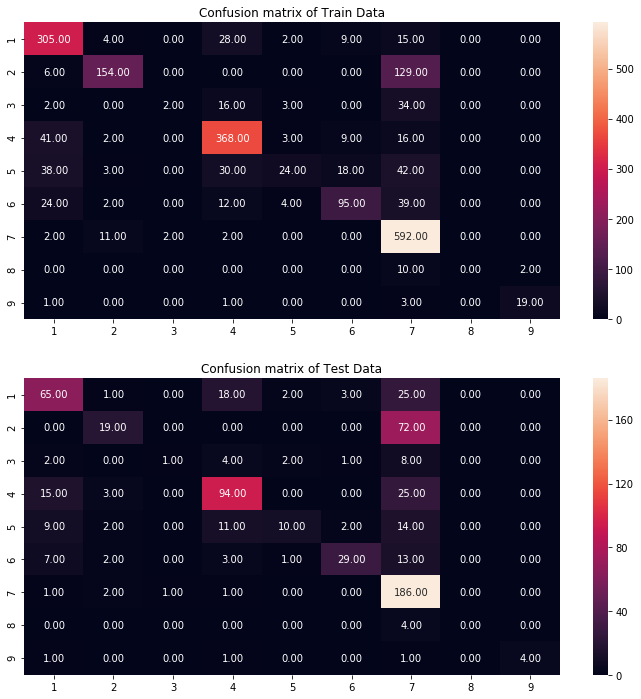

In [355]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

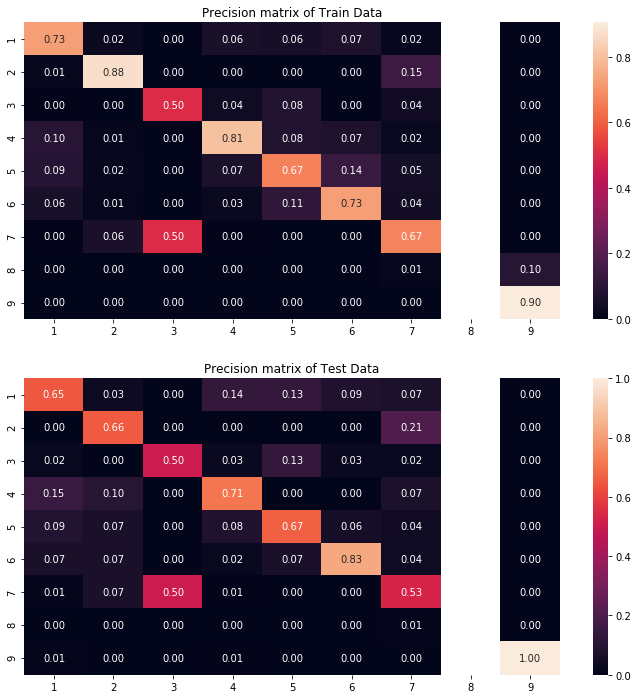

In [356]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

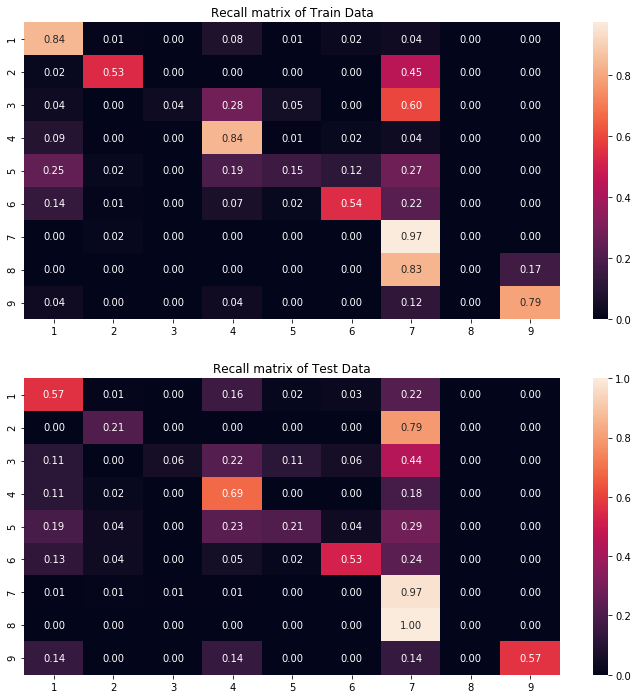

In [357]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

####  Feature Importance

In [358]:
classes = model.classes_

In [359]:
classes

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [360]:
fi = model.feature_log_prob_

In [361]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 60889.19it/s]


In [362]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.38646616541353385


In [363]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0


for i in range(9):
    
    label =np.argsort(fi[i])[::-1][:10]
    
    print("-"*30+"Class {} important features".format(i+1)+"-"*30)
    
    for j in range(10):
        
        if label[j] < 230:
            
            print("Gene feature = {}".format(model_gene.get_feature_names()[label[j]]))
            
            gene_count +=1
            
        elif label[j] >= 230 and label[j] < 1961+230:
            
            print("Variation feature = {}".format(model_var.get_feature_names()[label[j] - 230]))
            
            var_count +=1
            
        else:
            
            print("Text feature = {}".format(model_text.get_feature_names()[label[j] - (1961+230)]))
            
            text_count +=1

------------------------------Class 1 important features------------------------------
Gene feature = tp53
Gene feature = brca1
Variation feature = truncating
Variation feature = mutations
Variation feature = deletion
Gene feature = ercc2
Gene feature = tsc2
Gene feature = vhl
Gene feature = ptprt
Gene feature = smad4
------------------------------Class 2 important features------------------------------
Gene feature = egfr
Gene feature = kit
Variation feature = fusions
Gene feature = braf
Variation feature = amplification
Gene feature = abl1
Gene feature = hras
Gene feature = ros1
Gene feature = erbb2
Gene feature = ret
------------------------------Class 3 important features------------------------------
Gene feature = mtor
Gene feature = brca1
Gene feature = pdgfra
Gene feature = flt3
Gene feature = tsc1
Gene feature = alk
Text feature = bleni
Gene feature = erbb4
Gene feature = pten
Gene feature = tmprss2
------------------------------Class 4 important features----------------------

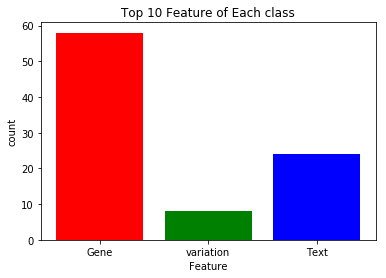

In [364]:
# How many times Each class top 10 features present,Count is belongs to which feature has present most times in top 10 features of Each class.

plt.close()
plt.bar(["Gene","variation","Text"],[gene_count,var_count,text_count],color='rgb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 10 Feature of Each class")
plt.show()

### 6.2 Logistic Regression (without class balancing):

In [157]:
train_loss=[]
cv_loss =[]

for i in tqdm(alpha):
    
    model = SGDClassifier(alpha=i,loss="log",penalty="l2",n_jobs=-1,random_state=42)
    model.fit(train_tfidf,y_train)
    clf = CalibratedClassifierCV(model,method="sigmoid")
    clf.fit(train_tfidf,y_train)
    
    train_proba = clf.predict_proba(train_tfidf)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    cv_proba = clf.predict_proba(cv_tfidf)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 11/11 [00:41<00:00,  3.79s/it]


In [158]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 1e-05 ---> trainl loss = 0.949 and test loss = 1.232
alpha = 0.0001 ---> trainl loss = 0.893 and test loss = 1.22
alpha = 0.001 ---> trainl loss = 0.557 and test loss = 1.057
alpha = 0.01 ---> trainl loss = 0.674 and test loss = 1.154
alpha = 0.1 ---> trainl loss = 1.022 and test loss = 1.253
alpha = 1 ---> trainl loss = 1.27 and test loss = 1.455
alpha = 10 ---> trainl loss = 1.311 and test loss = 1.498
alpha = 100 ---> trainl loss = 1.316 and test loss = 1.503
alpha = 1000 ---> trainl loss = 1.316 and test loss = 1.504
alpha = 10000 ---> trainl loss = 1.317 and test loss = 1.507
alpha = 100000 ---> trainl loss = 1.359 and test loss = 1.734
best aplha ---> 0.001


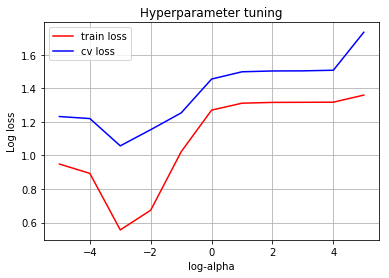

In [159]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.legend()
plt.grid()
plt.show()

##### Observation:

The best hyperparameter alpha = 0.001

In [160]:
# Best Hyperparameter

model = SGDClassifier(alpha=0.001,loss="log",penalty="l2",n_jobs=-1,random_state=42)
model.fit(train_tfidf,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_tfidf,y_train)
    
train_proba = clf.predict_proba(train_tfidf)
train_ll = log_loss(y_train,train_proba)
    
cv_proba = clf.predict_proba(cv_tfidf)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_tfidf)
test_ll = log_loss(y_test,test_proba)

In [161]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.556786146449638
------------------------------cv loss------------------------------
1.0572539467159114
------------------------------test loss------------------------------
1.0429931768819074


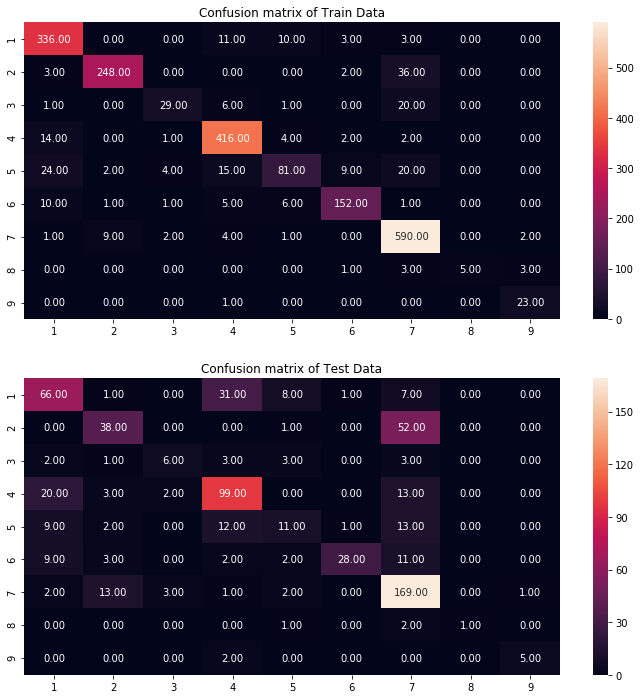

In [370]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

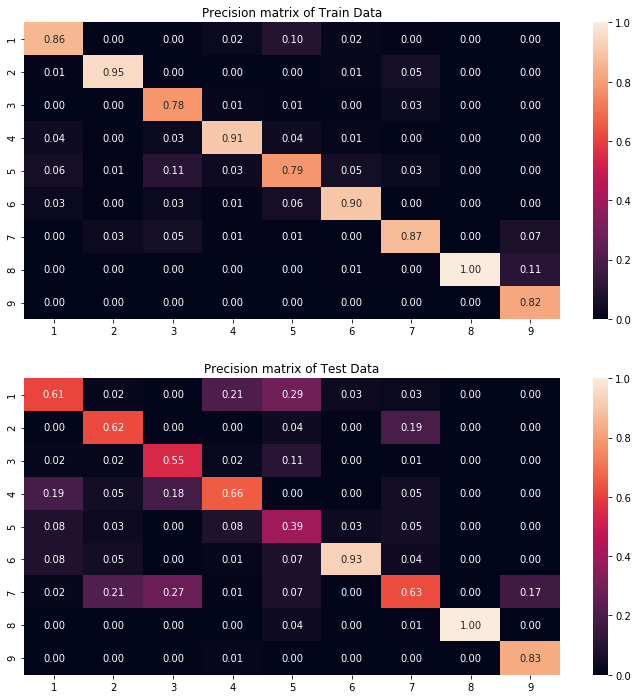

In [371]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

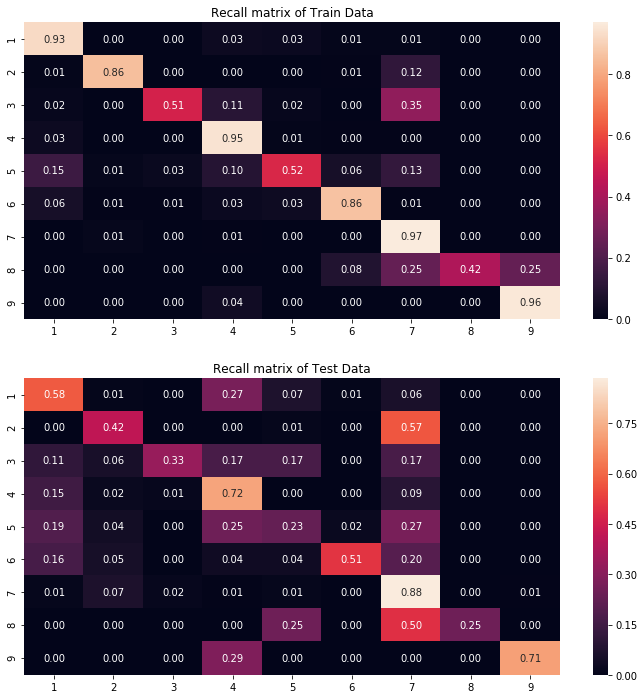

In [372]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

#### Feature Importance

In [373]:
classes = model.classes_

In [374]:
classes

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [375]:
fi = model.coef_

In [376]:
fi.shape

(9, 41653)

In [377]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 89688.16it/s]


In [378]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.36390977443609024


In [379]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0


for i in range(9):
    
    label =np.argsort(fi[i])[::-1][:10]
    
    print("-"*30+"Class {} important features".format(i+1)+"-"*30)
    
    for j in range(10):
        
        if label[j] < 230:
            
            print("Gene feature = {}".format(model_gene.get_feature_names()[label[j]]))
            
            gene_count +=1
            
        elif label[j] >= 230 and label[j] < 1961+230:
            
            print("Variation feature = {}".format(model_var.get_feature_names()[label[j] - 230]))
            
            var_count +=1
            
        else:
            
            print("Text feature = {}".format(model_text.get_feature_names()[label[j] - (1961+230)]))
            
            text_count +=1

------------------------------Class 1 important features------------------------------
Variation feature = truncating
Variation feature = mutations
Variation feature = deletion
Gene feature = tp53
Gene feature = smad2
Gene feature = ercc2
Variation feature = h1686r
Variation feature = r1896m
Variation feature = r659l
Variation feature = t1691i
------------------------------Class 2 important features------------------------------
Variation feature = fusions
Gene feature = hras
Gene feature = abl1
Gene feature = ros1
Variation feature = amplification
Gene feature = kit
Variation feature = q79r
Gene feature = ret
Variation feature = e267g
Variation feature = h68y
------------------------------Class 3 important features------------------------------
Variation feature = v369g
Variation feature = i18v
Variation feature = a121v
Variation feature = g334r
Variation feature = r462i
Variation feature = h570r
Variation feature = q59e
Variation feature = s1651f
Variation feature = i834v
Variation f

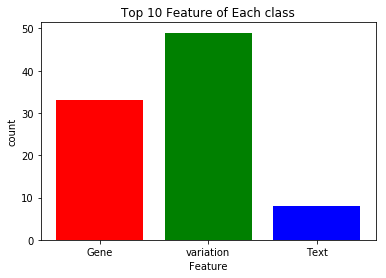

In [380]:
# How many times Each class top 10 features present,Count is belongs to which feature has present most times in top 10 features of Each class.

plt.close()
plt.bar(["Gene","variation","Text"],[gene_count,var_count,text_count],color='rgb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 10 Feature of Each class")
plt.show()

### 6.3 Logistic Regression (with class balancing):

In [381]:
train_loss=[]
cv_loss =[]

for i in tqdm(alpha):
    
    model = SGDClassifier(alpha=i,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
    model.fit(train_tfidf,y_train)
    clf = CalibratedClassifierCV(model,method="sigmoid")
    clf.fit(train_tfidf,y_train)
    
    train_proba = clf.predict_proba(train_tfidf)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    cv_proba = clf.predict_proba(cv_tfidf)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 11/11 [00:42<00:00,  3.94s/it]


In [382]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 1e-05 ---> trainl loss = 1.038 and test loss = 1.339
alpha = 0.0001 ---> trainl loss = 0.89 and test loss = 1.208
alpha = 0.001 ---> trainl loss = 0.567 and test loss = 1.027
alpha = 0.01 ---> trainl loss = 0.684 and test loss = 1.109
alpha = 0.1 ---> trainl loss = 1.084 and test loss = 1.249
alpha = 1 ---> trainl loss = 1.333 and test loss = 1.427
alpha = 10 ---> trainl loss = 1.372 and test loss = 1.46
alpha = 100 ---> trainl loss = 1.377 and test loss = 1.464
alpha = 1000 ---> trainl loss = 1.377 and test loss = 1.464
alpha = 10000 ---> trainl loss = 1.377 and test loss = 1.46
alpha = 100000 ---> trainl loss = 1.476 and test loss = 1.768
best aplha ---> 0.001


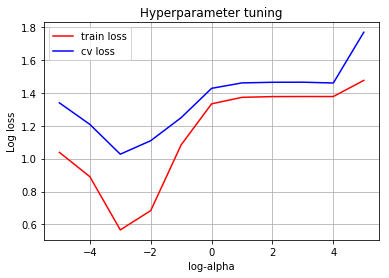

In [383]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.grid()
plt.legend()
plt.show()

##### Observation:

The best hyperparameter alpha = 0.001

In [384]:
# Best Hyperparameter

model = SGDClassifier(alpha=0.001,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
model.fit(train_tfidf,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_tfidf,y_train)
    
train_proba = clf.predict_proba(train_tfidf)
train_ll = log_loss(y_train,train_proba)
    
cv_proba = clf.predict_proba(cv_tfidf)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_tfidf)
test_ll = log_loss(y_test,test_proba)

In [385]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.5669667985966228
------------------------------cv loss------------------------------
1.0270807102866943
------------------------------test loss------------------------------
1.0101114006819787


In [386]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

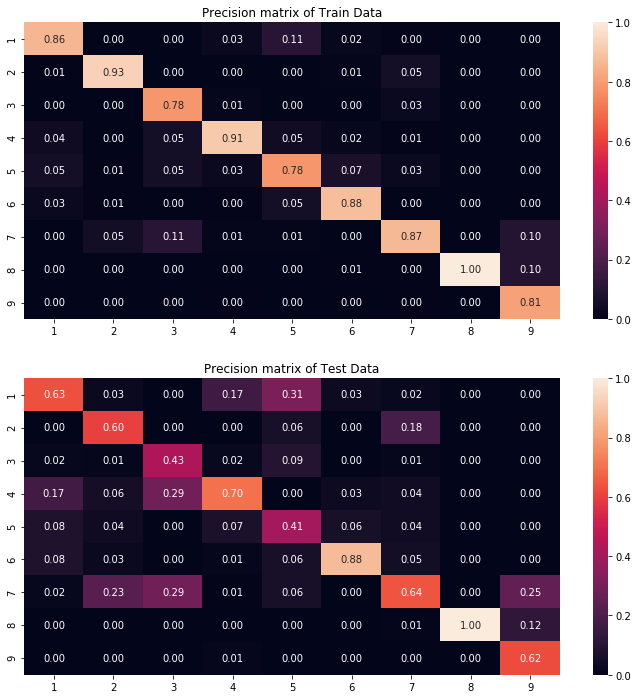

In [387]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

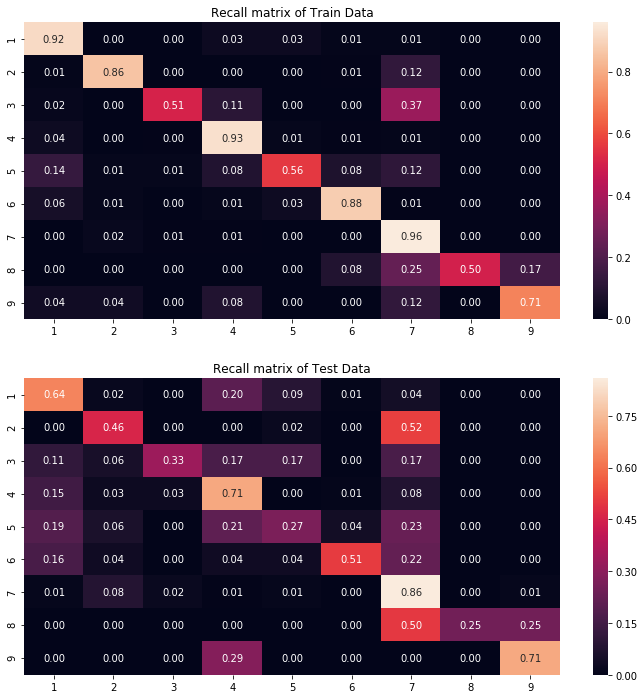

In [388]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

####  Feature Importance

In [389]:
classes = model.classes_

In [390]:
classes

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [391]:
fi = model.coef_

In [392]:
fi.shape

(9, 41653)

In [393]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 93328.39it/s]


In [394]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.3548872180451128


In [395]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0


for i in range(9):
    
    label =np.argsort(fi[i])[::-1][:10]
    
    print("-"*30+"Class {} important features".format(i+1)+"-"*30)
    
    for j in range(10):
        
        if label[j] < 230:
            
            print("Gene feature = {}".format(model_gene.get_feature_names()[label[j]]))
            
            gene_count +=1
            
        elif label[j] >= 230 and label[j] < 1961+230:
            
            print("Variation feature = {}".format(model_var.get_feature_names()[label[j] - 230]))
            
            var_count +=1
            
        else:
            
            print("Text feature = {}".format(model_text.get_feature_names()[label[j] - (1961+230)]))
            
            text_count +=1

------------------------------Class 1 important features------------------------------
Variation feature = truncating
Variation feature = mutations
Variation feature = deletion
Gene feature = tp53
Gene feature = smad2
Gene feature = ercc2
Gene feature = ptprt
Gene feature = cdh1
Variation feature = h1686r
Variation feature = t1691i
------------------------------Class 2 important features------------------------------
Variation feature = fusions
Gene feature = hras
Gene feature = abl1
Gene feature = ros1
Variation feature = amplification
Gene feature = kit
Gene feature = ret
Variation feature = q79r
Gene feature = epas1
Variation feature = g13v
------------------------------Class 3 important features------------------------------
Variation feature = v369g
Variation feature = a121v
Variation feature = i18v
Variation feature = g334r
Variation feature = r462i
Variation feature = q59e
Variation feature = a19v
Variation feature = i834v
Variation feature = h570r
Variation feature = s1651f
---

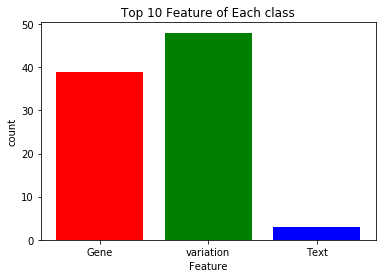

In [396]:
# How many times Each class top 10 features present,Count is belongs to which feature has present most times in top 10 features of Each class.

plt.close()
plt.bar(["Gene","variation","Text"],[gene_count,var_count,text_count],color='rgb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 10 Feature of Each class")
plt.show()

### 6.4 Linear SVM (without class balancing):

In [397]:
train_loss=[]
cv_loss =[]

for i in tqdm(alpha):
    
    model = SGDClassifier(alpha=i,loss="hinge",penalty="l2",n_jobs=-1,random_state=42)
    model.fit(train_tfidf,y_train)
    clf = CalibratedClassifierCV(model,method="sigmoid")
    clf.fit(train_tfidf,y_train)
    
    train_proba = clf.predict_proba(train_tfidf)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    cv_proba = clf.predict_proba(cv_tfidf)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 11/11 [00:38<00:00,  3.72s/it]


In [398]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 1e-05 ---> trainl loss = 0.936 and test loss = 1.226
alpha = 0.0001 ---> trainl loss = 0.93 and test loss = 1.236
alpha = 0.001 ---> trainl loss = 0.748 and test loss = 1.156
alpha = 0.01 ---> trainl loss = 0.693 and test loss = 1.116
alpha = 0.1 ---> trainl loss = 0.988 and test loss = 1.28
alpha = 1 ---> trainl loss = 1.317 and test loss = 1.504
alpha = 10 ---> trainl loss = 1.317 and test loss = 1.504
alpha = 100 ---> trainl loss = 1.317 and test loss = 1.504
alpha = 1000 ---> trainl loss = 1.317 and test loss = 1.504
alpha = 10000 ---> trainl loss = 1.317 and test loss = 1.507
alpha = 100000 ---> trainl loss = 1.345 and test loss = 1.651
best aplha ---> 0.01


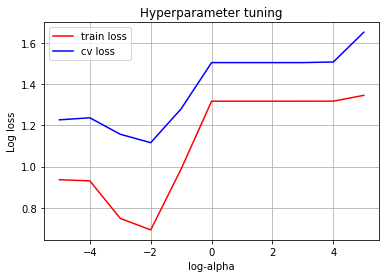

In [399]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.grid()
plt.legend()
plt.show()

##### Observation:

The best hyperparameter alpha = 0.01

In [400]:
# Best Hyperparameter

model = SGDClassifier(alpha=0.01,loss="hinge",penalty="l2",n_jobs=-1,random_state=42)
model.fit(train_tfidf,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_tfidf,y_train)
    
train_proba = clf.predict_proba(train_tfidf)
train_ll = log_loss(y_train,train_proba)
    
cv_proba = clf.predict_proba(cv_tfidf)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_tfidf)
test_ll = log_loss(y_test,test_proba)

In [401]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.6925438021568285
------------------------------cv loss------------------------------
1.1156249291226155
------------------------------test loss------------------------------
1.0949570993810722


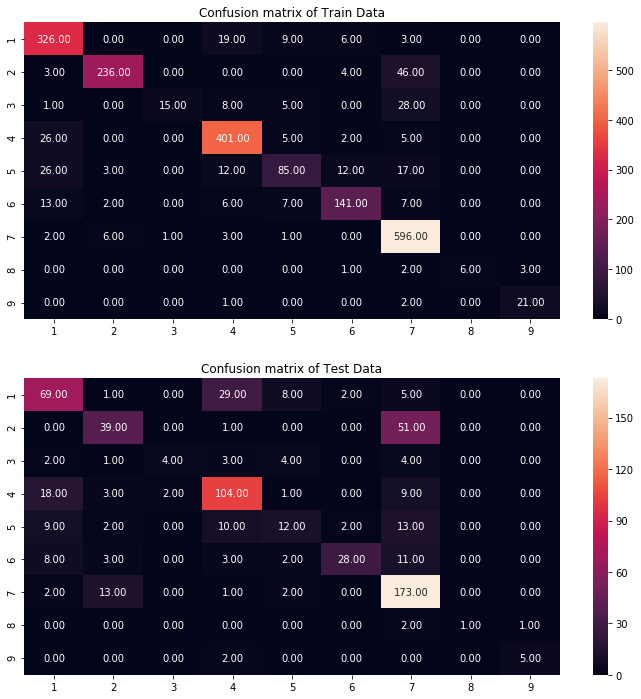

In [402]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

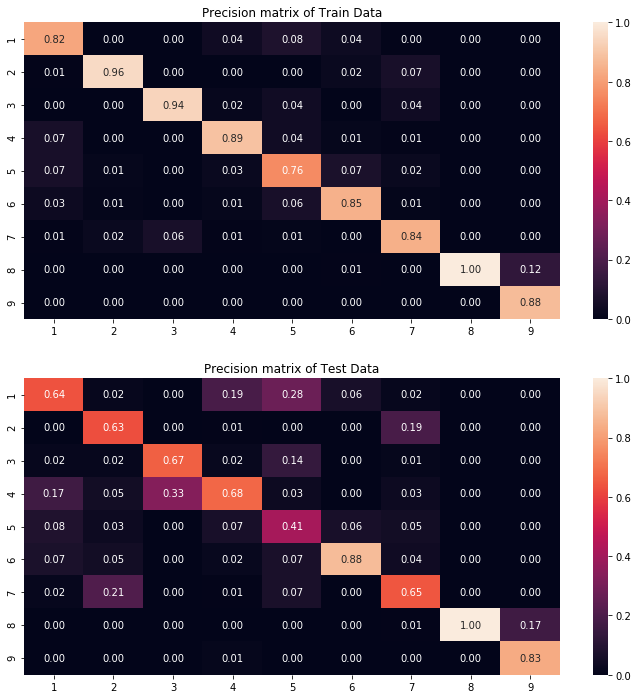

In [403]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

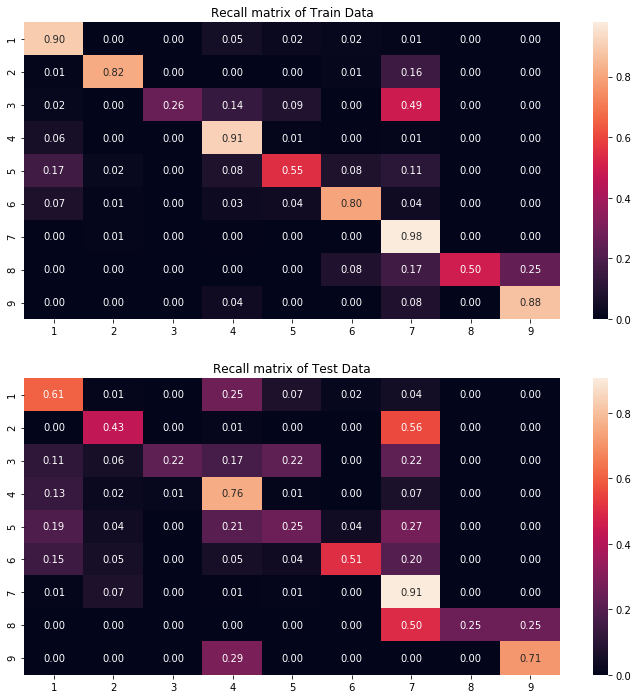

In [404]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

#### Feature Importance

In [405]:
classes = model.classes_

In [406]:
classes

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [407]:
fi = model.coef_

In [408]:
fi.shape

(9, 41653)

In [409]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 120458.31it/s]


In [410]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.3458646616541353


In [411]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0


for i in range(9):
    
    label =np.argsort(fi[i])[::-1][:10]
    
    print("-"*30+"Class {} important features".format(i+1)+"-"*30)
    
    for j in range(10):
        
        if label[j] < 230:
            
            print("Gene feature = {}".format(model_gene.get_feature_names()[label[j]]))
            
            gene_count +=1
            
        elif label[j] >= 230 and label[j] < 1961+230:
            
            print("Variation feature = {}".format(model_var.get_feature_names()[label[j] - 230]))
            
            var_count +=1
            
        else:
            
            print("Text feature = {}".format(model_text.get_feature_names()[label[j] - (1961+230)]))
            
            text_count +=1

------------------------------Class 1 important features------------------------------
Variation feature = truncating
Variation feature = mutations
Variation feature = deletion
Gene feature = tp53
Gene feature = ercc2
Gene feature = smad2
Gene feature = ptprt
Gene feature = cdh1
Gene feature = foxa1
Text feature = pcp
------------------------------Class 2 important features------------------------------
Variation feature = fusions
Gene feature = abl1
Gene feature = hras
Gene feature = ros1
Gene feature = ret
Gene feature = epas1
Gene feature = kit
Variation feature = amplification
Gene feature = pdgfrb
Text feature = uncommon
------------------------------Class 3 important features------------------------------
Gene feature = tmprss2
Text feature = bph
Text feature = nonaggress
Text feature = orchiectomi
Text feature = kallikrein
Text feature = nes1
Text feature = ranger
Text feature = overdiagnosi
Text feature = scaveng
Text feature = takata
------------------------------Class 4 impor

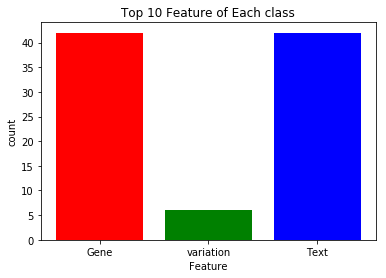

In [412]:
# How many times Each class top 10 features present,Count is belongs to which feature has present most times in top 10 features of Each class.

plt.close()
plt.bar(["Gene","variation","Text"],[gene_count,var_count,text_count],color='rgb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 10 Feature of Each class")
plt.show()

### 6.5 Linear SVM (with class balancing):

In [413]:
train_loss=[]
cv_loss =[]

for i in tqdm(alpha):
    
    model = SGDClassifier(alpha=i,loss="hinge",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
    model.fit(train_tfidf,y_train)
    clf = CalibratedClassifierCV(model,method="sigmoid")
    clf.fit(train_tfidf,y_train)
    
    train_proba = clf.predict_proba(train_tfidf)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    cv_proba = clf.predict_proba(cv_tfidf)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 11/11 [00:38<00:00,  3.83s/it]


In [414]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 1e-05 ---> trainl loss = 1.022 and test loss = 1.318
alpha = 0.0001 ---> trainl loss = 0.996 and test loss = 1.305
alpha = 0.001 ---> trainl loss = 0.785 and test loss = 1.148
alpha = 0.01 ---> trainl loss = 0.746 and test loss = 1.11
alpha = 0.1 ---> trainl loss = 1.067 and test loss = 1.31
alpha = 1 ---> trainl loss = 1.378 and test loss = 1.465
alpha = 10 ---> trainl loss = 1.378 and test loss = 1.465
alpha = 100 ---> trainl loss = 1.378 and test loss = 1.465
alpha = 1000 ---> trainl loss = 1.378 and test loss = 1.465
alpha = 10000 ---> trainl loss = 1.377 and test loss = 1.46
alpha = 100000 ---> trainl loss = 1.398 and test loss = 1.529
best aplha ---> 0.01


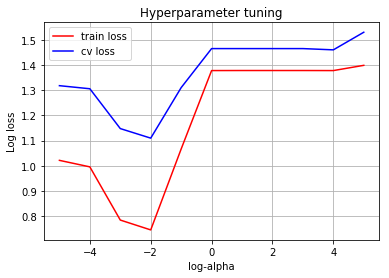

In [415]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.grid()
plt.legend()
plt.show()

##### Observation:

The best hyperparameter alpha = 0.01

In [416]:
# Best Hyperparameter

model = SGDClassifier(alpha=0.01,loss="hinge",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
model.fit(train_tfidf,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_tfidf,y_train)
    
train_proba = clf.predict_proba(train_tfidf)
train_ll = log_loss(y_train,train_proba)
    
cv_proba = clf.predict_proba(cv_tfidf)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_tfidf)
test_ll = log_loss(y_test,test_proba)

In [417]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.7457252762522296
------------------------------cv loss------------------------------
1.109613042006067
------------------------------test loss------------------------------
1.0908752542228104


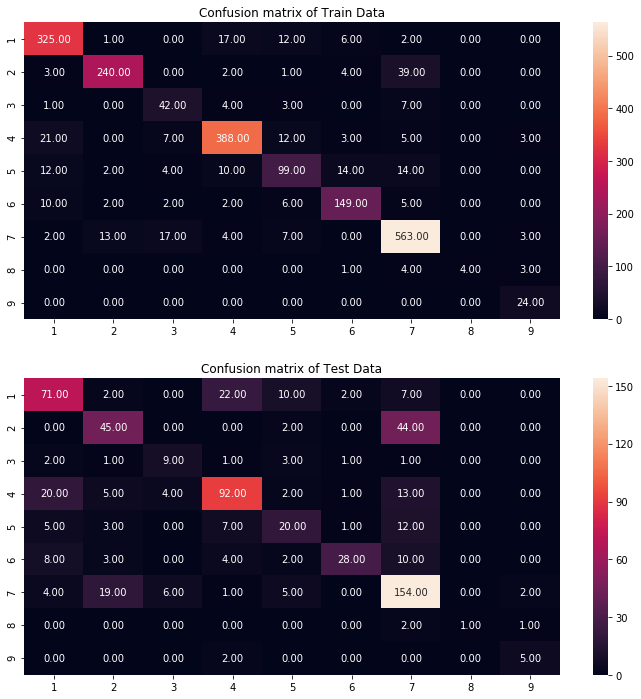

In [418]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

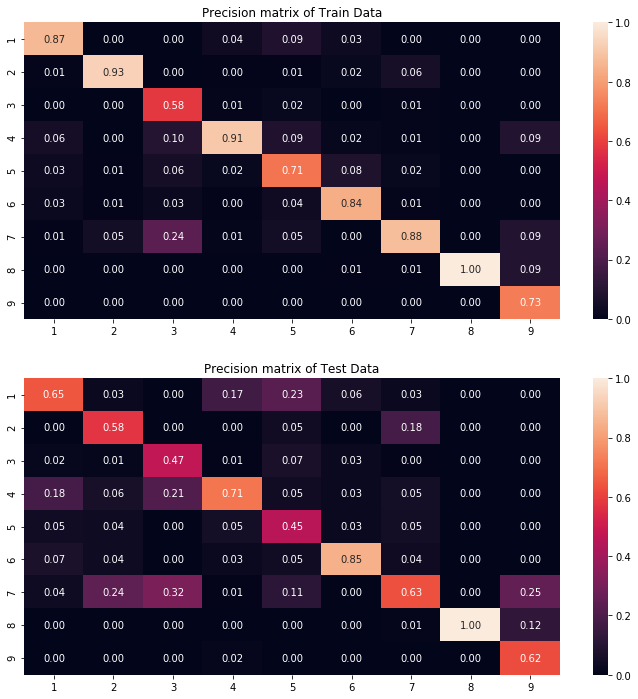

In [419]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

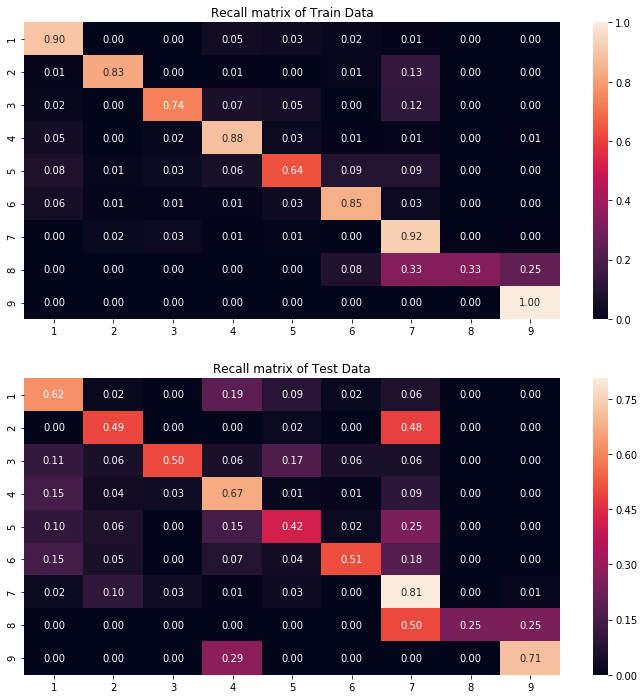

In [420]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

#### Feature Importance

In [421]:
classes = model.classes_

In [422]:
classes

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [423]:
fi = model.coef_

In [424]:
fi.shape

(9, 41653)

In [425]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 202704.37it/s]


In [426]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.3609022556390977


In [427]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0


for i in range(9):
    
    label =np.argsort(fi[i])[::-1][:10]
    
    print("-"*30+"Class {} important features".format(i+1)+"-"*30)
    
    for j in range(10):
        
        if label[j] < 230:
            
            print("Gene feature = {}".format(model_gene.get_feature_names()[label[j]]))
            
            gene_count +=1
            
        elif label[j] >= 230 and label[j] < 1961+230:
            
            print("Variation feature = {}".format(model_var.get_feature_names()[label[j] - 230]))
            
            var_count +=1
            
        else:
            
            print("Text feature = {}".format(model_text.get_feature_names()[label[j] - (1961+230)]))
            
            text_count +=1

------------------------------Class 1 important features------------------------------
Variation feature = truncating
Variation feature = mutations
Variation feature = deletion
Gene feature = ercc2
Gene feature = tp53
Gene feature = ptprt
Gene feature = cdh1
Text feature = homophil
Text feature = pcp
Text feature = sk18
------------------------------Class 2 important features------------------------------
Variation feature = fusions
Gene feature = abl1
Gene feature = ros1
Gene feature = hras
Gene feature = epas1
Gene feature = kit
Gene feature = ret
Variation feature = amplification
Text feature = uncommon
Gene feature = pdgfrb
------------------------------Class 3 important features------------------------------
Variation feature = s1651f
Variation feature = c628y
Variation feature = r462i
Variation feature = k830r
Variation feature = a121v
Variation feature = i834v
Variation feature = h570r
Variation feature = i18v
Variation feature = v369g
Variation feature = v534e
-----------------

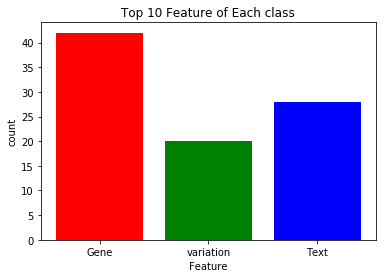

In [428]:
# How many times Each class top 10 features present,Count is belongs to which feature has present most times in top 10 features of Each class.

plt.close()
plt.bar(["Gene","variation","Text"],[gene_count,var_count,text_count],color='rgb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 10 Feature of Each class")
plt.show()

### 6.6 Random Forest Model

In [431]:
# Random forest Model 
tree = [100,200,500,1000,2000]
depth  =[5,6,8,10]

train_loss =[]
cv_loss =[]

for i in tqdm(depth):
    
    for j in tree:
        
        model = RandomForestClassifier(max_depth=i,n_estimators=j,random_state=42,n_jobs=-1)
        model.fit(train_tfidf,y_train)
        clf = CalibratedClassifierCV(model,method="sigmoid")
        clf.fit(train_tfidf,y_train)
        
        train_proba = clf.predict_proba(train_tfidf)
        train_ll = log_loss(y_train,train_proba)
        train_loss.append(train_ll)
        
        cv_proba = clf.predict_proba(cv_tfidf)
        cv_ll = log_loss(y_cv,cv_proba)
        cv_loss.append(cv_ll)

100%|██████████| 4/4 [24:35<00:00, 373.35s/it]


In [432]:
best_alpha = np.argmin(cv_loss)

In [434]:
best_alpha

19

In [433]:
for u in depth:
    for i,j,k in zip(train_loss,cv_loss,tree):
        print("depth= {},n_estimaters = {} ---> trainl loss = {} and test loss = {}".format(u,k,round(i,5),round(j,5)))

depth= 5,n_estimaters = 100 ---> trainl loss = 0.995 and test loss = 1.24463
depth= 5,n_estimaters = 200 ---> trainl loss = 0.99278 and test loss = 1.23325
depth= 5,n_estimaters = 500 ---> trainl loss = 0.97595 and test loss = 1.21863
depth= 5,n_estimaters = 1000 ---> trainl loss = 0.96983 and test loss = 1.21696
depth= 5,n_estimaters = 2000 ---> trainl loss = 0.96768 and test loss = 1.21322
depth= 6,n_estimaters = 100 ---> trainl loss = 0.995 and test loss = 1.24463
depth= 6,n_estimaters = 200 ---> trainl loss = 0.99278 and test loss = 1.23325
depth= 6,n_estimaters = 500 ---> trainl loss = 0.97595 and test loss = 1.21863
depth= 6,n_estimaters = 1000 ---> trainl loss = 0.96983 and test loss = 1.21696
depth= 6,n_estimaters = 2000 ---> trainl loss = 0.96768 and test loss = 1.21322
depth= 8,n_estimaters = 100 ---> trainl loss = 0.995 and test loss = 1.24463
depth= 8,n_estimaters = 200 ---> trainl loss = 0.99278 and test loss = 1.23325
depth= 8,n_estimaters = 500 ---> trainl loss = 0.97595

In [435]:
model = RandomForestClassifier(max_depth=10,n_estimators=2000,random_state=12,n_jobs=-1)
model.fit(train_tfidf,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_tfidf,y_train)
        
train_proba = clf.predict_proba(train_tfidf)
train_ll = log_loss(y_train,train_proba)

cv_proba = clf.predict_proba(cv_tfidf)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_tfidf)
test_ll = log_loss(y_test,test_proba)

In [436]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.6531133855566784
------------------------------cv loss------------------------------
1.1604736330838883
------------------------------test loss------------------------------
1.1690611960754063


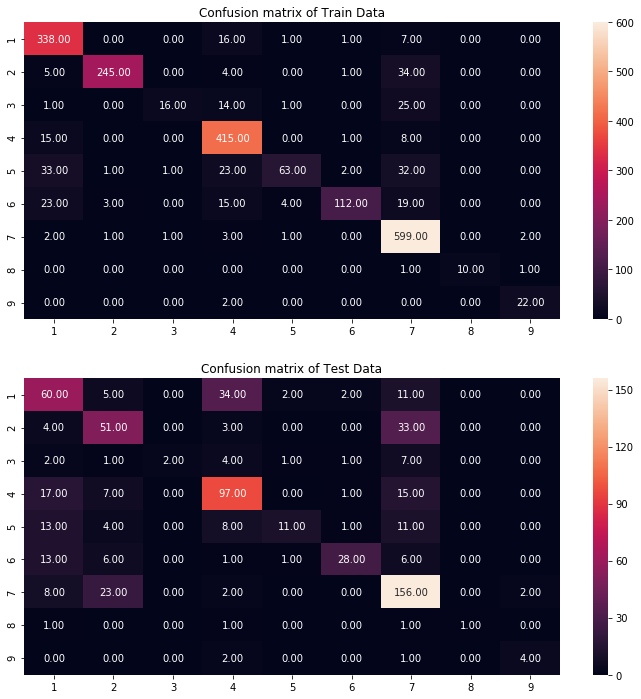

In [437]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

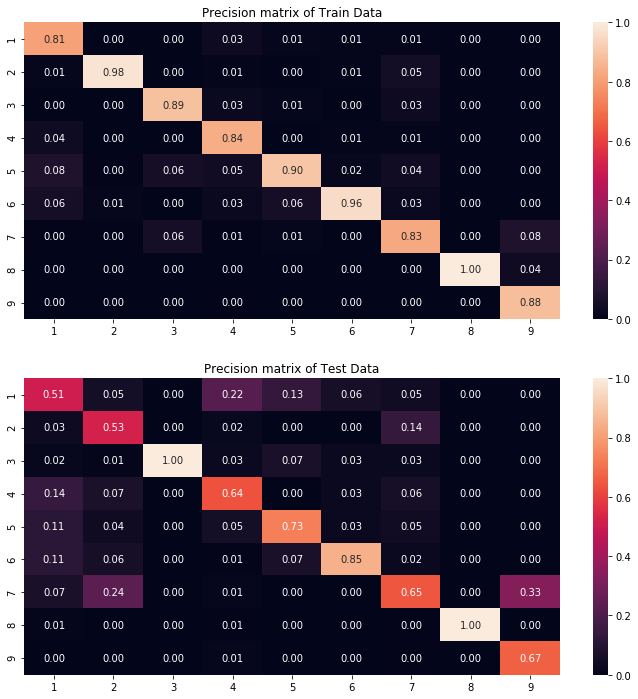

In [438]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

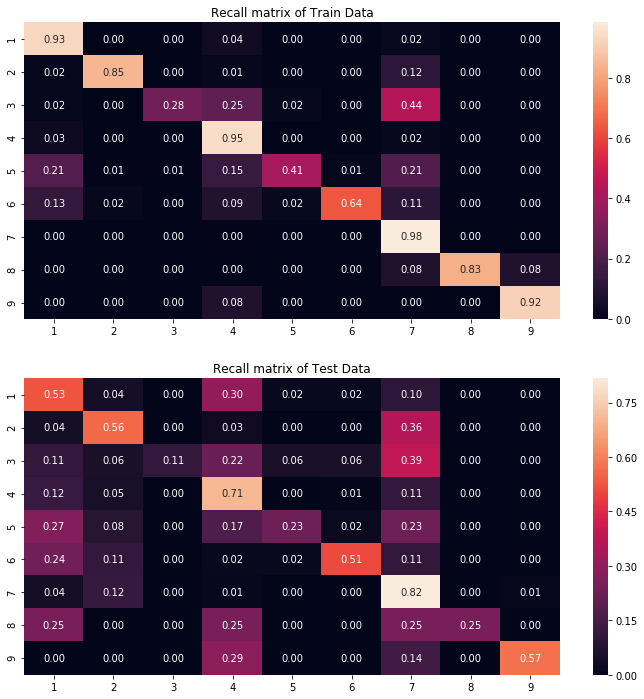

In [439]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

#### Feature Importance

In [440]:
fi =model.feature_importances_

In [441]:
fi.shape

(41653,)

In [442]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 99832.21it/s]


In [443]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.38345864661654133


In [444]:
label =np.argsort(fi)[::-1][:20]

In [445]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0

print("-"*30+"Top 20 Features"+"-"*30)
    
for j in range(20):
        
    if label[j] < 230:
            
        print("Gene feature = {}".format(model_gene.get_feature_names()[label[j]]))
            
        gene_count +=1
            
    elif label[j] >= 230 and label[j] < 1961+230:
            
        print("Variation feature = {}".format(model_var.get_feature_names()[label[j] - 230]))
            
        var_count +=1
            
    else:
            
        print("Text feature = {}".format(model_text.get_feature_names()[label[j] - (1961+230)]))
            
        text_count +=1

------------------------------Top 20 Features------------------------------
Text feature = kinas
Text feature = inhibitor
Text feature = tyrosin
Text feature = suppressor
Text feature = oncogen
Text feature = receptor
Text feature = function
Text feature = phosphoryl
Text feature = growth
Text feature = loss
Text feature = nonsens
Text feature = signal
Text feature = constitut
Text feature = activ
Text feature = erk
Text feature = treatment
Text feature = therapi
Text feature = inhibit
Text feature = missens
Text feature = respond


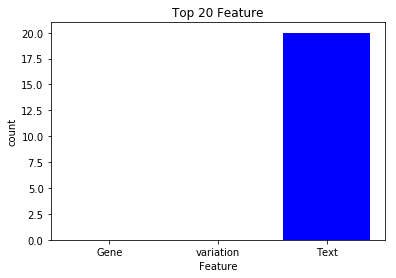

In [446]:
# How many times Each class top 20 features present,Count is belongs to which feature has present most times in top 20 features of Each class.

plt.close()
plt.bar(["Gene","variation","Text"],[gene_count,var_count,text_count],color='rgb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 20 Feature")
plt.show()

### 6.7 Stacking Classifier 

In [552]:
# Naive Bayes

m1 = MultinomialNB(alpha=1)
m1.fit(train_tfidf,y_train)
clf1 = CalibratedClassifierCV (m1,method="sigmoid")
clf1.fit(train_tfidf,y_train)

# Logistic Regression

m2 = SGDClassifier(alpha=0.001,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
m2.fit(train_tfidf,y_train)
clf2 = CalibratedClassifierCV(m2,method="sigmoid")
clf2.fit(train_tfidf,y_train)

# Linear SVM

m3 = SGDClassifier(alpha=0.01,loss="hinge",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
m3.fit(train_tfidf,y_train)
clf3 = CalibratedClassifierCV(m3,method="sigmoid")
clf3.fit(train_tfidf,y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.01, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
            cv='warn', method='sigmoid')

In [553]:
# Meta classifier (Logistic regression)

alpha =[0.0001,0.001,0.01,0.1,1,10,100,1000]

In [554]:
log_alpha=[]
for i in alpha:
    log_alpha.append(math.log10(i))
log_alpha

[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0]

In [555]:
train_loss = []
cv_loss =[]

for i in tqdm(alpha):
    
    lr = SGDClassifier(alpha=i,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
    clr = CalibratedClassifierCV(lr,method="sigmoid")
    sclf = StackingClassifier(classifiers=[clf1,clf2,clf3],meta_classifier=clr,use_probas=True)
    sclf.fit(train_tfidf,y_train)
    
    # predict_train
    
    train_proba = sclf.predict_proba(train_tfidf)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    # Cv data prediction
    
    cv_proba = sclf.predict_proba(cv_tfidf)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 8/8 [01:17<00:00,  9.60s/it]


In [556]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 0.0001 ---> trainl loss = 0.292 and test loss = 1.248
alpha = 0.001 ---> trainl loss = 0.348 and test loss = 1.204
alpha = 0.01 ---> trainl loss = 0.389 and test loss = 1.192
alpha = 0.1 ---> trainl loss = 0.402 and test loss = 1.186
alpha = 1 ---> trainl loss = 0.45 and test loss = 1.261
alpha = 10 ---> trainl loss = 0.607 and test loss = 1.38
alpha = 100 ---> trainl loss = 0.661 and test loss = 1.37
alpha = 1000 ---> trainl loss = 0.675 and test loss = 1.364
best aplha ---> 0.1


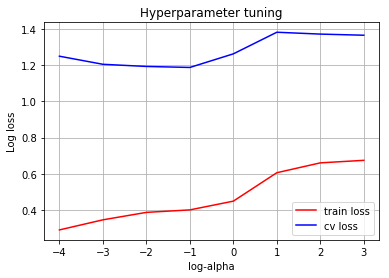

In [557]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.legend()
plt.grid()
plt.show()

In [558]:
lr = SGDClassifier(alpha=0.1,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
clr = CalibratedClassifierCV(lr,method="sigmoid")
sclf = StackingClassifier(classifiers=[clf1,clf2,clf3],meta_classifier=clr,use_probas=True)
sclf.fit(train_tfidf,y_train)
    
# predict_train
    
train_proba = sclf.predict_proba(train_tfidf)
train_ll = log_loss(y_train,train_proba)

# Cv data prediction
    
cv_proba = sclf.predict_proba(cv_tfidf)
cv_ll = log_loss(y_cv,cv_proba)

# test data

test_proba = sclf.predict_proba(test_tfidf)
test_ll = log_loss (y_test,test_proba)


In [559]:
print("train log-loss")
print("="*100)
print(train_ll)
print("cv log-loss")
print("="*100)
print(cv_ll)
print("test log-loss")
print("="*100)
print(test_ll)

train log-loss
0.4022879684008652
cv log-loss
1.1864983485938914
test log-loss
1.2100469856919183


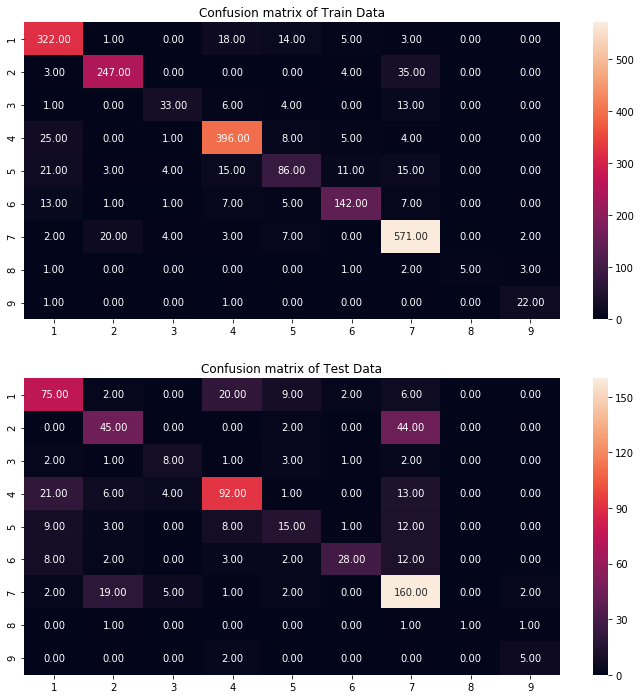

In [560]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

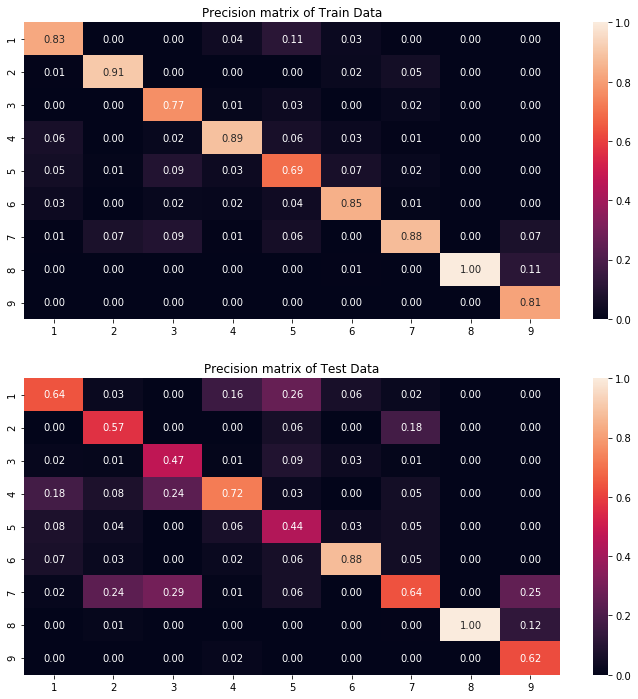

In [561]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

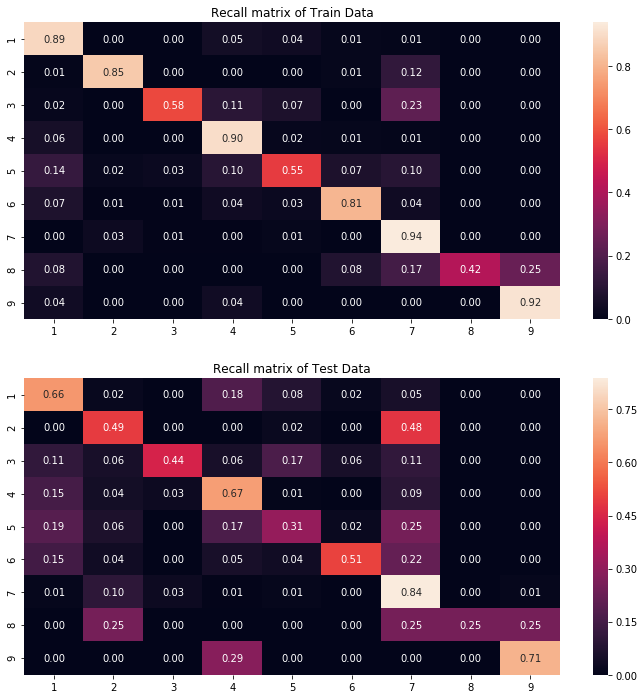

In [562]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

In [563]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 182731.40it/s]


In [564]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.3548872180451128


## 7. Response coding on ML models

In [164]:
# Response vector

# Stacking 

# training data

train_1 = np.hstack([train_vec_gene,train_vec_var])
train_rc = np.hstack([train_1,train_vec_text])

# Cv data

cv_1 = np.hstack([cv_vec_gene,cv_vec_var])
cv_rc = np.hstack([cv_1,cv_vec_text])

# Test data

test_1 = np.hstack([test_vec_gene,test_vec_var])
test_rc = np.hstack([test_1,test_vec_text])

In [165]:
print("-"*30+"Response coding vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_rc.shape)
print("cv vector shape")
print("="*100)
print(cv_rc.shape)
print("test vector shape")
print("="*100)
print(test_rc.shape)

------------------------------Response coding vector------------------------------
 
train vector shape
(2124, 27)
cv vector shape
(532, 27)
test vector shape
(665, 27)


### 7.1 K-NN model:

In [167]:
# References
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
alpha=[1,3,5,7,9,11,13,15,17,19,21]

In [173]:
train_loss=[]
cv_loss =[]

for i in tqdm(alpha):
    
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_rc,y_train)
    clf = CalibratedClassifierCV(model,method="sigmoid")
    clf.fit(train_rc,y_train)
    
    train_proba = clf.predict_proba(train_rc)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    cv_proba = clf.predict_proba(cv_rc)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 11/11 [00:05<00:00,  1.69it/s]


In [177]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("k = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best k ---> {}".format(alpha[best_alpha]))

k = 1 ---> trainl loss = 0.244 and test loss = 1.267
k = 3 ---> trainl loss = 0.379 and test loss = 1.116
k = 5 ---> trainl loss = 0.481 and test loss = 1.087
k = 7 ---> trainl loss = 0.531 and test loss = 1.074
k = 9 ---> trainl loss = 0.58 and test loss = 1.082
k = 11 ---> trainl loss = 0.618 and test loss = 1.081
k = 13 ---> trainl loss = 0.653 and test loss = 1.082
k = 15 ---> trainl loss = 0.684 and test loss = 1.088
k = 17 ---> trainl loss = 0.71 and test loss = 1.09
k = 19 ---> trainl loss = 0.73 and test loss = 1.091
k = 21 ---> trainl loss = 0.749 and test loss = 1.09
best k ---> 7


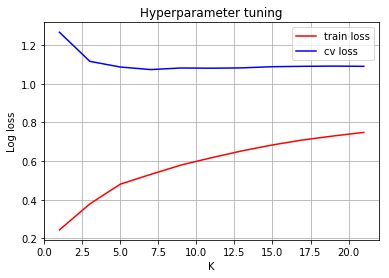

In [176]:
# Plotting 

plt.close()
plt.plot(alpha,train_loss,"r",label='train loss')
plt.plot(alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("K")
plt.ylabel("Log loss")
plt.grid()
plt.legend()
plt.show()

##### Observation:

The best hyperparameter k = 7

In [178]:
# Best Hyperparameter

model = KNeighborsClassifier(n_neighbors=7)
model.fit(train_rc,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_rc,y_train)
    
train_proba = clf.predict_proba(train_rc)
train_ll = log_loss(y_train,train_proba)
    
cv_proba = clf.predict_proba(cv_rc)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_rc)
test_ll = log_loss(y_test,test_proba)

In [179]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.5314625853688598
------------------------------cv loss------------------------------
1.073567616229106
------------------------------test loss------------------------------
1.0653004408803457


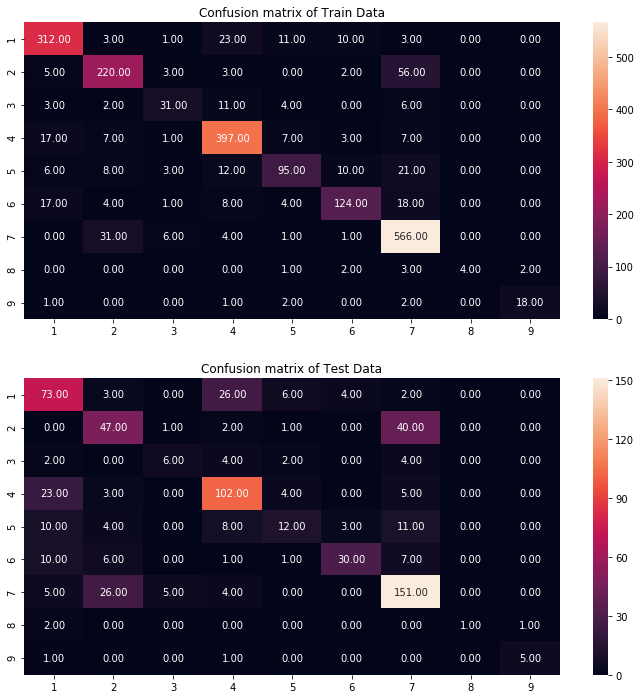

In [180]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

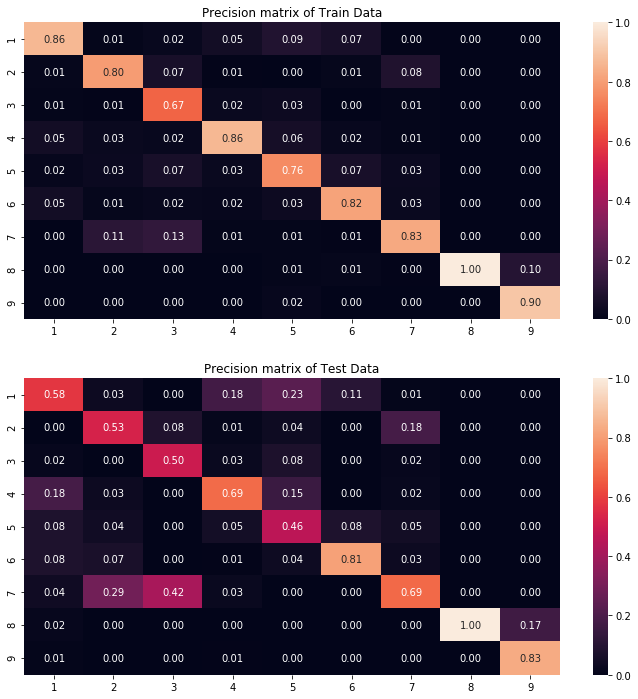

In [181]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

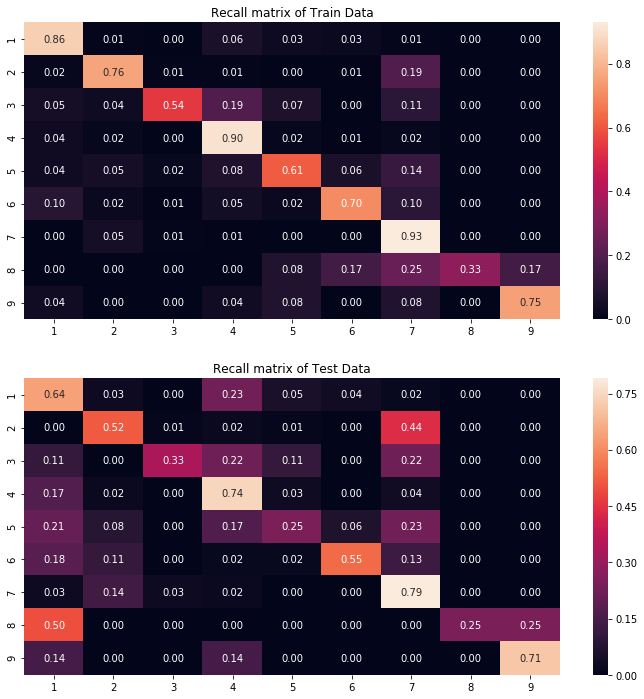

In [182]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

In [183]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 92859.21it/s]


In [184]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.35789473684210527


### 7.2 Random Forest

In [185]:
# Random forest Model 
tree = [100,200,500,1000,2000]
depth  =[5,6,8,10]

train_loss =[]
cv_loss =[]

for i in tqdm(depth):
    
    for j in tree:
        
        model = RandomForestClassifier(max_depth=i,n_estimators=j,random_state=42,n_jobs=-1)
        model.fit(train_rc,y_train)
        clf = CalibratedClassifierCV(model,method="sigmoid")
        clf.fit(train_rc,y_train)
        
        train_proba = clf.predict_proba(train_rc)
        train_ll = log_loss(y_train,train_proba)
        train_loss.append(train_ll)
        
        cv_proba = clf.predict_proba(cv_rc)
        cv_ll = log_loss(y_cv,cv_proba)
        cv_loss.append(cv_ll)

100%|██████████| 4/4 [03:46<00:00, 56.66s/it]


In [190]:
best_alpha = np.argmin(cv_loss)

In [191]:
best_alpha

8

In [192]:
for u in depth:
    for i,j,k in zip(train_loss,cv_loss,tree):
        print("depth= {},n_estimaters = {} ---> trainl loss = {} and test loss = {}".format(u,k,round(i,5),round(j,5)))

depth= 5,n_estimaters = 100 ---> trainl loss = 0.05953 and test loss = 1.33644
depth= 5,n_estimaters = 200 ---> trainl loss = 0.0569 and test loss = 1.34497
depth= 5,n_estimaters = 500 ---> trainl loss = 0.05552 and test loss = 1.34951
depth= 5,n_estimaters = 1000 ---> trainl loss = 0.05504 and test loss = 1.35625
depth= 5,n_estimaters = 2000 ---> trainl loss = 0.05459 and test loss = 1.36463
depth= 6,n_estimaters = 100 ---> trainl loss = 0.05953 and test loss = 1.33644
depth= 6,n_estimaters = 200 ---> trainl loss = 0.0569 and test loss = 1.34497
depth= 6,n_estimaters = 500 ---> trainl loss = 0.05552 and test loss = 1.34951
depth= 6,n_estimaters = 1000 ---> trainl loss = 0.05504 and test loss = 1.35625
depth= 6,n_estimaters = 2000 ---> trainl loss = 0.05459 and test loss = 1.36463
depth= 8,n_estimaters = 100 ---> trainl loss = 0.05953 and test loss = 1.33644
depth= 8,n_estimaters = 200 ---> trainl loss = 0.0569 and test loss = 1.34497
depth= 8,n_estimaters = 500 ---> trainl loss = 0.05

In [193]:
model = RandomForestClassifier(max_depth=6,n_estimators=1000,random_state=12,n_jobs=-1)
model.fit(train_rc,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_rc,y_train)
        
train_proba = clf.predict_proba(train_rc)
train_ll = log_loss(y_train,train_proba)

cv_proba = clf.predict_proba(cv_rc)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_rc)
test_ll = log_loss(y_test,test_proba)

In [194]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.0436549934601449
------------------------------cv loss------------------------------
1.297826480639574
------------------------------test loss------------------------------
1.27675111335818


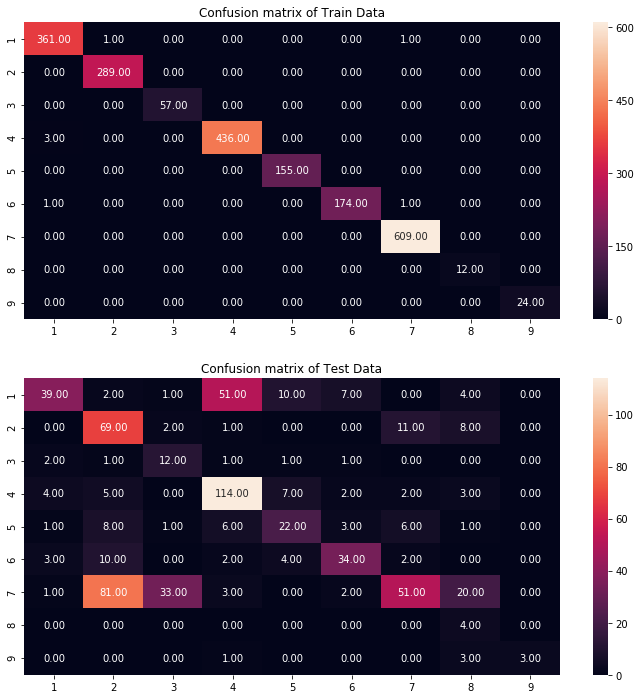

In [195]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

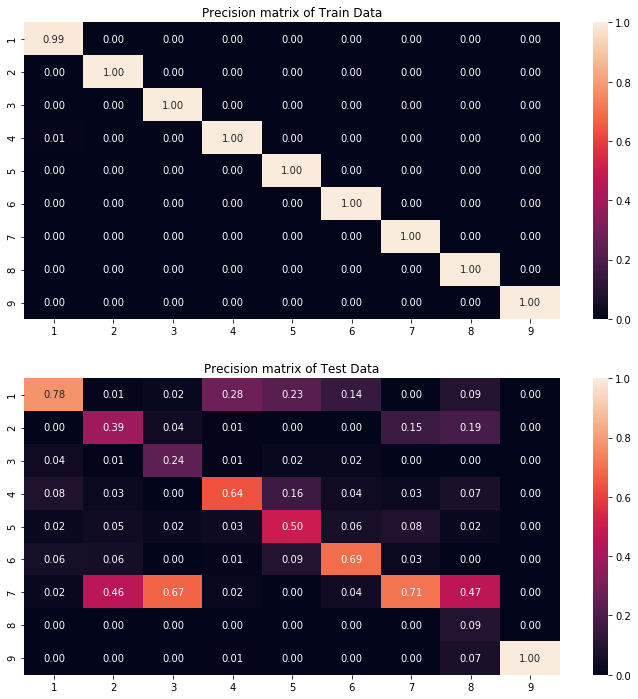

In [196]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

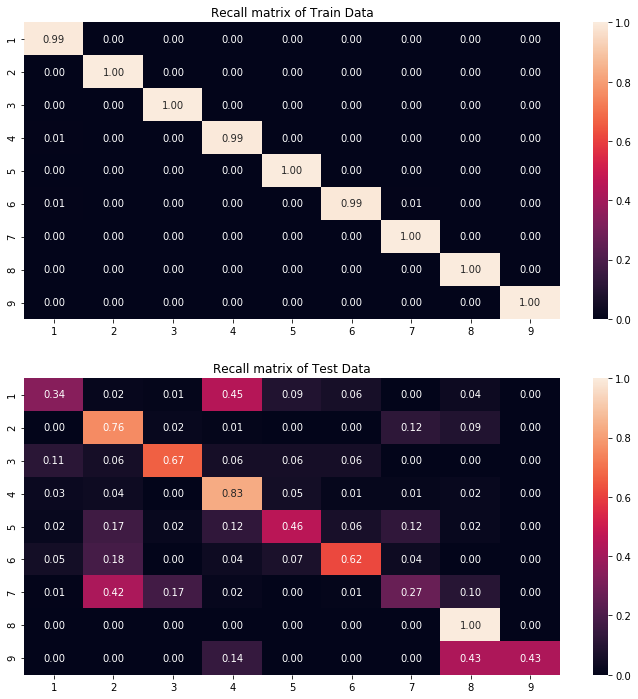

In [197]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

In [198]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 197774.39it/s]


In [199]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.4766917293233083


## 8. Bigrams Vectors on Logistic regression Model

### 8.1 BoW -( bi-gram) on Logistic regression

In [366]:
# Gene Feature

model_gene = CountVectorizer(ngram_range=(1,2))
train_gene_bi = model_gene.fit_transform(x_train.Gene)
cv_gene_bi = model_gene.transform(x_cv.Gene)
test_gene_bi = model_gene.transform(x_test.Gene)

In [369]:
print("-"*30+"Gene Feature Bow(bi-gram) vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_gene_bi.shape)
print("cv vector shape")
print("="*100)
print(cv_gene_bi.shape)
print("test vector shape")
print("="*100)
print(test_gene_bi.shape)

------------------------------Gene Feature Bow(bi-gram) vector------------------------------
 
train vector shape
(2124, 230)
cv vector shape
(532, 230)
test vector shape
(665, 230)


In [368]:
# Variation Feature 

model_var = CountVectorizer(ngram_range=(1,2))
train_var_bi = model_var.fit_transform(x_train.Variation)
cv_var_bi = model_var.transform(x_cv.Variation)
test_var_bi = model_var.transform(x_test.Variation)

In [370]:
print("-"*30+"Variation Feature boW(bi-gram) vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_var_bi.shape)
print("cv vector shape")
print("="*100)
print(cv_var_bi.shape)
print("test vector shape")
print("="*100)
print(test_var_bi.shape)

------------------------------Variation Feature boW(bi-gram) vector------------------------------
 
train vector shape
(2124, 2119)
cv vector shape
(532, 2119)
test vector shape
(665, 2119)


In [374]:
# Text Feature 

model_text = CountVectorizer(min_df=8,ngram_range=(1,2))
train_text_bi = model_text.fit_transform(x_train.TEXT)
cv_text_bi = model_text.transform(x_cv.TEXT)
test_text_bi = model_text.transform(x_test.TEXT)

In [375]:
# Normalizing

train_text_bi = normalize(train_text_bi,axis=0)
cv_text_bi = normalize(cv_text_bi,axis=0)
test_text_bi = normalize(test_text_bi,axis=0)

In [376]:
print("-"*30+"Text Feature bOw(bi-gram) vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_text_bi.shape)
print("cv vector shape")
print("="*100)
print(cv_text_bi.shape)
print("test vector shape")
print("="*100)
print(test_text_bi.shape)

------------------------------Text Feature bOw(bi-gram) vector------------------------------
 
train vector shape
(2124, 231658)
cv vector shape
(532, 231658)
test vector shape
(665, 231658)


In [377]:
# Stacking 

# training data

train_1 = ss.sparse.hstack([train_gene_bi,train_var_bi])
train_bi = ss.sparse.hstack([train_1,train_text_bi])

# Cv data

cv_1 = ss.sparse.hstack([cv_gene_bi,cv_var_bi])
cv_bi = ss.sparse.hstack([cv_1,cv_text_bi])

# Test data

test_1 = ss.sparse.hstack([test_gene_bi,test_var_bi])
test_bi = ss.sparse.hstack([test_1,test_text_bi])


In [378]:
print("-"*30+"BoW(Bi-gram) vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_bi.shape)
print("cv vector shape")
print("="*100)
print(cv_bi.shape)
print("test vector shape")
print("="*100)
print(test_bi.shape)

------------------------------BoW(Bi-gram) vector------------------------------
 
train vector shape
(2124, 234007)
cv vector shape
(532, 234007)
test vector shape
(665, 234007)


In [379]:
alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

In [380]:
log_alpha=[]
for i in alpha:
    log_alpha.append(math.log10(i))
log_alpha

[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]

In [381]:
train_loss=[]
cv_loss =[]

for i in tqdm(alpha):
    
    model = SGDClassifier(alpha=i,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
    model.fit(train_bi,y_train)
    clf = CalibratedClassifierCV(model,method="sigmoid")
    clf.fit(train_bi,y_train)
    
    train_proba = clf.predict_proba(train_bi)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    cv_proba = clf.predict_proba(cv_bi)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 9/9 [02:20<00:00, 15.38s/it]


In [382]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 0.0001 ---> trainl loss = 1.328 and test loss = 1.475
alpha = 0.001 ---> trainl loss = 1.07 and test loss = 1.291
alpha = 0.01 ---> trainl loss = 0.727 and test loss = 1.124
alpha = 0.1 ---> trainl loss = 1.025 and test loss = 1.25
alpha = 1 ---> trainl loss = 1.33 and test loss = 1.4
alpha = 10 ---> trainl loss = 1.413 and test loss = 1.454
alpha = 100 ---> trainl loss = 1.424 and test loss = 1.461
alpha = 1000 ---> trainl loss = 1.425 and test loss = 1.462
alpha = 10000 ---> trainl loss = 1.425 and test loss = 1.462
best aplha ---> 0.01


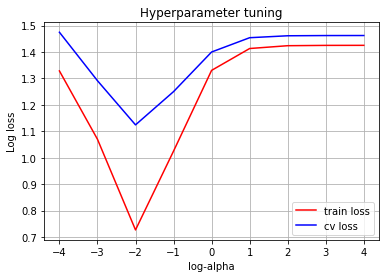

In [383]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.grid()
plt.legend()
plt.show()

##### Observation:

The best hyperparameter alpha = 0.01

In [385]:
# Best Hyperparameter

model = SGDClassifier(alpha=0.01,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
model.fit(train_bi,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_bi,y_train)
    
train_proba = clf.predict_proba(train_bi)
train_ll = log_loss(y_train,train_proba)
    
cv_proba = clf.predict_proba(cv_bi)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_bi)
test_ll = log_loss(y_test,test_proba)

In [386]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.7268022677813507
------------------------------cv loss------------------------------
1.1242438083953812
------------------------------test loss------------------------------
1.0882543804037295


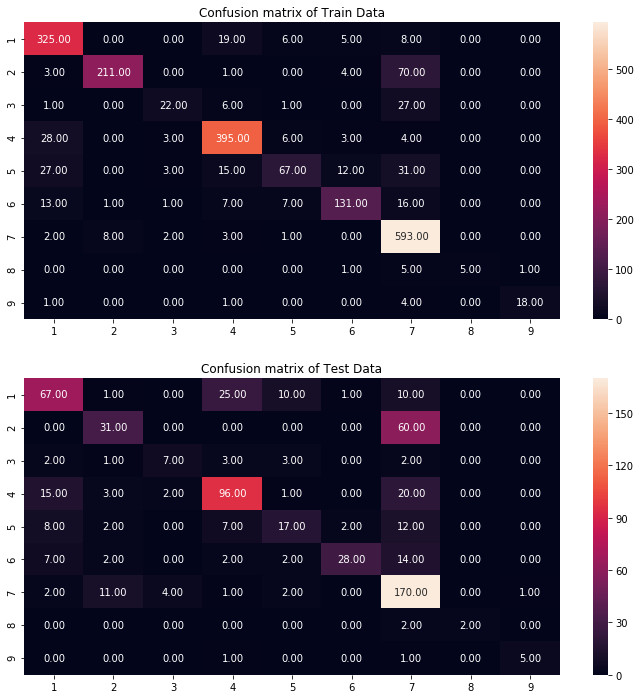

In [387]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

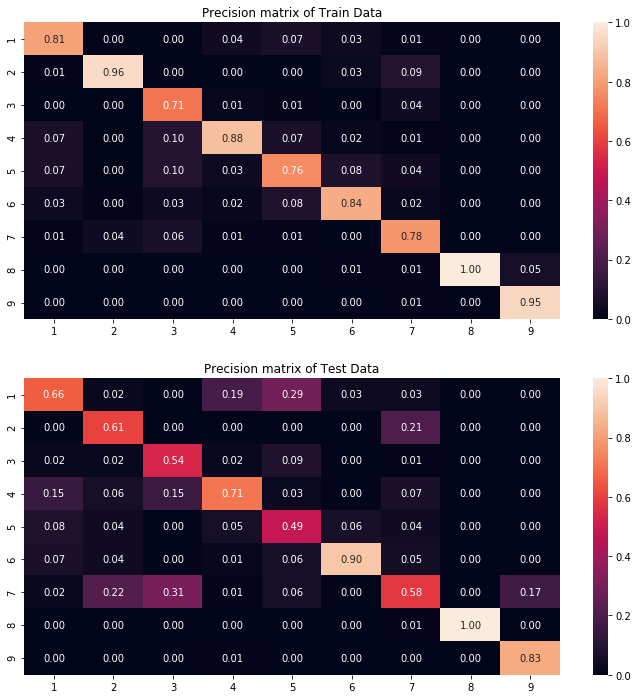

In [388]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

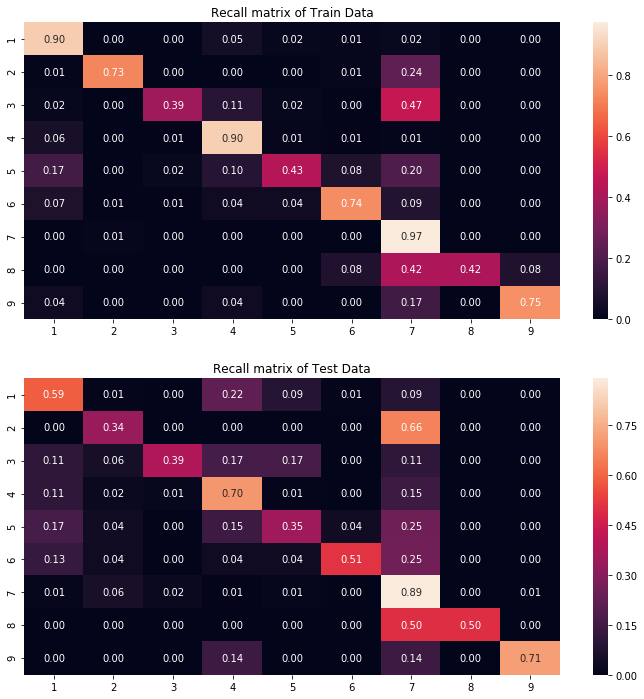

In [389]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

####  Feature Importance

In [390]:
classes = model.classes_

In [391]:
classes

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [392]:
fi = model.coef_

In [393]:
fi.shape

(9, 234007)

In [394]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 145059.92it/s]


In [395]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.36390977443609024


In [397]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0

for i in range(9):
    
    label =np.argsort(fi[i])[::-1][:10]
    
    print("-"*30+"Class {} important features".format(i+1)+"-"*30)
    
    for j in range(10):
        
        if label[j] < 230:
            
            print("Gene feature = {}".format(model_gene.get_feature_names()[label[j]]))
            
            gene_count +=1
            
        elif label[j] >= 230 and label[j] < 2119+230:
            
            print("Variation feature = {}".format(model_var.get_feature_names()[label[j] - 230]))
            
            var_count +=1
            
        else:
            
            print("Text feature = {}".format(model_text.get_feature_names()[label[j] - (2119+230)]))
            
            text_count +=1
            

------------------------------Class 1 important features------------------------------
Variation feature = truncating
Variation feature = truncating mutations
Variation feature = mutations
Variation feature = deletion
Gene feature = tp53
Gene feature = smad2
Gene feature = ercc2
Gene feature = cdh1
Gene feature = foxa1
Text feature = use mlpa
------------------------------Class 2 important features------------------------------
Variation feature = fusions
Variation feature = amplification
Gene feature = hras
Gene feature = kit
Gene feature = ros1
Gene feature = abl1
Variation feature = pdgfrb fusion
Variation feature = pdgfrb
Gene feature = ret
Gene feature = epas1
------------------------------Class 3 important features------------------------------
Variation feature = v369g
Variation feature = a121v
Variation feature = i18v
Variation feature = g334r
Variation feature = q59e
Variation feature = s1651f
Variation feature = i834v
Variation feature = r462i
Variation feature = h570r
Variat

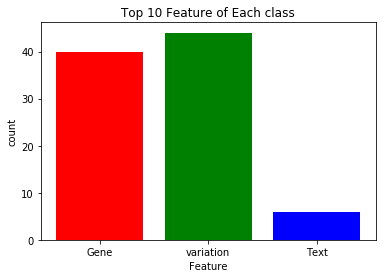

In [398]:
# How many times Each class top 10 features present,Count is belongs to which feature has present most times in top 10 features of Each class.
# FE = Feature Engineering Feature
plt.close()
plt.bar(["Gene","variation","Text"],[gene_count,var_count,text_count],color='rgb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 10 Feature of Each class")
plt.show()

### 8.2 Tfidf -( bi-gram) on Logistic regression

In [399]:
# Gene Feature

model_gene = TfidfVectorizer(ngram_range=(1,2))
train_gene_bi = model_gene.fit_transform(x_train.Gene)
cv_gene_bi = model_gene.transform(x_cv.Gene)
test_gene_bi = model_gene.transform(x_test.Gene)

In [400]:
print("-"*30+"Gene Feature Tfidf(bi-gram) vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_gene_bi.shape)
print("cv vector shape")
print("="*100)
print(cv_gene_bi.shape)
print("test vector shape")
print("="*100)
print(test_gene_bi.shape)

------------------------------Gene Feature Tfidf(bi-gram) vector------------------------------
 
train vector shape
(2124, 230)
cv vector shape
(532, 230)
test vector shape
(665, 230)


In [401]:
# Variation Feature 

model_var = TfidfVectorizer(ngram_range=(1,2))
train_var_bi = model_var.fit_transform(x_train.Variation)
cv_var_bi = model_var.transform(x_cv.Variation)
test_var_bi = model_var.transform(x_test.Variation)

In [402]:
print("-"*30+"Variation Feature Tfidf(bi-gram) vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_var_bi.shape)
print("cv vector shape")
print("="*100)
print(cv_var_bi.shape)
print("test vector shape")
print("="*100)
print(test_var_bi.shape)

------------------------------Variation Feature Tfidf(bi-gram) vector------------------------------
 
train vector shape
(2124, 2119)
cv vector shape
(532, 2119)
test vector shape
(665, 2119)


In [403]:
# Text Feature 

model_text = TfidfVectorizer(min_df=8,ngram_range=(1,2))
train_text_bi = model_text.fit_transform(x_train.TEXT)
cv_text_bi = model_text.transform(x_cv.TEXT)
test_text_bi = model_text.transform(x_test.TEXT)

In [404]:
# Normalizing

train_text_bi = normalize(train_text_bi,axis=0)
cv_text_bi = normalize(cv_text_bi,axis=0)
test_text_bi = normalize(test_text_bi,axis=0)

In [405]:
print("-"*30+"Text Feature tfidf(bi-gram) vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_text_bi.shape)
print("cv vector shape")
print("="*100)
print(cv_text_bi.shape)
print("test vector shape")
print("="*100)
print(test_text_bi.shape)

------------------------------Text Feature tfidf(bi-gram) vector------------------------------
 
train vector shape
(2124, 231658)
cv vector shape
(532, 231658)
test vector shape
(665, 231658)


In [406]:
# Stacking 

# training data

train_1 = ss.sparse.hstack([train_gene_bi,train_var_bi])
train_bi = ss.sparse.hstack([train_1,train_text_bi])

# Cv data

cv_1 = ss.sparse.hstack([cv_gene_bi,cv_var_bi])
cv_bi = ss.sparse.hstack([cv_1,cv_text_bi])

# Test data

test_1 = ss.sparse.hstack([test_gene_bi,test_var_bi])
test_bi = ss.sparse.hstack([test_1,test_text_bi])


In [407]:
print("-"*30+"BoW(Bi-gram) vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_bi.shape)
print("cv vector shape")
print("="*100)
print(cv_bi.shape)
print("test vector shape")
print("="*100)
print(test_bi.shape)

------------------------------BoW(Bi-gram) vector------------------------------
 
train vector shape
(2124, 234007)
cv vector shape
(532, 234007)
test vector shape
(665, 234007)


In [408]:
alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

In [409]:
log_alpha=[]
for i in alpha:
    log_alpha.append(math.log10(i))
log_alpha

[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]

In [410]:
train_loss=[]
cv_loss =[]

for i in tqdm(alpha):
    
    model = SGDClassifier(alpha=i,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
    model.fit(train_bi,y_train)
    clf = CalibratedClassifierCV(model,method="sigmoid")
    clf.fit(train_bi,y_train)
    
    train_proba = clf.predict_proba(train_bi)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    cv_proba = clf.predict_proba(cv_bi)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 9/9 [02:20<00:00, 15.38s/it]


In [411]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 0.0001 ---> trainl loss = 1.319 and test loss = 1.459
alpha = 0.001 ---> trainl loss = 1.062 and test loss = 1.255
alpha = 0.01 ---> trainl loss = 0.668 and test loss = 1.102
alpha = 0.1 ---> trainl loss = 0.889 and test loss = 1.202
alpha = 1 ---> trainl loss = 1.148 and test loss = 1.29
alpha = 10 ---> trainl loss = 1.215 and test loss = 1.321
alpha = 100 ---> trainl loss = 1.223 and test loss = 1.326
alpha = 1000 ---> trainl loss = 1.224 and test loss = 1.326
alpha = 10000 ---> trainl loss = 1.224 and test loss = 1.326
best aplha ---> 0.01


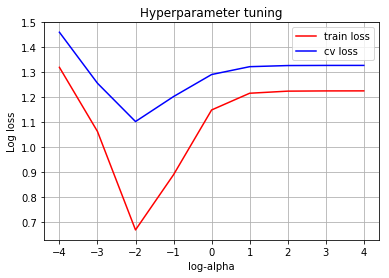

In [412]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.grid()
plt.legend()
plt.show()

##### Observation:

The best hyperparameter alpha = 0.01

In [413]:
# Best Hyperparameter

model = SGDClassifier(alpha=0.01,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
model.fit(train_bi,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_bi,y_train)
    
train_proba = clf.predict_proba(train_bi)
train_ll = log_loss(y_train,train_proba)
    
cv_proba = clf.predict_proba(cv_bi)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_bi)
test_ll = log_loss(y_test,test_proba)

In [414]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.6678280610132412
------------------------------cv loss------------------------------
1.1016449325388706
------------------------------test loss------------------------------
1.0649044293465506


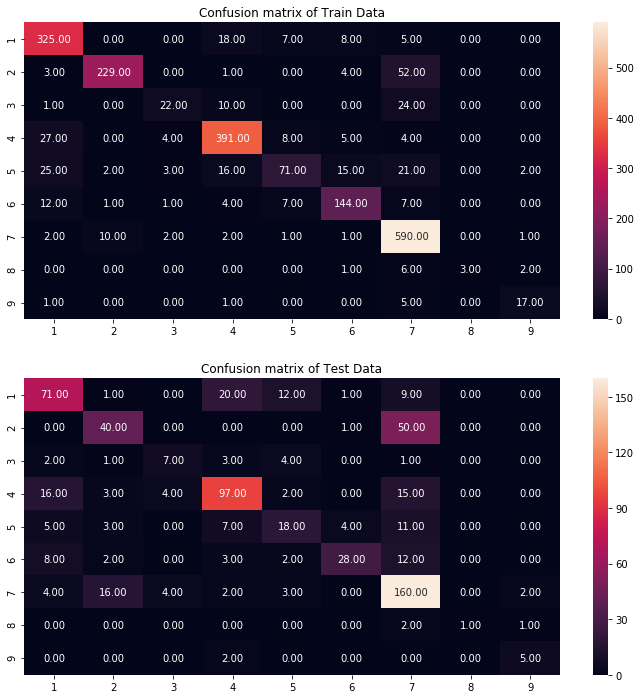

In [415]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

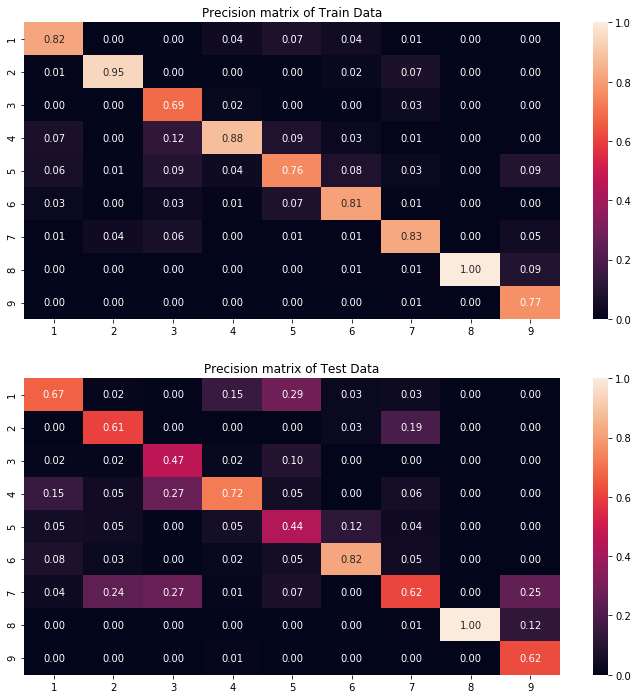

In [416]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

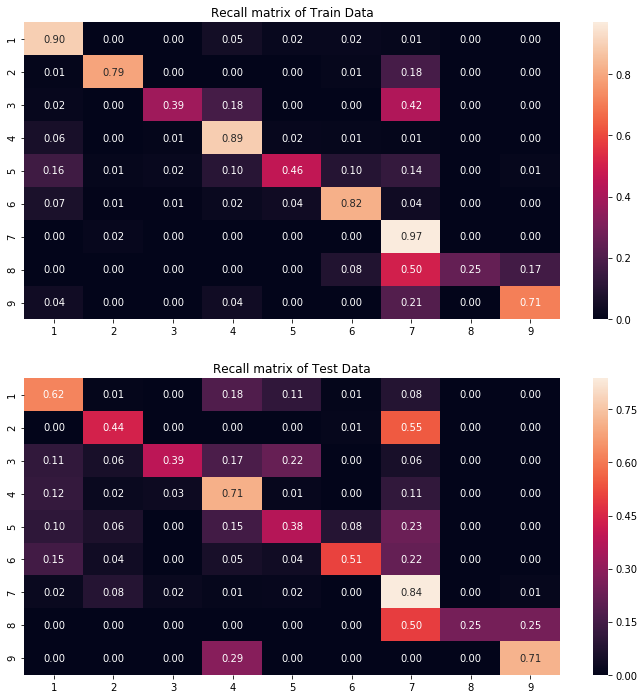

In [417]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

####  Feature Importance

In [418]:
classes = model.classes_

In [419]:
classes

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [420]:
fi = model.coef_

In [421]:
fi.shape

(9, 234007)

In [422]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 78256.33it/s]


In [423]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.35789473684210527


In [424]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0

for i in range(9):
    
    label =np.argsort(fi[i])[::-1][:10]
    
    print("-"*30+"Class {} important features".format(i+1)+"-"*30)
    
    for j in range(10):
        
        if label[j] < 230:
            
            print("Gene feature = {}".format(model_gene.get_feature_names()[label[j]]))
            
            gene_count +=1
            
        elif label[j] >= 230 and label[j] < 2119+230:
            
            print("Variation feature = {}".format(model_var.get_feature_names()[label[j] - 230]))
            
            var_count +=1
            
        else:
            
            print("Text feature = {}".format(model_text.get_feature_names()[label[j] - (2119+230)]))
            
            text_count +=1
            

------------------------------Class 1 important features------------------------------
Variation feature = truncating
Variation feature = truncating mutations
Variation feature = mutations
Variation feature = deletion
Gene feature = tp53
Gene feature = smad2
Gene feature = cdh1
Gene feature = ptprt
Gene feature = ercc2
Gene feature = nf2
------------------------------Class 2 important features------------------------------
Variation feature = fusions
Variation feature = amplification
Gene feature = hras
Gene feature = ros1
Gene feature = abl1
Gene feature = kit
Gene feature = ret
Gene feature = epas1
Gene feature = ccnd3
Gene feature = pik3cb
------------------------------Class 3 important features------------------------------
Variation feature = i18v
Variation feature = v369g
Variation feature = a121v
Variation feature = g334r
Variation feature = r462i
Variation feature = q59e
Variation feature = i834v
Variation feature = a19v
Variation feature = a41t
Variation feature = s1651f
-----

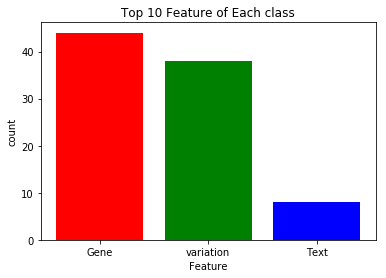

In [425]:
# How many times Each class top 10 features present,Count is belongs to which feature has present most times in top 10 features of Each class.
# FE = Feature Engineering Feature
plt.close()
plt.bar(["Gene","variation","Text"],[gene_count,var_count,text_count],color='rgb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 10 Feature of Each class")
plt.show()

## 9. Feature Engineering

### 9.1 Feature Engineering

Using Combination of Gene and Variation features as a train set in Tfidfvectorizer for reduce the log-loss

In [ ]:
# References 
# https://github.com/nishantml/PERSONALIZED-CANCER-DIAGNOSIS/blob/master/PersonalizedCancerDiagnosis_feature_engineering.ipynb

In [426]:
# Gene Feature

model_gene = TfidfVectorizer()
train_gene_tfidf = model_gene.fit_transform(x_train.Gene)
cv_gene_tfidf = model_gene.transform(x_cv.Gene)
test_gene_tfidf = model_gene.transform(x_test.Gene)

In [427]:
print("-"*30+"Gene Feature Tfidf vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_gene_tfidf.shape)
print("cv vector shape")
print("="*100)
print(cv_gene_tfidf.shape)
print("test vector shape")
print("="*100)
print(test_gene_tfidf.shape)

------------------------------Gene Feature Tfidf vector------------------------------
 
train vector shape
(2124, 230)
cv vector shape
(532, 230)
test vector shape
(665, 230)


In [428]:
# Variation Feature 

model_var = TfidfVectorizer()
train_var_tfidf = model_var.fit_transform(x_train.Variation)
cv_var_tfidf = model_var.transform(x_cv.Variation)
test_var_tfidf = model_var.transform(x_test.Variation)

In [429]:
print("-"*30+"Variation Feature Tfidf vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_var_tfidf.shape)
print("cv vector shape")
print("="*100)
print(cv_var_tfidf.shape)
print("test vector shape")
print("="*100)
print(test_var_tfidf.shape)

------------------------------Variation Feature Tfidf vector------------------------------
 
train vector shape
(2124, 1961)
cv vector shape
(532, 1961)
test vector shape
(665, 1961)


In [490]:
# Text Feature 

model_text = TfidfVectorizer(min_df=25)
train_text_tfidf = model_text.fit_transform(x_train.TEXT)
cv_text_tfidf = model_text.transform(x_cv.TEXT)
test_text_tfidf = model_text.transform(x_test.TEXT)

In [491]:
# Normalizing

train_text_tfidf = normalize(train_text_tfidf,axis=0)
cv_text_tfidf = normalize(cv_text_tfidf,axis=0)
test_text_tfidf = normalize(test_text_tfidf,axis=0)

In [492]:
print("-"*30+"Text Feature Tfidf vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_text_tfidf.shape)
print("cv vector shape")
print("="*100)
print(cv_text_tfidf.shape)
print("test vector shape")
print("="*100)
print(test_text_tfidf.shape)

------------------------------Text Feature Tfidf vector------------------------------
 
train vector shape
(2124, 9067)
cv vector shape
(532, 9067)
test vector shape
(665, 9067)


In [449]:
# Collecting all the genes and variations data into a single list

gene_variation = []

for gene in data['Gene'].values:
    gene_variation.append(gene)

for variation in data['Variation'].values:
    gene_variation.append(variation)

In [475]:
tfidfVectorizer = TfidfVectorizer(max_features=1000)
text2 = tfidfVectorizer.fit_transform(gene_variation)
gene_variation_features = tfidfVectorizer.get_feature_names()

train = tfidfVectorizer.transform(x_train['TEXT'])
test = tfidfVectorizer.transform(x_test['TEXT'])
cv = tfidfVectorizer.transform(x_cv['TEXT'])

In [476]:
print("-"*30+"Tfidf vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train.shape)
print("cv vector shape")
print("="*100)
print(cv.shape)
print("test vector shape")
print("="*100)
print(test.shape)

------------------------------Tfidf vector------------------------------
 
train vector shape
(2124, 1000)
cv vector shape
(532, 1000)
test vector shape
(665, 1000)


In [493]:
train_1 = ss.sparse.hstack([train_gene_tfidf,train_var_tfidf])
train_2 = ss.sparse.hstack([train_1,train_text_tfidf])
train_fe = ss.sparse.hstack([train_2,train])

cv_1 = ss.sparse.hstack([cv_gene_tfidf,cv_var_tfidf])
cv_2 = ss.sparse.hstack([cv_1,cv_text_tfidf])
cv_fe = ss.sparse.hstack([cv_2,cv])

test_1 = ss.sparse.hstack([test_gene_tfidf,test_var_tfidf])
test_2 = ss.sparse.hstack([test_1,test_text_tfidf])
test_fe = ss.sparse.hstack([test_2,test])

In [494]:
print("-"*30+"Feature engineering vector"+"-"*30)
print(" ")
print("train vector shape")
print("="*100)
print(train_fe.shape)
print("cv vector shape")
print("="*100)
print(cv_fe.shape)
print("test vector shape")
print("="*100)
print(test_fe.shape)

------------------------------Feature engineering vector------------------------------
 
train vector shape
(2124, 12258)
cv vector shape
(532, 12258)
test vector shape
(665, 12258)


### 9.2  Logistic Regression (with class balancing):

In [495]:
alpha = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

In [496]:
log_alpha=[]
for i in alpha:
    log_alpha.append(math.log10(i))
log_alpha

[-6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]

In [497]:
train_loss=[]
cv_loss =[]

for i in tqdm(alpha):
    
    model = SGDClassifier(alpha=i,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
    model.fit(train_fe,y_train)
    clf = CalibratedClassifierCV(model,method="sigmoid")
    clf.fit(train_fe,y_train)
    
    train_proba = clf.predict_proba(train_fe)
    train_ll = log_loss(y_train,train_proba)
    train_loss.append(train_ll)
    
    cv_proba = clf.predict_proba(cv_fe)
    cv_ll = log_loss(y_cv,cv_proba)
    cv_loss.append(cv_ll)

100%|██████████| 11/11 [00:34<00:00,  3.18s/it]


In [498]:
for i,j,k in zip(train_loss,cv_loss,alpha):
    print("alpha = {} ---> trainl loss = {} and test loss = {}".format(k,round(i,3),round(j,3)))
    
best_alpha = np.argmin(cv_loss)
print("best aplha ---> {}".format(alpha[best_alpha]))

alpha = 1e-06 ---> trainl loss = 0.661 and test loss = 1.106
alpha = 1e-05 ---> trainl loss = 0.655 and test loss = 1.153
alpha = 0.0001 ---> trainl loss = 0.501 and test loss = 1.011
alpha = 0.001 ---> trainl loss = 0.576 and test loss = 0.996
alpha = 0.01 ---> trainl loss = 0.938 and test loss = 1.114
alpha = 0.1 ---> trainl loss = 1.447 and test loss = 1.485
alpha = 1 ---> trainl loss = 1.637 and test loss = 1.674
alpha = 10 ---> trainl loss = 1.662 and test loss = 1.704
alpha = 100 ---> trainl loss = 1.664 and test loss = 1.707
alpha = 1000 ---> trainl loss = 1.664 and test loss = 1.708
alpha = 10000 ---> trainl loss = 1.665 and test loss = 1.709
best aplha ---> 0.001


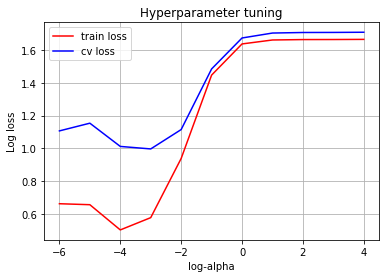

In [499]:
# Plotting 

plt.close()
plt.plot(log_alpha,train_loss,"r",label='train loss')
plt.plot(log_alpha,cv_loss,"b",label="cv loss")
plt.title("Hyperparameter tuning")
plt.xlabel("log-alpha")
plt.ylabel("Log loss")
plt.grid()
plt.legend()
plt.show()

##### Observation:

The best hyperparameter alpha = 0.001

In [500]:
# Best Hyperparameter

model = SGDClassifier(alpha=0.001,loss="log",penalty="l2",n_jobs=-1,random_state=42,class_weight="balanced")
model.fit(train_fe,y_train)
clf = CalibratedClassifierCV(model,method="sigmoid")
clf.fit(train_fe,y_train)
    
train_proba = clf.predict_proba(train_fe)
train_ll = log_loss(y_train,train_proba)
    
cv_proba = clf.predict_proba(cv_fe)
cv_ll = log_loss(y_cv,cv_proba)

test_proba = clf.predict_proba(test_fe)
test_ll = log_loss(y_test,test_proba)

In [501]:
print("-"*30+"train loss"+"-"*30)
print(train_ll)
print("-"*30+"cv loss"+"-"*30)
print(cv_ll)
print("-"*30+"test loss"+"-"*30)
print(test_ll)

------------------------------train loss------------------------------
0.5758324370453072
------------------------------cv loss------------------------------
0.9957561991655522
------------------------------test loss------------------------------
0.9831433598484318


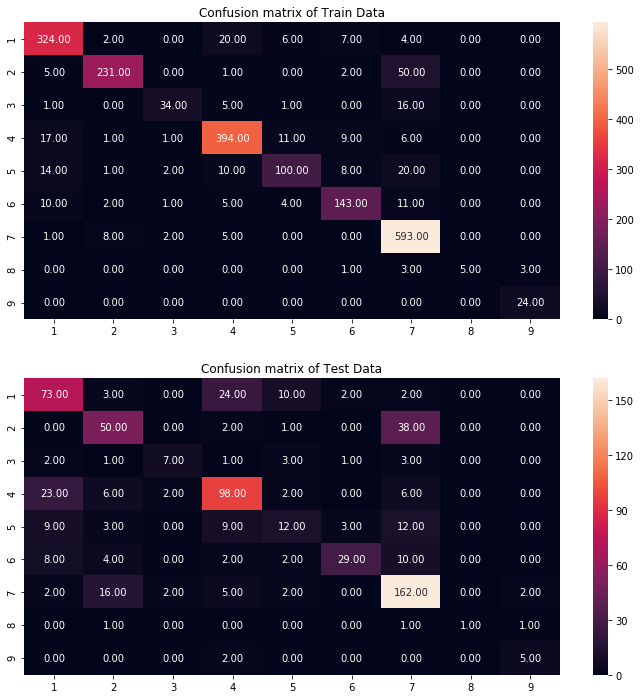

In [502]:
# Confusion Matrix

train_cm,test_cm = cm_matrix(train_true=y_train,train_pred=train_proba,test_true=y_test,test_pred=test_proba)

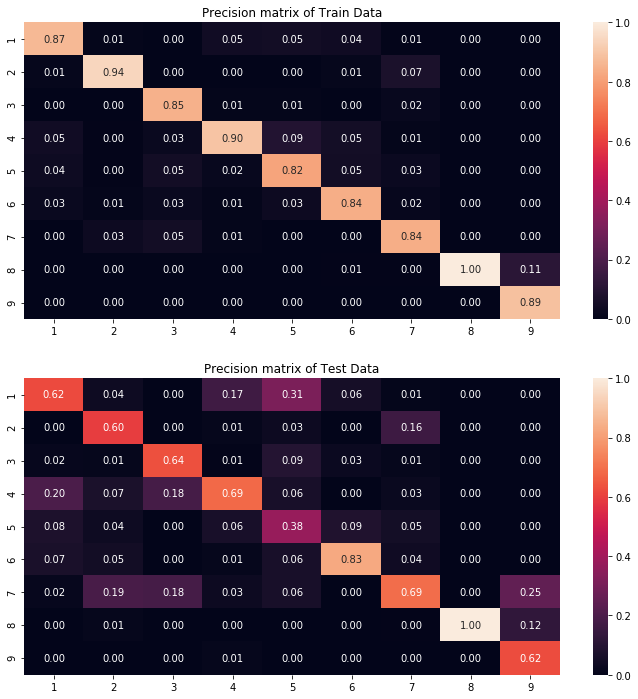

In [503]:
# Precision Matrix
precision_matrix(train=train_cm,test=test_cm)

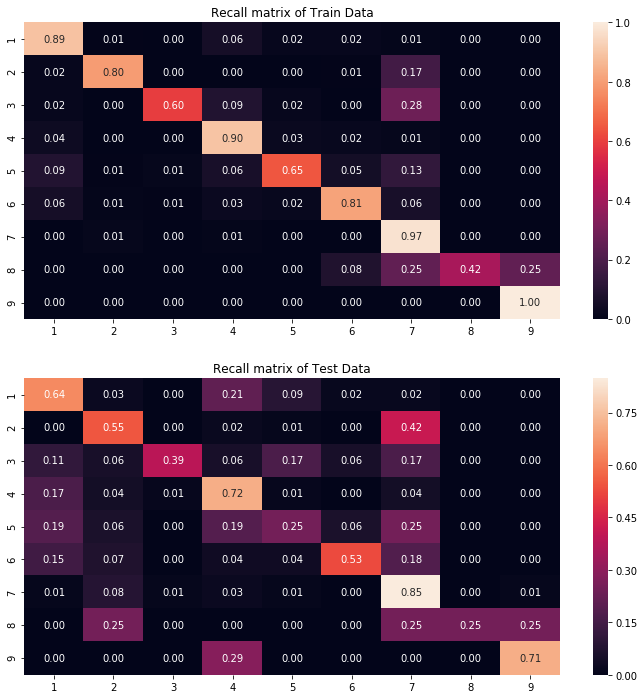

In [504]:
# Precision Matrix
recall_matrix(train=train_cm,test=test_cm)

####  Feature Importance

In [505]:
classes = model.classes_

In [506]:
classes

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [507]:
fi = model.coef_

In [508]:
fi.shape

(9, 12258)

In [509]:
# Number of Misclassified points

corr_count=0
mis_count=0

for i in tqdm(range(len(y_test))):
    
    if y_test[i] == np.argmax(test_proba[i]) + 1:
        
        corr_count +=1
    else:
    
        mis_count +=1

100%|██████████| 665/665 [00:00<00:00, 97877.40it/s]


In [510]:
print("The Percentage of misclassified points")
print("="*100)
print(mis_count/(corr_count+mis_count))

The Percentage of misclassified points
0.34285714285714286


In [511]:
# Each class important features

gene_count=0
var_count = 0
text_count = 0
fe_count = 0

for i in range(9):
    
    label =np.argsort(fi[i])[::-1][:10]
    
    print("-"*30+"Class {} important features".format(i+1)+"-"*30)
    
    for j in range(10):
        
        if label[j] < 230:
            
            print("Gene feature = {}".format(model_gene.get_feature_names()[label[j]]))
            
            gene_count +=1
            
        elif label[j] >= 230 and label[j] < 1961+230:
            
            print("Variation feature = {}".format(model_var.get_feature_names()[label[j] - 230]))
            
            var_count +=1
            
        elif label[j] >= 1961+230 and label[j] < 1961+9067:
            
            print("Text feature = {}".format(model_text.get_feature_names()[label[j] - (1961+230)]))
            
            text_count +=1
            
        else :
            
            print("Feature Engineering feature = {}".format(tfidfVectorizer.get_feature_names()[label[j] - (230+1961+9067)]))
            
            fe_count +=1
            

------------------------------Class 1 important features------------------------------
Variation feature = truncating
Variation feature = mutations
Variation feature = deletion
Gene feature = ptprt
Gene feature = tp53
Gene feature = ercc2
Gene feature = ppp2r1a
Feature Engineering feature = ercc2
Gene feature = brca1
Gene feature = cdh1
------------------------------Class 2 important features------------------------------
Variation feature = fusions
Gene feature = hras
Gene feature = abl1
Gene feature = pik3cb
Variation feature = amplification
Gene feature = ros1
Gene feature = epas1
Feature Engineering feature = fusion
Gene feature = ret
Gene feature = kit
------------------------------Class 3 important features------------------------------
Variation feature = v369g
Variation feature = a121v
Variation feature = r462i
Variation feature = i18v
Variation feature = g334r
Variation feature = g1706a
Variation feature = a19v
Variation feature = q59e
Variation feature = i834v
Variation featu

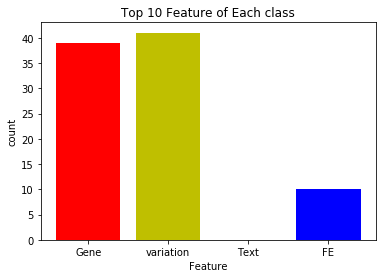

In [512]:
# How many times Each class top 10 features present,Count is belongs to which feature has present most times in top 10 features of Each class.
# FE = Feature Engineering Feature
plt.close()
plt.bar(["Gene","variation","Text","FE"],[gene_count,var_count,text_count,fe_count],color='rygb')
plt.xlabel("Feature")
plt.ylabel("count")
plt.title("Top 10 Feature of Each class")
plt.show()

## 10. Conclusion:

This table represents a models performaces

Abbreviations are used here,

* WB -----> Class-Weight Without Balancing and
* B  -----> Class-Weight Balancing
* OHE/BoW -----> One Hot Encoding
* RC  ------> Response Coding

In [576]:
x = PrettyTable()
y = PrettyTable()

x.field_names = ["Model","Featurizer","N-Grams","Train-loss","cv-loss","Test-loss","% Mis-classified points"]
y.field_names = ["Model","Featurizer","N-Grams","Train-loss","cv-loss","Test-loss","% Mis-classified points"]

# BoW/OHE vector 

x.add_row(["Naive Bayes","OHE","uni-gram",0.9185,1.2788,1.2650,0.3699])
x.add_row(["Logistic Regression(WB)","OHE","uni-gram",0.5867,1.0872,1.0713,0.3548])
x.add_row(["Logistic Regression(B)","OHE","uni-gram",0.5916,1.0490,1.0433,0.3609])
x.add_row(["Linear SVM (WB)","OHE","uni-gram",0.7256,1.1270,1.1188,0.3578])
x.add_row(["Linear SVM (B)","OHE","uni-gram",0.7773,1.1363,1.1279,0.3639])
x.add_row(["Random Forest","OHE","uni-gram",0.6929,1.1696,1.1904,0.3789])
x.add_row(["Stacking Classifier","OHE","uni-gram",0.4185,1.2043,1.2110,0.3578])

# Tfidf vector

x.add_row(["Naive Bayes","TFIDF","uni-gram",0.9264,1.2015,1.2154,0.3864])
x.add_row(["Logistic Regression(WB)","TFIDF","uni-gram",0.5567,1.0572,1.0429,0.3639])
x.add_row(["Logistic Regression(B)","TFIDF","uni-gram",0.5669,1.0270,1.0101,0.3548])
x.add_row(["Linear SVM (WB)","TFIDF","uni-gram",0.6925,1.1156,1.0949,0.3458])
x.add_row(["Linear SVM (B)","TFIDF","uni-gram",0.7457,1.1096,1.0908,0.3609])
x.add_row(["Random Forest","TFIDF","uni-gram",0.6531,1.1604,1.1690,0.3834])
x.add_row(["Stacking Classifier","TFIDF","uni-gram",0.4022,1.1864,1.2100,0.3548])

# Response Coding

x.add_row(["K-NN","RC","uni-gram",0.5314,1.0735,1.0653,0.3578])
x.add_row(["Random Forest","RC","uni-gram",0.0436,1.2978,1.2767,0.4768])

# Bi-Grams

x.add_row(["Logistic Regression(B)","OHE","bi-gram",0.7268,1.1242,1.0882,0.3639])
x.add_row(["Logistic Regression(B)","TFIDF","bi-gram",0.6678,1.1016,1.0649,0.3578])


y.add_row(["Logistic Regression(B)","TFIDF","uni-gram",0.5758,0.9957,0.9831,3428])

print(" ")
print("-"*40+"Before Feature Engineering"+"-"*40)
print(" ")
print(x)
print(" ")

print("-"*40+"After Feature Engineering"+"-"*40)
print(" ")
print(y)

 
----------------------------------------Before Feature Engineering----------------------------------------
 
+-------------------------+------------+----------+------------+---------+-----------+-------------------------+
|          Model          | Featurizer | N-Grams  | Train-loss | cv-loss | Test-loss | % Mis-classified points |
+-------------------------+------------+----------+------------+---------+-----------+-------------------------+
|       Naive Bayes       |    OHE     | uni-gram |   0.9185   |  1.2788 |   1.265   |          0.3699         |
| Logistic Regression(WB) |    OHE     | uni-gram |   0.5867   |  1.0872 |   1.0713  |          0.3548         |
|  Logistic Regression(B) |    OHE     | uni-gram |   0.5916   |  1.049  |   1.0433  |          0.3609         |
|     Linear SVM (WB)     |    OHE     | uni-gram |   0.7256   |  1.127  |   1.1188  |          0.3578         |
|      Linear SVM (B)     |    OHE     | uni-gram |   0.7773   |  1.1363 |   1.1279  |          0.

### Step by step procedures are followed:

<b>Step 1:</b> Understanding the Business Problem

<b>Step 2:</b> Machine Learning problem formulation

<b>Step 3:</b> Data Processing

       * Reading data from csv file
       * Duplicate rows are removed and NaN values are filled 
       * The data contains ID,Gene,Variation,Text as a feature.It contains 9 class labels (Multiclass)
       * Text Preprocessing was done
       * To avoid data leakage,Data was splitted into three categories like train,cv,test
       * Worst Log-loss was predicted by using Random Model.

<b>Step 4:</b> Exploratory Data Analysis
        
       * Class Distribution Analysis
       * The Gene,variation,Text features are categorical features so the univariate analysis are done by using Logistic Regression model.
       * Categorical fearures are converted as a vector by using Featurization like One Hot Encoding,Tfidf, Response coding.

<b>Step 5:</b> Applying Featurization on Machine Learning Models

       * The performance of the classical machine learning models were increased by using various featurization techniques. Above the table represents the model performances.
      

<b>Step 6:</b> Feature Engineering
    
      * Collect all Genes and variations in a single list and train TfidfVectorizer on this list.
      * These Gene and Variation features are fitted on Tfidf vectorizer and the Train,CV,Test of the TEXT data was transformed by using these features.
      * The Gene and Variation features both have a connection to the Text.So these two features used in the feature engineering section.
      * The performance of the model was increased by using Feature engineering. that means the log-loss has been reduced below the value of 1 (<1).
      * In the future, we will reduce the log-loss as much as possible through the different feature engineering techniques.